ir buscar um pixel onde sei que ha fogo e fazer o plot com todos os poluentes (timeseries)

boxplots iguais ao plot das barras

co in microgramas/m3

Crossover of FRP sum (MW) and Pollutants levels in a time series template over the years or single year

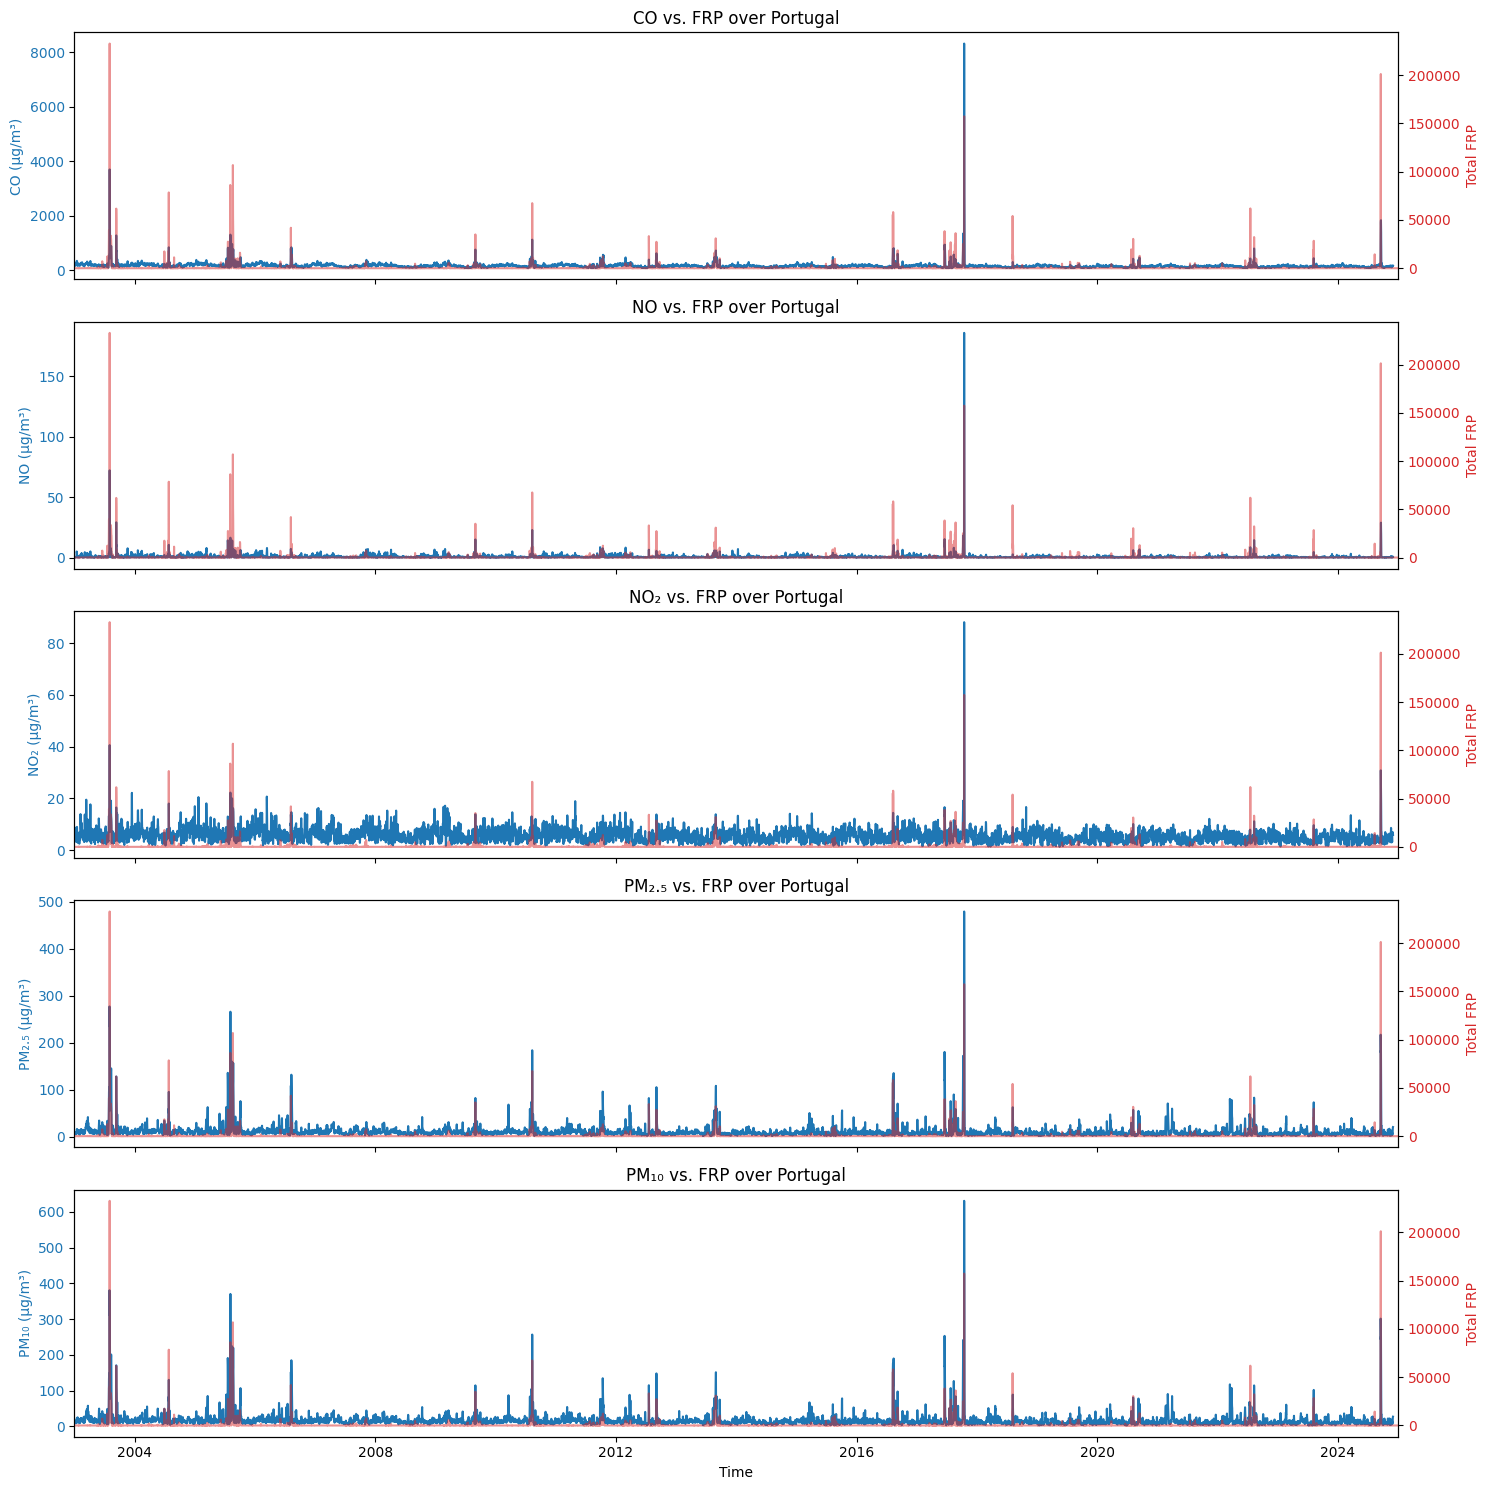

In [1]:
# All Years - Portugal

import xarray as xr
import matplotlib.pyplot as plt

# File paths for each pollutant
files = {
    'CO':     r"D:\IPMA\CAMS\co_fire_Portugal.nc",
    'NO':     r"D:\IPMA\CAMS\no_fire_Portugal.nc",
    'NO₂':    r"D:\IPMA\CAMS\no2_fire_Portugal.nc",
    'PM₂.₅':  r"D:\IPMA\CAMS\pm2p5_fire_Portugal.nc",
    'PM₁₀':   r"D:\IPMA\CAMS\pm10_fire_Portugal.nc"
}

# Correct units for plotting (CO now in µg/m³)
units = {
    'CO': 'µg/m³',
    'NO': 'µg/m³',
    'NO₂': 'µg/m³',
    'PM₂.₅': 'µg/m³',
    'PM₁₀': 'µg/m³'
}

# Set up figure
fig, axs = plt.subplots(len(files), 1, figsize=(15, 3 * len(files)), sharex=True)

for ax, (pollutant_name, file_path) in zip(axs, files.items()):
    # Load dataset
    ds = xr.open_dataset(file_path)

    # Extract time range
    time = ds.time
    tmin = time.min().values
    tmax = time.max().values

    # Spatial average of pollutant concentration
    pollutant = ds['Mean'].mean(dim=['latitude', 'longitude'])

    # Convert CO mg/m³ → µg/m³
    if pollutant_name == 'CO':
        pollutant = pollutant * 1000

    # Daily total FRP over Portugal
    frp = ds['frp_sum_Portugal'].sum(dim=['latitude', 'longitude'])

    # Plot pollutant mean
    ax.plot(time, pollutant, label=f'{pollutant_name} Mean ({units[pollutant_name]})', color='tab:blue')
    ax.set_ylabel(f'{pollutant_name} ({units[pollutant_name]})', color='tab:blue')
    ax.tick_params(axis='y', labelcolor='tab:blue')
    ax.grid(False)

    # Plot FRP on twin y-axis
    ax2 = ax.twinx()
    ax2.plot(time, frp, label='FRP (MW)', color='tab:red', alpha=0.5)
    ax2.set_ylabel('Total FRP', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    # Set x-axis limits
    ax.set_xlim([tmin, tmax])

    # Title
    ax.set_title(f'{pollutant_name} vs. FRP over Portugal')

# Global X label
axs[-1].set_xlabel('Time')
plt.tight_layout()
plt.show()


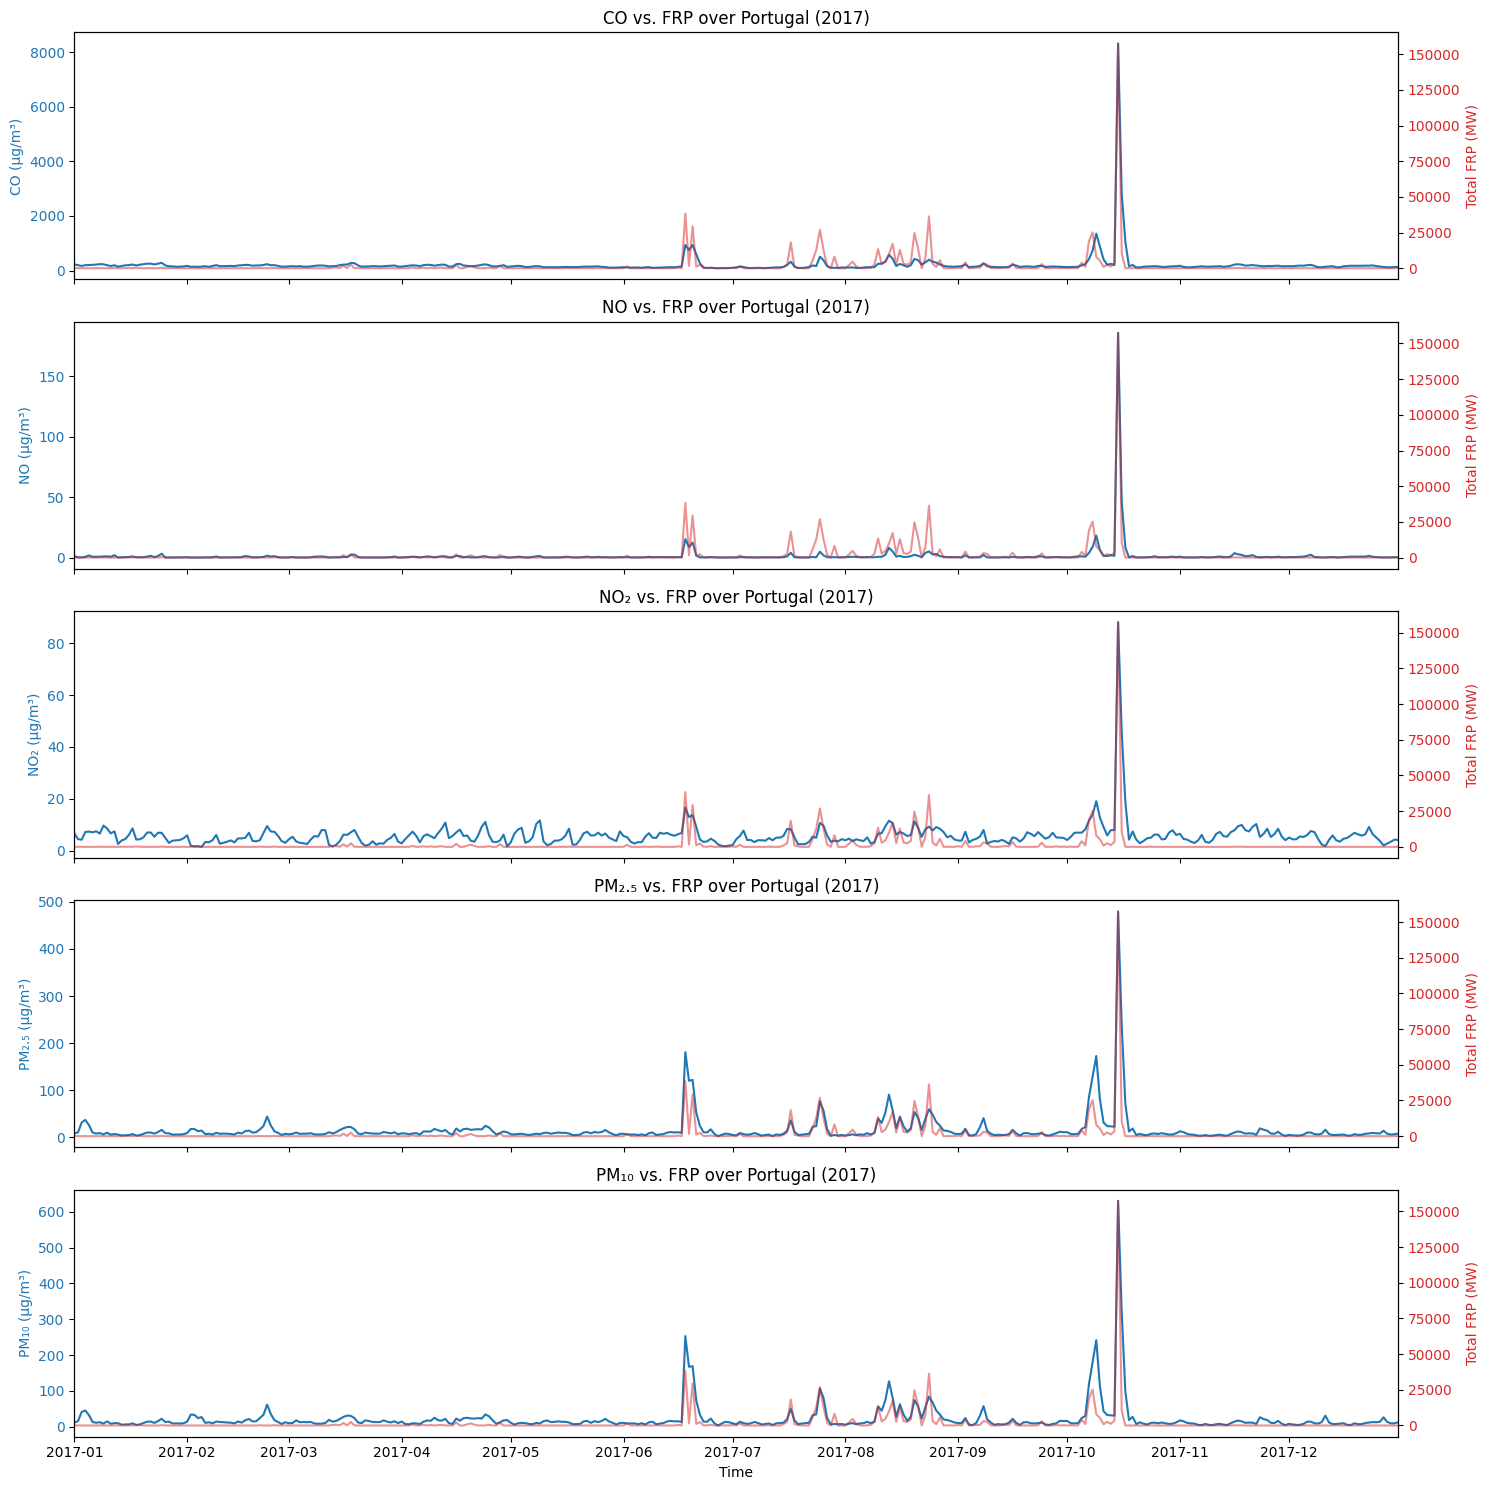

In [2]:
# Certain Year - Portugal

import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd

# Set this to a specific year (e.g., 2017), or to None to plot all years
selected_year = 2017

# File paths for each pollutant
files = {
    'CO':     r"D:\IPMA\CAMS\co_fire_Portugal.nc",
    'NO':     r"D:\IPMA\CAMS\no_fire_Portugal.nc",
    'NO₂':    r"D:\IPMA\CAMS\no2_fire_Portugal.nc",
    'PM₂.₅':  r"D:\IPMA\CAMS\pm2p5_fire_Portugal.nc",
    'PM₁₀':   r"D:\IPMA\CAMS\pm10_fire_Portugal.nc"
}

# Units for each pollutant (CO now in µg/m³)
pollutant_units = {
    'CO': 'µg/m³',
    'NO': 'µg/m³',
    'NO₂': 'µg/m³',
    'PM₂.₅': 'µg/m³',
    'PM₁₀': 'µg/m³'
}

# Set up figure
fig, axs = plt.subplots(len(files), 1, figsize=(15, 3 * len(files)), sharex=True)

for ax, (pollutant_name, file_path) in zip(axs, files.items()):
    # Load dataset
    ds = xr.open_dataset(file_path)

    # Subset by year if specified
    if selected_year is not None:
        # Ensure time is datetime64
        ds['time'] = pd.to_datetime(ds['time'].values)
        ds = ds.sel(time=ds['time'].dt.year == selected_year)

    # Extract time and limits
    time = ds.time
    if len(time) == 0:
        ax.set_title(f'{pollutant_name} vs. FRP – No data for year {selected_year}')
        continue

    tmin = time.min().values
    tmax = time.max().values

    # Spatial average of pollutant concentration
    pollutant = ds['Mean'].mean(dim=['latitude', 'longitude'])

    # Convert CO mg/m³ → µg/m³
    if pollutant_name == 'CO':
        pollutant = pollutant * 1000

    # Daily total FRP over Portugal
    frp = ds['frp_sum_Portugal'].sum(dim=['latitude', 'longitude'])

    # Get units
    unit = pollutant_units[pollutant_name]

    # Plot pollutant mean
    ax.plot(time, pollutant, label=f'{pollutant_name} Mean ({unit})', color='tab:blue')
    ax.set_ylabel(f'{pollutant_name} ({unit})', color='tab:blue')
    ax.tick_params(axis='y', labelcolor='tab:blue')
    ax.grid(False)

    # Plot FRP on twin y-axis
    ax2 = ax.twinx()
    ax2.plot(time, frp, label='FRP (MW)', color='tab:red', alpha=0.5)
    ax2.set_ylabel('Total FRP (MW)', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    # Set x-axis limits to match time range
    ax.set_xlim([tmin, tmax])

    # Title
    title = f'{pollutant_name} vs. FRP over Portugal'
    if selected_year is not None:
        title += f' ({selected_year})'
    ax.set_title(title)

# Global X label
axs[-1].set_xlabel('Time')
plt.tight_layout()
plt.show()


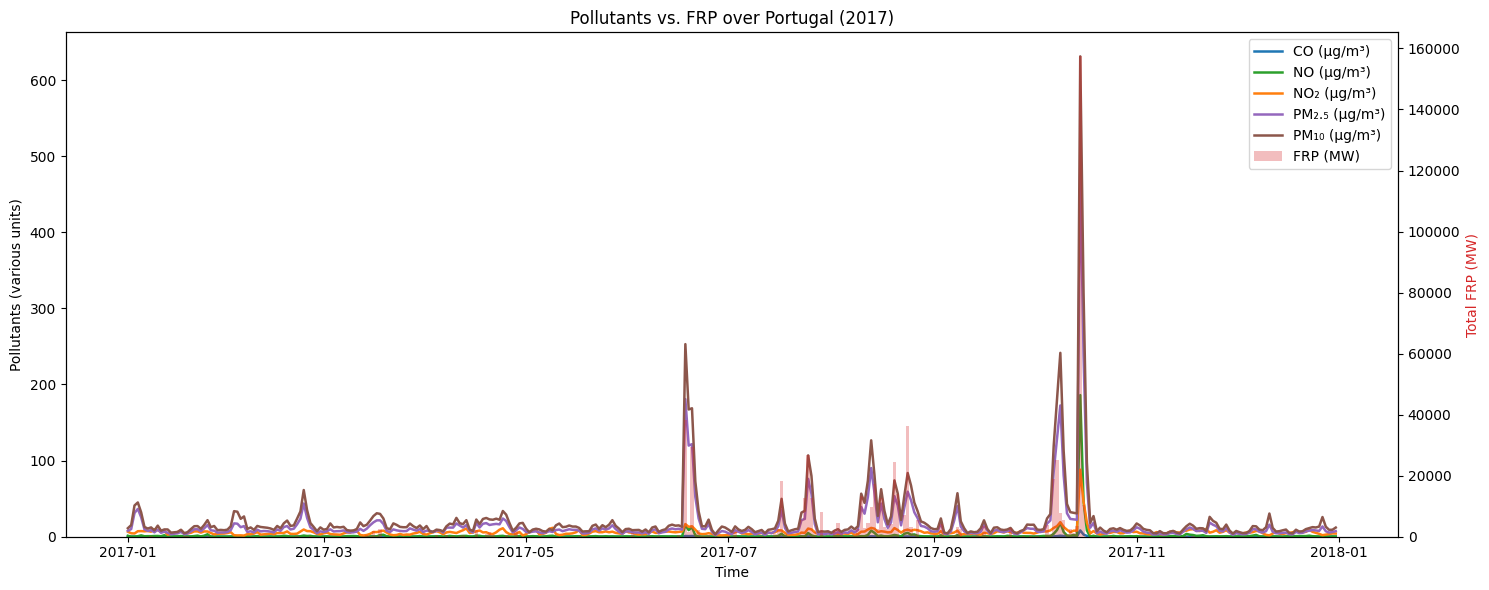

In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd

# --- Settings ---
selected_year = 2017

# File paths for each pollutant
files = {
    'CO':     r"D:\IPMA\CAMS\co_fire_Portugal.nc",
    'NO':     r"D:\IPMA\CAMS\no_fire_Portugal.nc",
    'NO₂':    r"D:\IPMA\CAMS\no2_fire_Portugal.nc",
    'PM₂.₅':  r"D:\IPMA\CAMS\pm2p5_fire_Portugal.nc",
    'PM₁₀':   r"D:\IPMA\CAMS\pm10_fire_Portugal.nc"
}

# Units for each pollutant
pollutant_units = {
    'CO': 'µg/m³',
    'NO': 'µg/m³',
    'NO₂': 'µg/m³',
    'PM₂.₅': 'µg/m³',
    'PM₁₀': 'µg/m³'
}

# Colors for pollutants
colors = {
    'CO': 'tab:blue',
    'NO': 'tab:green',
    'NO₂': 'tab:orange',
    'PM₂.₅': 'tab:purple',
    'PM₁₀': 'tab:brown'
}

# --- Create one figure ---
fig, ax = plt.subplots(figsize=(15, 6))
ax2 = ax.twinx()  # secondary axis for FRP

frp_plotted = False  # so we only plot FRP once

# --- Loop over pollutants ---
for pollutant_name, file_path in files.items():
    ds = xr.open_dataset(file_path)

    # Subset by year if specified
    if selected_year is not None:
        ds['time'] = pd.to_datetime(ds['time'].values)
        ds = ds.sel(time=ds['time'].dt.year == selected_year)

    if len(ds.time) == 0:
        continue

    # Spatial average
    pollutant = ds['Mean'].mean(dim=['latitude', 'longitude'])

    # Plot pollutant line
    unit = pollutant_units[pollutant_name]
    ax.plot(ds.time, pollutant, label=f'{pollutant_name} ({unit})',
            color=colors[pollutant_name], linewidth=1.8)

    # Plot FRP only once (as bars)
    if not frp_plotted and 'frp_sum_Portugal' in ds:
        frp = ds['frp_sum_Portugal'].sum(dim=['latitude', 'longitude'])
        ax2.bar(ds.time, frp, width=1.0, color='tab:red', alpha=0.3, label='FRP (MW)')
        frp_plotted = True

# --- Axis formatting ---
ax.set_ylabel("Pollutants (various units)", color='black')
ax2.set_ylabel("Total FRP (MW)", color='tab:red')

# Force both y-axes to start at zero
ax.set_ylim(bottom=0)
ax2.set_ylim(bottom=0)

# Title
title = "Pollutants vs. FRP over Portugal"
if selected_year is not None:
    title += f" ({selected_year})"
ax.set_title(title)

# Legend (combine both axes)
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='upper right')

ax.set_xlabel("Time")
plt.tight_layout()
plt.show()


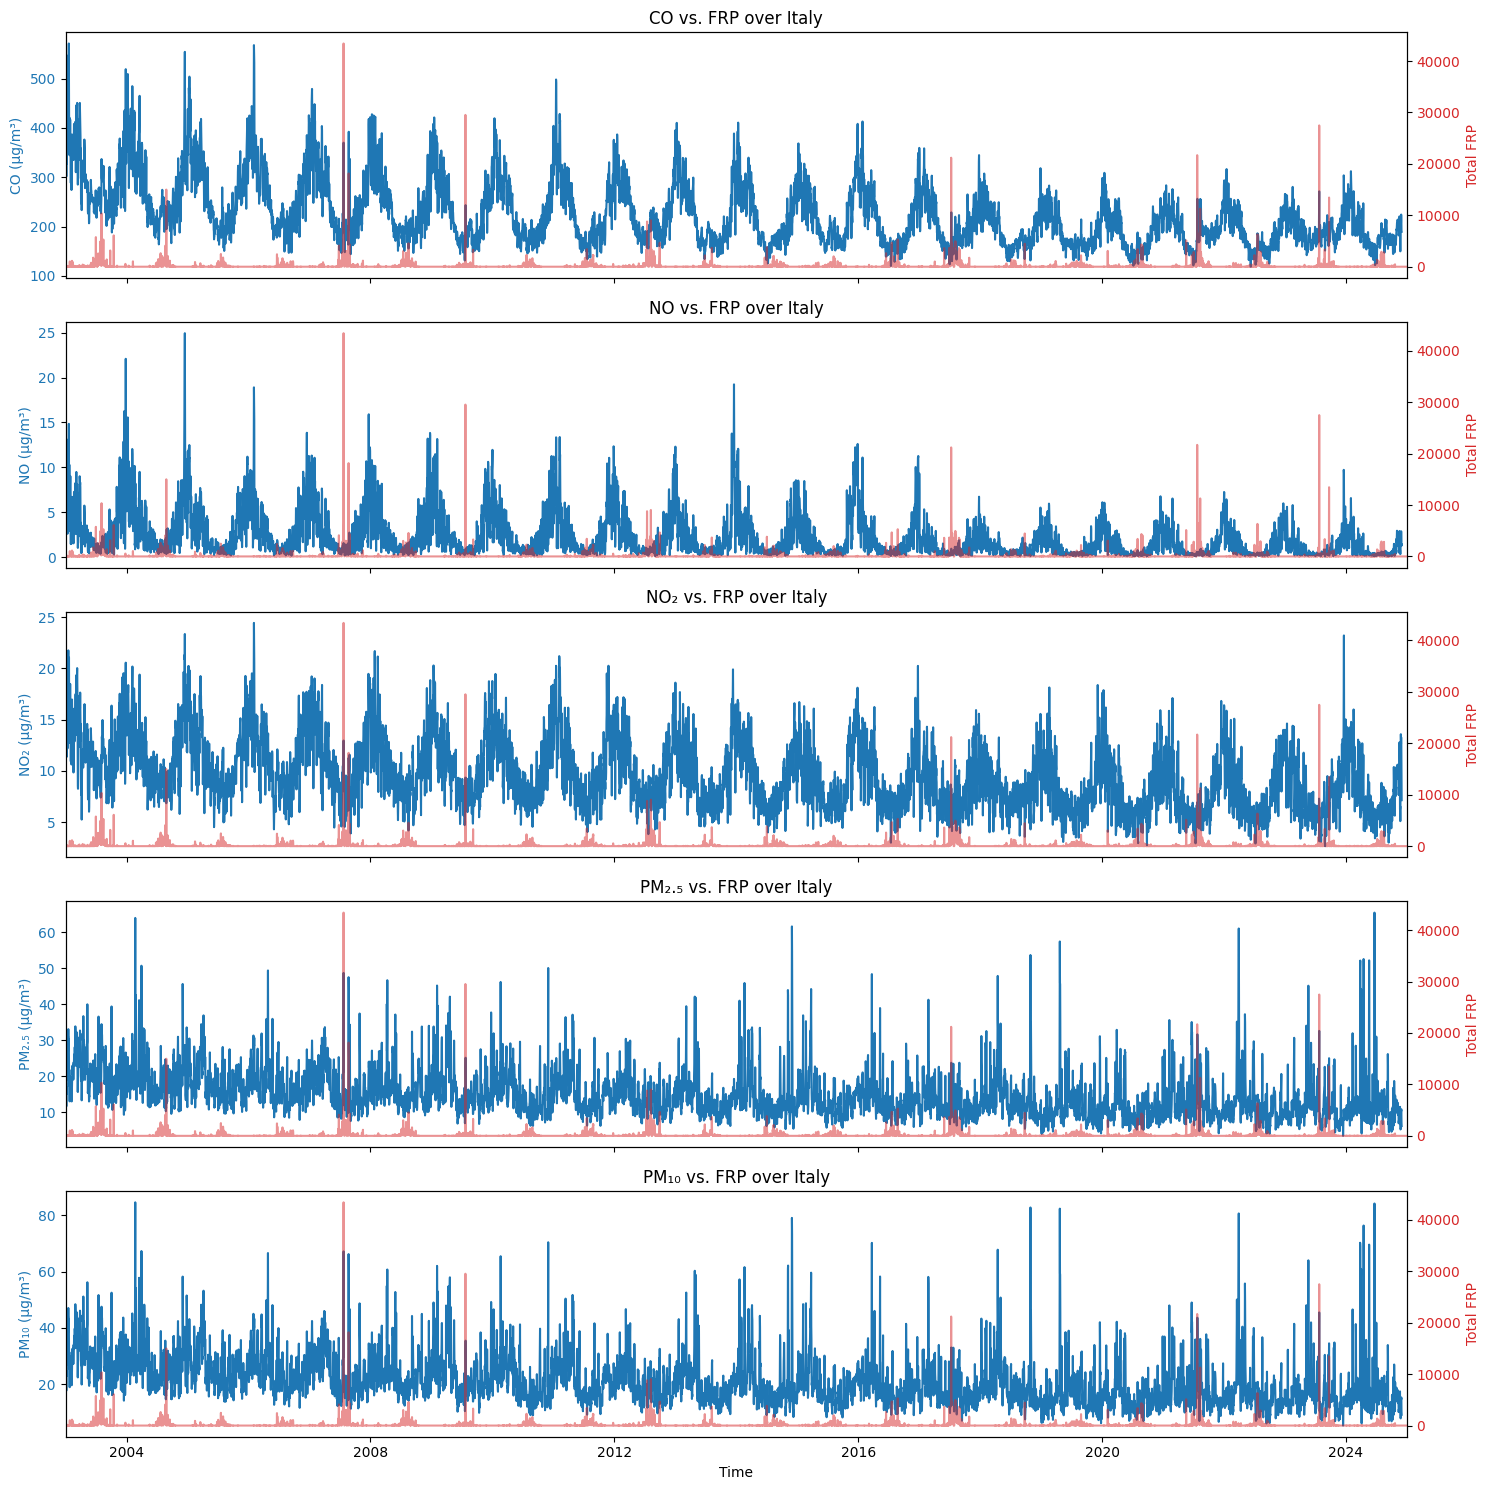

In [4]:
# All Years - Italy

import xarray as xr
import matplotlib.pyplot as plt

# File paths for each pollutant
files = {
    'CO':     r"D:\IPMA\CAMS\co_fire_Italy.nc",
    'NO':     r"D:\IPMA\CAMS\no_fire_Italy.nc",
    'NO₂':    r"D:\IPMA\CAMS\no2_fire_Italy.nc",
    'PM₂.₅':  r"D:\IPMA\CAMS\pm2p5_fire_Italy.nc",
    'PM₁₀':   r"D:\IPMA\CAMS\pm10_fire_Italy.nc"
}

# Correct units for plotting
units = {
    'CO': 'µg/m³',
    'NO': 'µg/m³',
    'NO₂': 'µg/m³',
    'PM₂.₅': 'µg/m³',
    'PM₁₀': 'µg/m³'
}

# Set up figure
fig, axs = plt.subplots(len(files), 1, figsize=(15, 3 * len(files)), sharex=True)

for ax, (pollutant_name, file_path) in zip(axs, files.items()):
    # Load dataset
    ds = xr.open_dataset(file_path)

    # Extract time range
    time = ds.time
    tmin = time.min().values
    tmax = time.max().values

    # Spatial average of pollutant concentration
    pollutant = ds['Mean'].mean(dim=['latitude', 'longitude'])

    # Convert CO mg/m³ → µg/m³
    if pollutant_name == 'CO':
        pollutant = pollutant * 1000

    # Daily total FRP over Italy
    frp = ds['frp_sum_Italy'].sum(dim=['latitude', 'longitude'])

    # Plot pollutant mean
    ax.plot(time, pollutant, label=f'{pollutant_name} Mean ({units[pollutant_name]})', color='tab:blue')
    ax.set_ylabel(f'{pollutant_name} ({units[pollutant_name]})', color='tab:blue')
    ax.tick_params(axis='y', labelcolor='tab:blue')
    ax.grid(False)

    # Plot FRP on twin y-axis
    ax2 = ax.twinx()
    ax2.plot(time, frp, label='FRP (MW)', color='tab:red', alpha=0.5)
    ax2.set_ylabel('Total FRP', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    # Set x-axis limits
    ax.set_xlim([tmin, tmax])

    # Title
    ax.set_title(f'{pollutant_name} vs. FRP over Italy')

# Global X label
axs[-1].set_xlabel('Time')
plt.tight_layout()
plt.show()


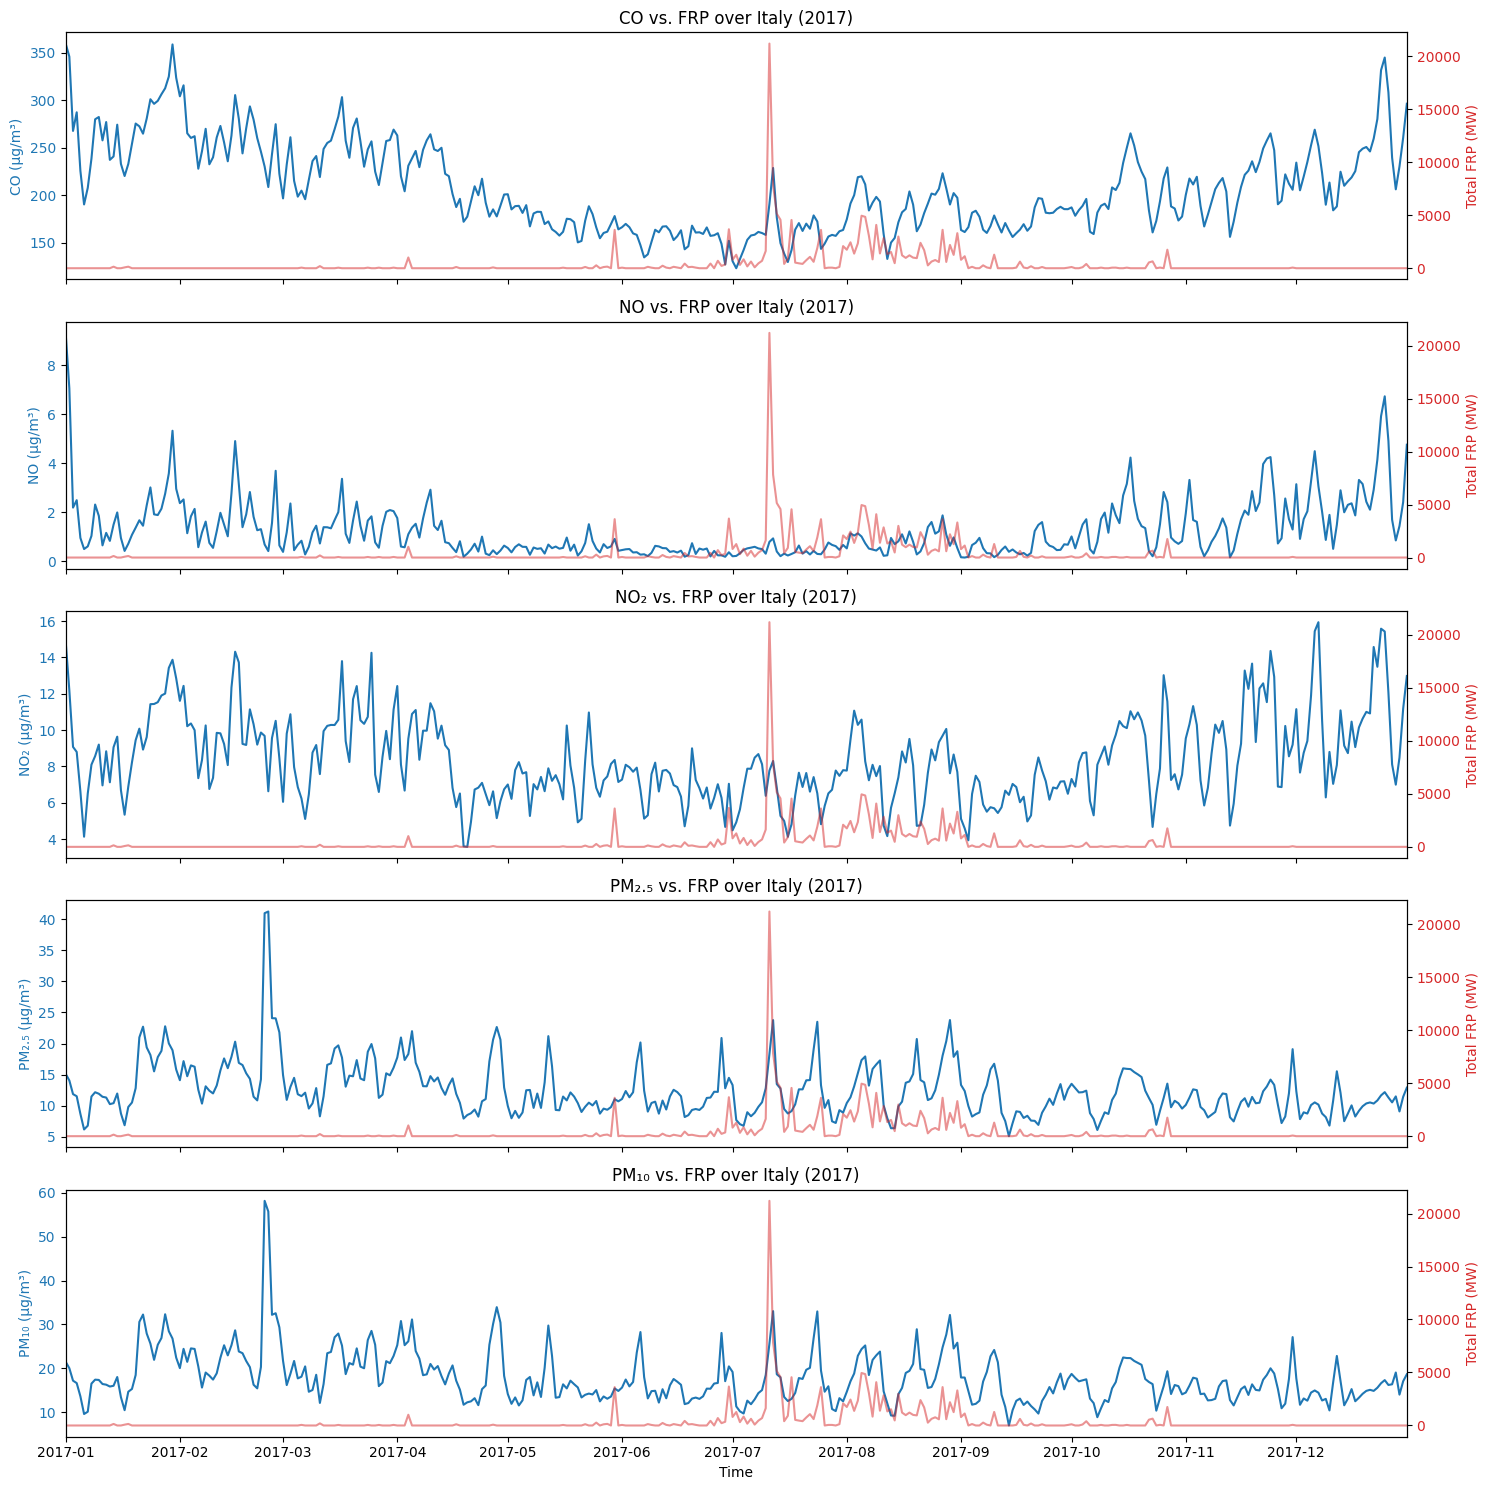

In [5]:
# Certain Year - Italy

import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd

# Set this to a specific year (e.g., 2017), or to None to plot all years
selected_year = 2017

# File paths for each pollutant
files = {
    'CO':     r"D:\IPMA\CAMS\co_fire_Italy.nc",
    'NO':     r"D:\IPMA\CAMS\no_fire_Italy.nc",
    'NO₂':    r"D:\IPMA\CAMS\no2_fire_Italy.nc",
    'PM₂.₅':  r"D:\IPMA\CAMS\pm2p5_fire_Italy.nc",
    'PM₁₀':   r"D:\IPMA\CAMS\pm10_fire_Italy.nc"
}

# Units for each pollutant
pollutant_units = {
    'CO': 'µg/m³',
    'NO': 'µg/m³',
    'NO₂': 'µg/m³',
    'PM₂.₅': 'µg/m³',
    'PM₁₀': 'µg/m³'
}

# Set up figure
fig, axs = plt.subplots(len(files), 1, figsize=(15, 3 * len(files)), sharex=True)

for ax, (pollutant_name, file_path) in zip(axs, files.items()):
    # Load dataset
    ds = xr.open_dataset(file_path)

    # Subset by year if specified
    if selected_year is not None:
        # Ensure time is datetime64
        ds['time'] = pd.to_datetime(ds['time'].values)
        ds = ds.sel(time=ds['time'].dt.year == selected_year)

    # Extract time and limits
    time = ds.time
    if len(time) == 0:
        ax.set_title(f'{pollutant_name} vs. FRP – No data for year {selected_year}')
        continue

    tmin = time.min().values
    tmax = time.max().values

    # Spatial average of pollutant concentration
    pollutant = ds['Mean'].mean(dim=['latitude', 'longitude'])

    # Convert CO mg/m³ → µg/m³
    if pollutant_name == 'CO':
        pollutant = pollutant * 1000

    # Daily total FRP over Italy
    frp = ds['frp_sum_Italy'].sum(dim=['latitude', 'longitude'])

    # Get units
    unit = pollutant_units[pollutant_name]

    # Plot pollutant mean
    ax.plot(time, pollutant, label=f'{pollutant_name} Mean ({unit})', color='tab:blue')
    ax.set_ylabel(f'{pollutant_name} ({unit})', color='tab:blue')
    ax.tick_params(axis='y', labelcolor='tab:blue')
    ax.grid(False)

    # Plot FRP on twin y-axis
    ax2 = ax.twinx()
    ax2.plot(time, frp, label='FRP (MW)', color='tab:red', alpha=0.5)
    ax2.set_ylabel('Total FRP (MW)', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    # Set x-axis limits to match time range
    ax.set_xlim([tmin, tmax])

    # Title
    title = f'{pollutant_name} vs. FRP over Italy'
    if selected_year is not None:
        title += f' ({selected_year})'
    ax.set_title(title)

# Global X label
axs[-1].set_xlabel('Time')
plt.tight_layout()
plt.show()


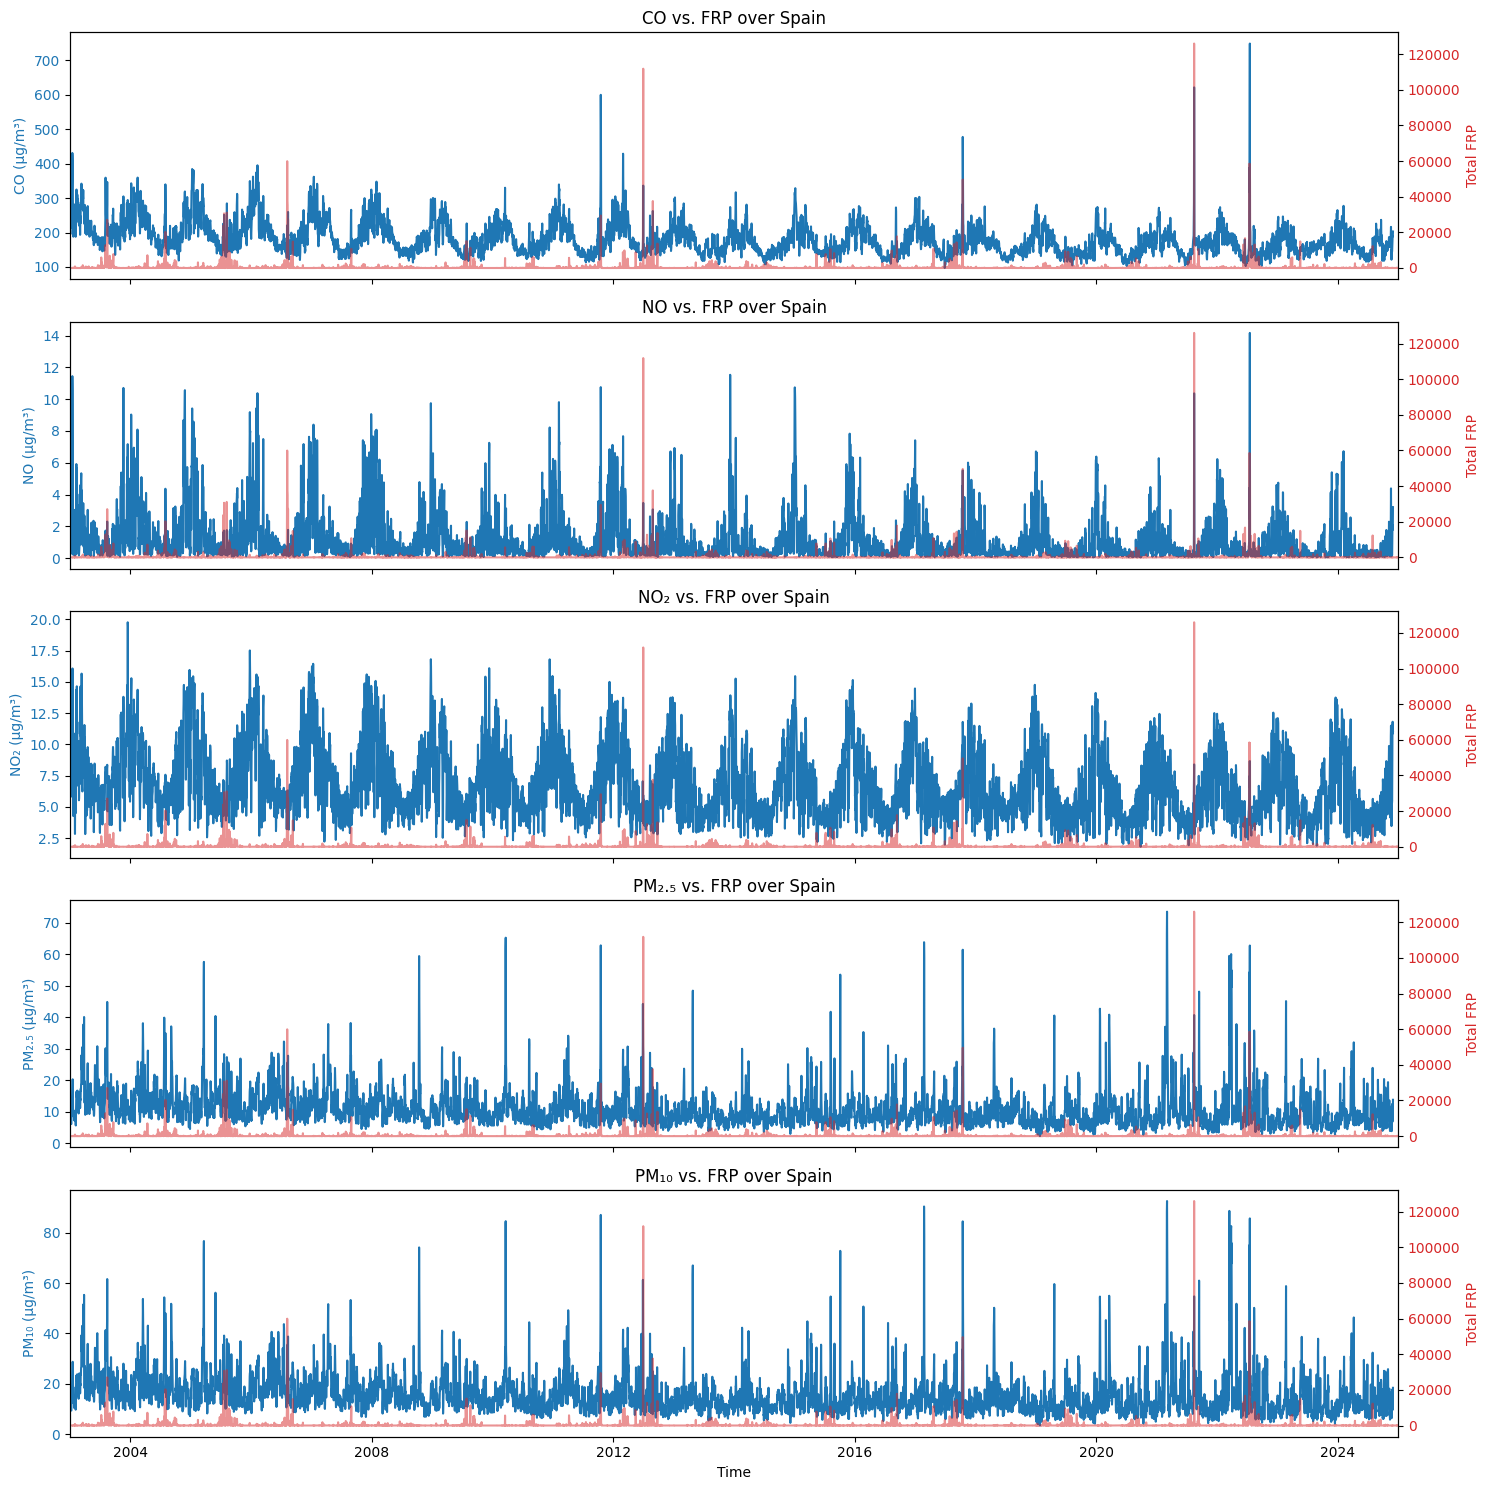

In [6]:
# All Years - Spain

import xarray as xr
import matplotlib.pyplot as plt

# File paths for each pollutant
files = {
    'CO':     r"D:\IPMA\CAMS\co_fire_Spain.nc",
    'NO':     r"D:\IPMA\CAMS\no_fire_Spain.nc",
    'NO₂':    r"D:\IPMA\CAMS\no2_fire_Spain.nc",
    'PM₂.₅':  r"D:\IPMA\CAMS\pm2p5_fire_Spain.nc",
    'PM₁₀':   r"D:\IPMA\CAMS\pm10_fire_Spain.nc"
}

# Correct units for plotting
units = {
    'CO': 'µg/m³',
    'NO': 'µg/m³',
    'NO₂': 'µg/m³',
    'PM₂.₅': 'µg/m³',
    'PM₁₀': 'µg/m³'
}

# Set up figure
fig, axs = plt.subplots(len(files), 1, figsize=(15, 3 * len(files)), sharex=True)

for ax, (pollutant_name, file_path) in zip(axs, files.items()):
    # Load dataset
    ds = xr.open_dataset(file_path)

    # Extract time range
    time = ds.time
    tmin = time.min().values
    tmax = time.max().values

    # Spatial average of pollutant concentration
    pollutant = ds['Mean'].mean(dim=['latitude', 'longitude'])

    # Convert CO mg/m³ → µg/m³
    if pollutant_name == 'CO':
        pollutant = pollutant * 1000

    # Daily total FRP over Spain
    frp = ds['frp_sum_Spain'].sum(dim=['latitude', 'longitude'])

    # Plot pollutant mean
    ax.plot(time, pollutant, label=f'{pollutant_name} Mean ({units[pollutant_name]})', color='tab:blue')
    ax.set_ylabel(f'{pollutant_name} ({units[pollutant_name]})', color='tab:blue')
    ax.tick_params(axis='y', labelcolor='tab:blue')
    ax.grid(False)

    # Plot FRP on twin y-axis
    ax2 = ax.twinx()
    ax2.plot(time, frp, label='FRP (MW)', color='tab:red', alpha=0.5)
    ax2.set_ylabel('Total FRP', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    # Set x-axis limits
    ax.set_xlim([tmin, tmax])

    # Title
    ax.set_title(f'{pollutant_name} vs. FRP over Spain')

# Global X label
axs[-1].set_xlabel('Time')
plt.tight_layout()
plt.show()


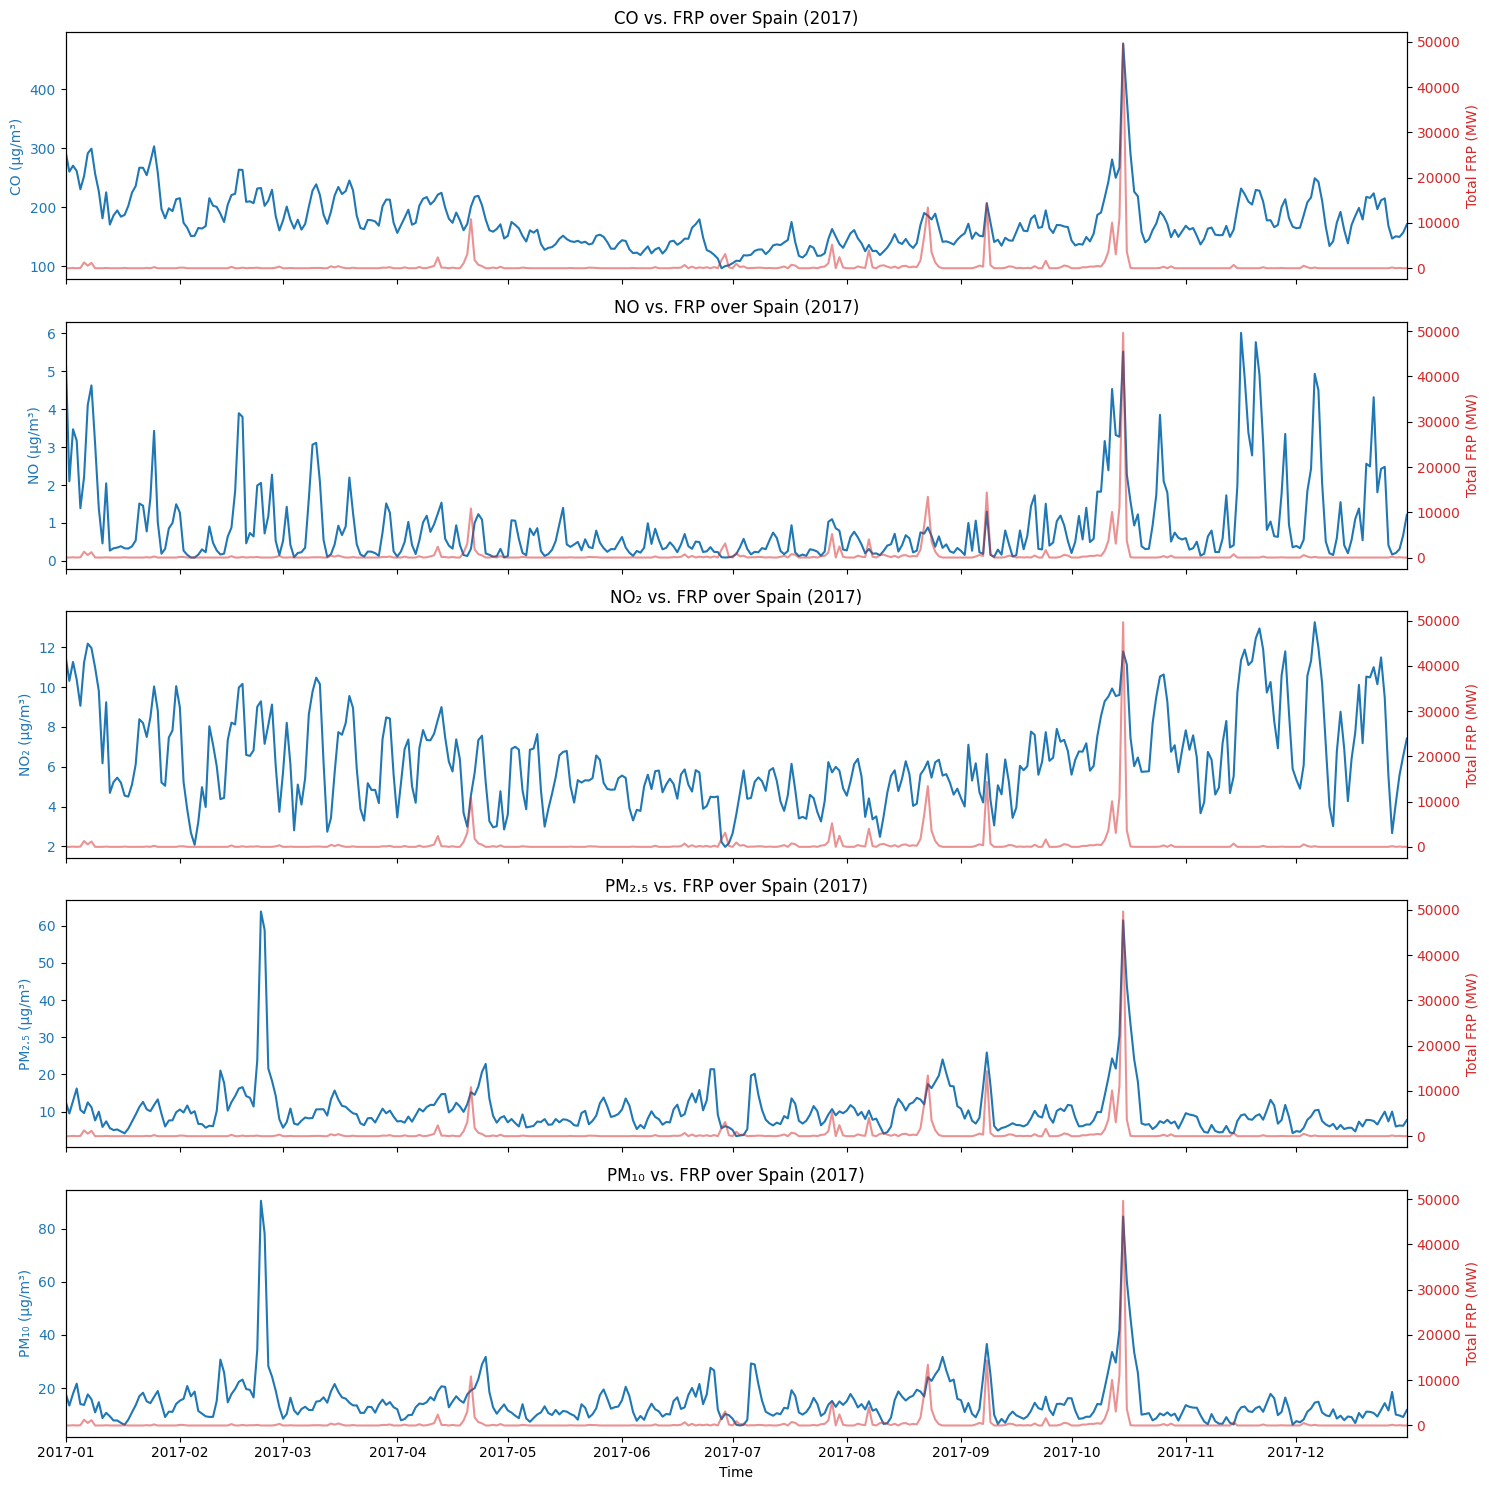

In [7]:
# Certain Year - Spain

import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd

# Set this to a specific year (e.g., 2017), or to None to plot all years
selected_year = 2017

# File paths for each pollutant
files = {
    'CO':     r"D:\IPMA\CAMS\co_fire_Spain.nc",
    'NO':     r"D:\IPMA\CAMS\no_fire_Spain.nc",
    'NO₂':    r"D:\IPMA\CAMS\no2_fire_Spain.nc",
    'PM₂.₅':  r"D:\IPMA\CAMS\pm2p5_fire_Spain.nc",
    'PM₁₀':   r"D:\IPMA\CAMS\pm10_fire_Spain.nc"
}

# Units for each pollutant
pollutant_units = {
    'CO': 'µg/m³',
    'NO': 'µg/m³',
    'NO₂': 'µg/m³',
    'PM₂.₅': 'µg/m³',
    'PM₁₀': 'µg/m³'
}

# Set up figure
fig, axs = plt.subplots(len(files), 1, figsize=(15, 3 * len(files)), sharex=True)

for ax, (pollutant_name, file_path) in zip(axs, files.items()):
    # Load dataset
    ds = xr.open_dataset(file_path)

    # Subset by year if specified
    if selected_year is not None:
        # Ensure time is datetime64
        ds['time'] = pd.to_datetime(ds['time'].values)
        ds = ds.sel(time=ds['time'].dt.year == selected_year)

    # Extract time and limits
    time = ds.time
    if len(time) == 0:
        ax.set_title(f'{pollutant_name} vs. FRP – No data for year {selected_year}')
        continue

    tmin = time.min().values
    tmax = time.max().values

    # Spatial average of pollutant concentration
    pollutant = ds['Mean'].mean(dim=['latitude', 'longitude'])

    # Convert CO mg/m³ → µg/m³
    if pollutant_name == 'CO':
        pollutant = pollutant * 1000

    # Daily total FRP over Spain
    frp = ds['frp_sum_Spain'].sum(dim=['latitude', 'longitude'])

    # Get units
    unit = pollutant_units[pollutant_name]

    # Plot pollutant mean
    ax.plot(time, pollutant, label=f'{pollutant_name} Mean ({unit})', color='tab:blue')
    ax.set_ylabel(f'{pollutant_name} ({unit})', color='tab:blue')
    ax.tick_params(axis='y', labelcolor='tab:blue')
    ax.grid(False)

    # Plot FRP on twin y-axis
    ax2 = ax.twinx()
    ax2.plot(time, frp, label='FRP (MW)', color='tab:red', alpha=0.5)
    ax2.set_ylabel('Total FRP (MW)', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    # Set x-axis limits to match time range
    ax.set_xlim([tmin, tmax])

    # Title
    title = f'{pollutant_name} vs. FRP over Spain'
    if selected_year is not None:
        title += f' ({selected_year})'
    ax.set_title(title)

# Global X label
axs[-1].set_xlabel('Time')
plt.tight_layout()
plt.show()


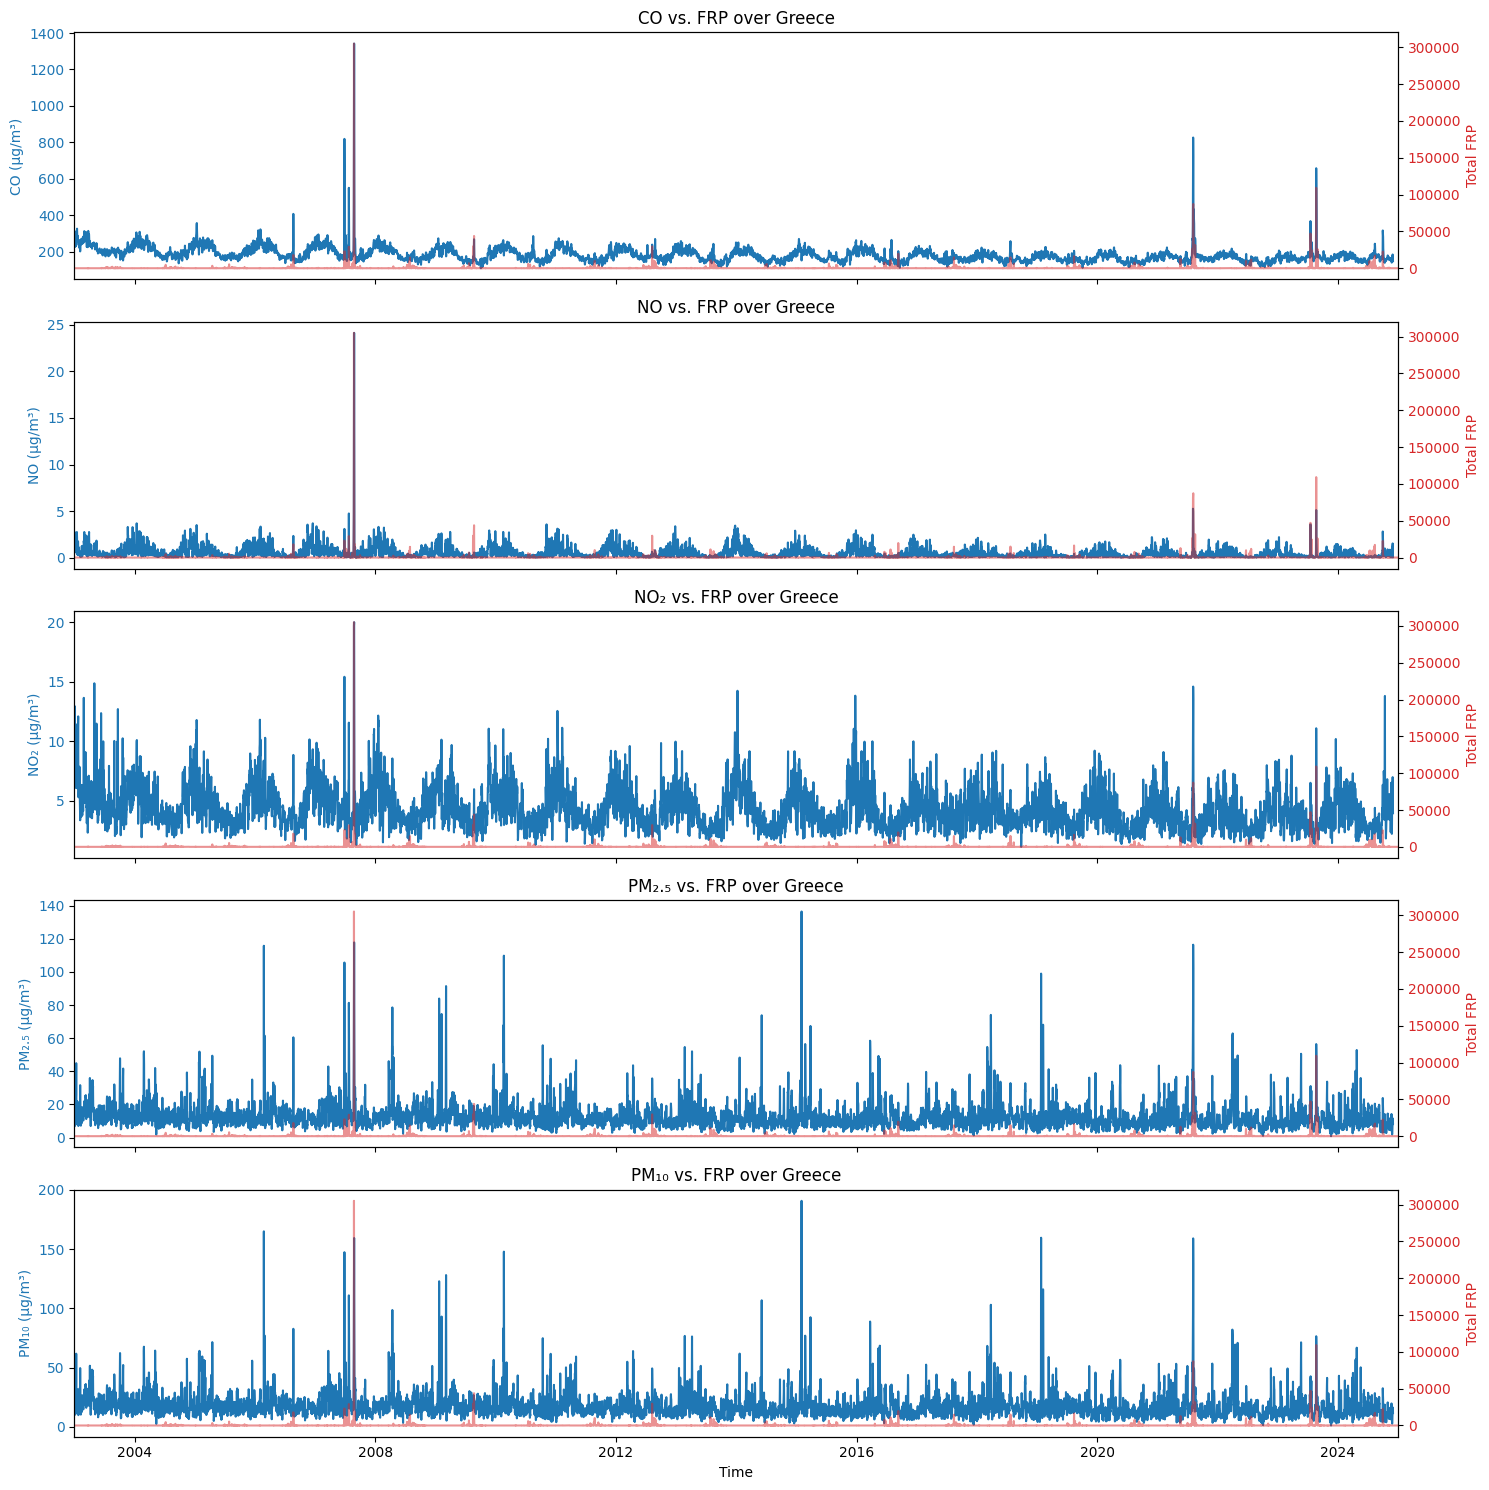

In [8]:
# All Years - Greece

import xarray as xr
import matplotlib.pyplot as plt

# File paths for each pollutant
files = {
    'CO':     r"D:\IPMA\CAMS\co_fire_Greece.nc",
    'NO':     r"D:\IPMA\CAMS\no_fire_Greece.nc",
    'NO₂':    r"D:\IPMA\CAMS\no2_fire_Greece.nc",
    'PM₂.₅':  r"D:\IPMA\CAMS\pm2p5_fire_Greece.nc",
    'PM₁₀':   r"D:\IPMA\CAMS\pm10_fire_Greece.nc"
}

# Correct units for plotting
units = {
    'CO': 'µg/m³',
    'NO': 'µg/m³',
    'NO₂': 'µg/m³',
    'PM₂.₅': 'µg/m³',
    'PM₁₀': 'µg/m³'
}

# Set up figure
fig, axs = plt.subplots(len(files), 1, figsize=(15, 3 * len(files)), sharex=True)

for ax, (pollutant_name, file_path) in zip(axs, files.items()):
    # Load dataset
    ds = xr.open_dataset(file_path)

    # Extract time range
    time = ds.time
    tmin = time.min().values
    tmax = time.max().values

    # Spatial average of pollutant concentration
    pollutant = ds['Mean'].mean(dim=['latitude', 'longitude'])

    # Convert CO mg/m³ → µg/m³
    if pollutant_name == 'CO':
        pollutant = pollutant * 1000

    # Daily total FRP over Greece
    frp = ds['frp_sum_Greece'].sum(dim=['latitude', 'longitude'])

    # Plot pollutant mean
    ax.plot(time, pollutant, label=f'{pollutant_name} Mean ({units[pollutant_name]})', color='tab:blue')
    ax.set_ylabel(f'{pollutant_name} ({units[pollutant_name]})', color='tab:blue')
    ax.tick_params(axis='y', labelcolor='tab:blue')
    ax.grid(False)

    # Plot FRP on twin y-axis
    ax2 = ax.twinx()
    ax2.plot(time, frp, label='FRP (MW)', color='tab:red', alpha=0.5)
    ax2.set_ylabel('Total FRP', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    # Set x-axis limits
    ax.set_xlim([tmin, tmax])

    # Title
    ax.set_title(f'{pollutant_name} vs. FRP over Greece')

# Global X label
axs[-1].set_xlabel('Time')
plt.tight_layout()
plt.show()


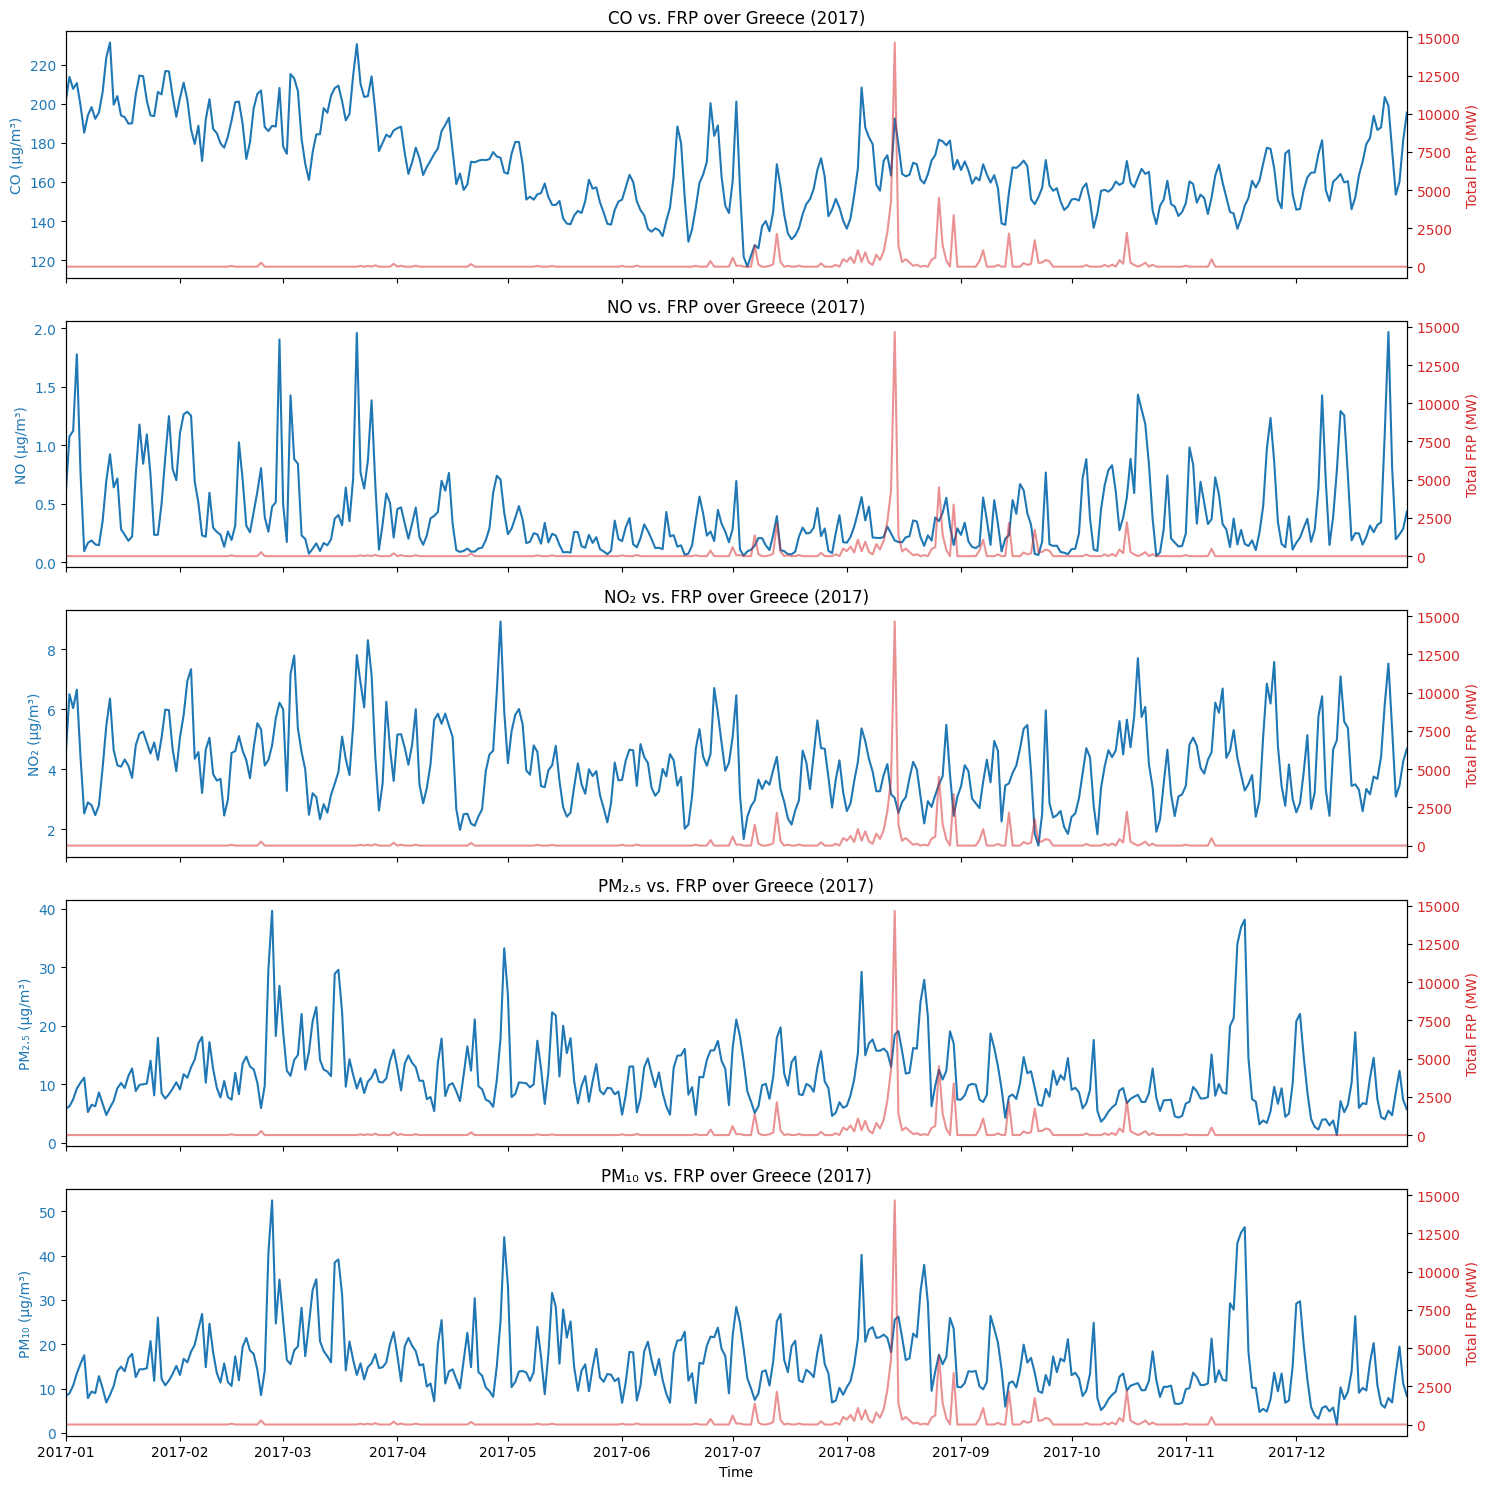

In [9]:
# Certain Year - Greece

import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd

# Set this to a specific year (e.g., 2017), or to None to plot all years
selected_year = 2017

# File paths for each pollutant
files = {
    'CO':     r"D:\IPMA\CAMS\co_fire_Greece.nc",
    'NO':     r"D:\IPMA\CAMS\no_fire_Greece.nc",
    'NO₂':    r"D:\IPMA\CAMS\no2_fire_Greece.nc",
    'PM₂.₅':  r"D:\IPMA\CAMS\pm2p5_fire_Greece.nc",
    'PM₁₀':   r"D:\IPMA\CAMS\pm10_fire_Greece.nc"
}

# Units for each pollutant
pollutant_units = {
    'CO': 'µg/m³',
    'NO': 'µg/m³',
    'NO₂': 'µg/m³',
    'PM₂.₅': 'µg/m³',
    'PM₁₀': 'µg/m³'
}

# Set up figure
fig, axs = plt.subplots(len(files), 1, figsize=(15, 3 * len(files)), sharex=True)

for ax, (pollutant_name, file_path) in zip(axs, files.items()):
    # Load dataset
    ds = xr.open_dataset(file_path)

    # Subset by year if specified
    if selected_year is not None:
        # Ensure time is datetime64
        ds['time'] = pd.to_datetime(ds['time'].values)
        ds = ds.sel(time=ds['time'].dt.year == selected_year)

    # Extract time and limits
    time = ds.time
    if len(time) == 0:
        ax.set_title(f'{pollutant_name} vs. FRP – No data for year {selected_year}')
        continue

    tmin = time.min().values
    tmax = time.max().values

    # Spatial average of pollutant concentration
    pollutant = ds['Mean'].mean(dim=['latitude', 'longitude'])

    # Convert CO mg/m³ → µg/m³
    if pollutant_name == 'CO':
        pollutant = pollutant * 1000

    # Daily total FRP over Greece
    frp = ds['frp_sum_Greece'].sum(dim=['latitude', 'longitude'])

    # Get units
    unit = pollutant_units[pollutant_name]

    # Plot pollutant mean
    ax.plot(time, pollutant, label=f'{pollutant_name} Mean ({unit})', color='tab:blue')
    ax.set_ylabel(f'{pollutant_name} ({unit})', color='tab:blue')
    ax.tick_params(axis='y', labelcolor='tab:blue')
    ax.grid(False)

    # Plot FRP on twin y-axis
    ax2 = ax.twinx()
    ax2.plot(time, frp, label='FRP (MW)', color='tab:red', alpha=0.5)
    ax2.set_ylabel('Total FRP (MW)', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    # Set x-axis limits to match time range
    ax.set_xlim([tmin, tmax])

    # Title
    title = f'{pollutant_name} vs. FRP over Greece'
    if selected_year is not None:
        title += f' ({selected_year})'
    ax.set_title(title)

# Global X label
axs[-1].set_xlabel('Time')
plt.tight_layout()
plt.show()


Crossover of FRP (fire foci - count) and Pollutants levels in a time series template over the years or single year

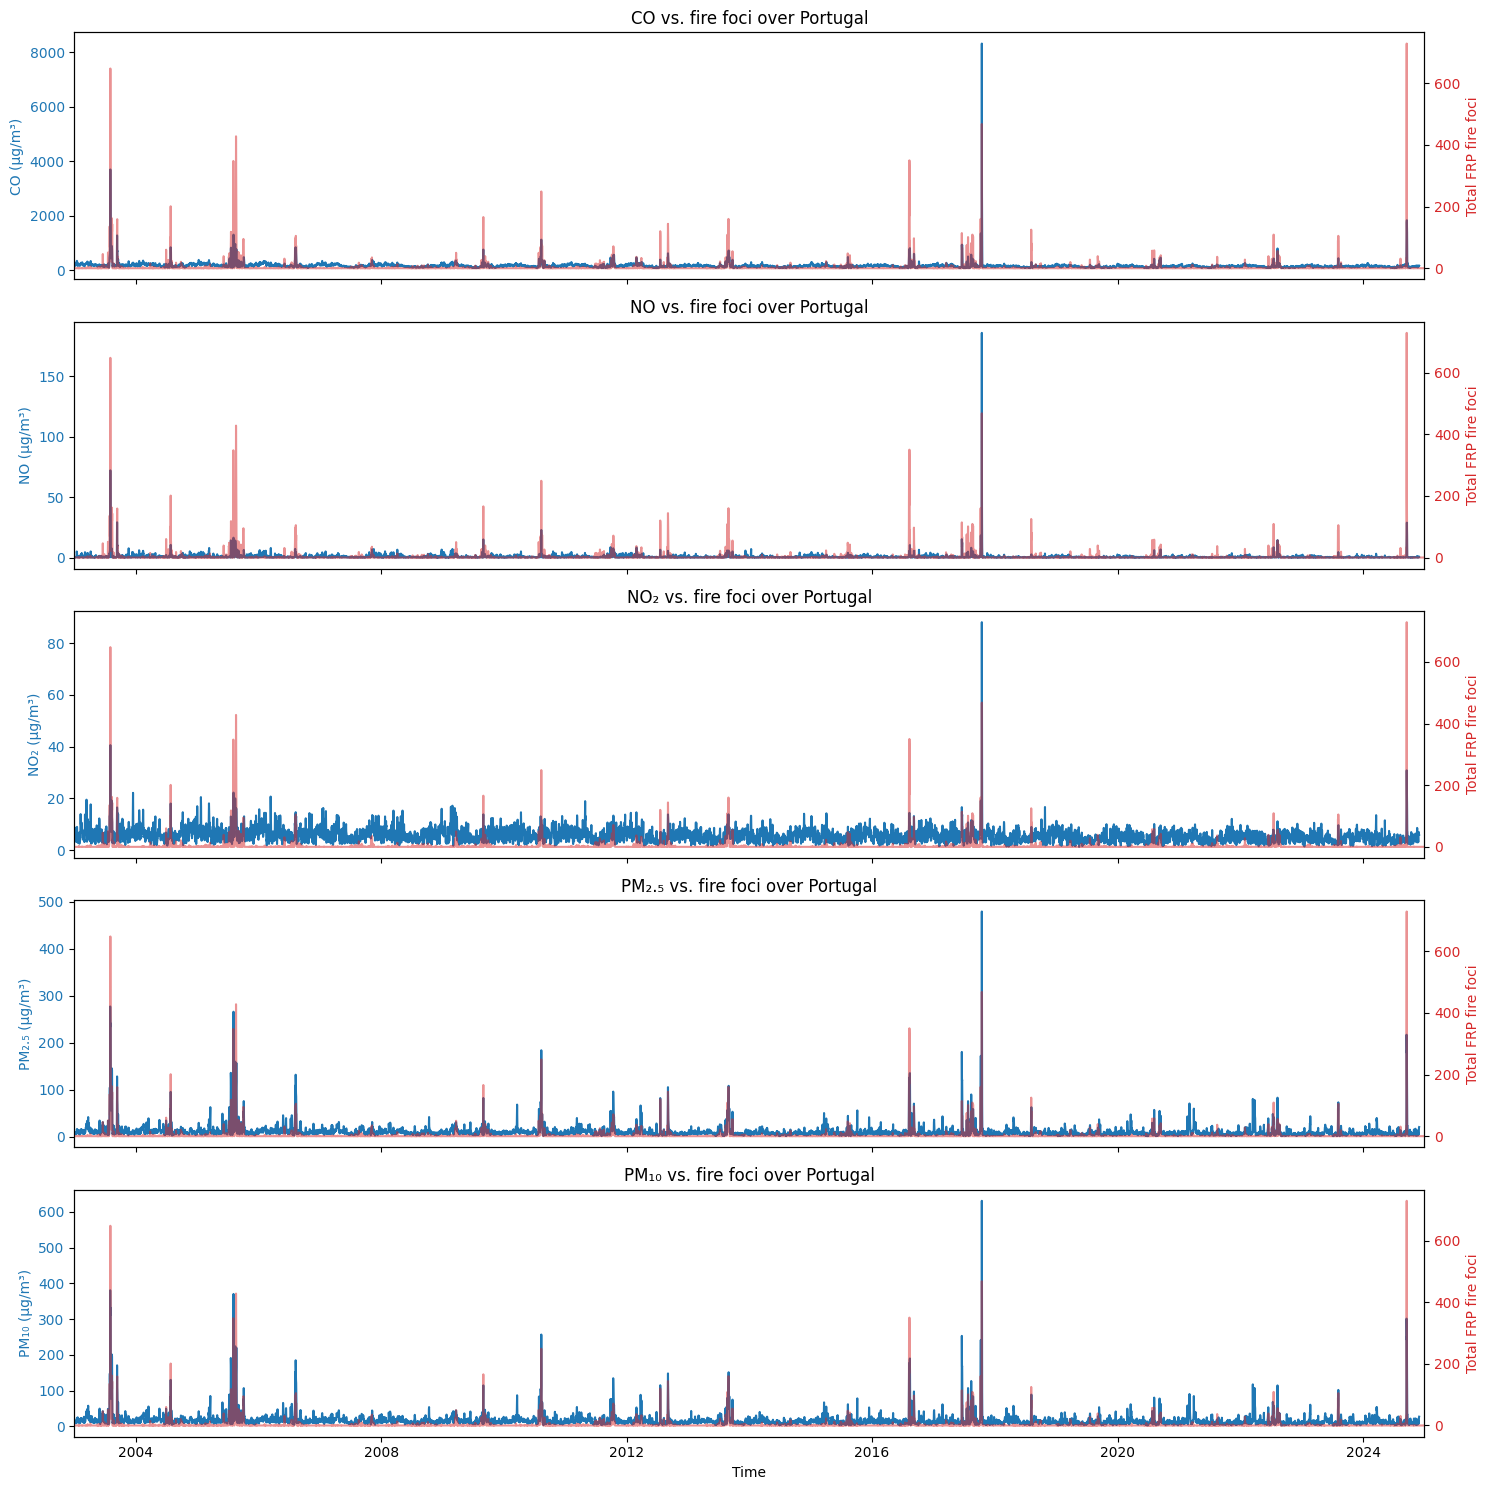

In [10]:
# All Years - Portugal

import xarray as xr
import matplotlib.pyplot as plt

# File paths for each pollutant
files = {
    'CO':     r"D:\IPMA\CAMS\co_fire_Portugal.nc",
    'NO':     r"D:\IPMA\CAMS\no_fire_Portugal.nc",
    'NO₂':    r"D:\IPMA\CAMS\no2_fire_Portugal.nc",
    'PM₂.₅':  r"D:\IPMA\CAMS\pm2p5_fire_Portugal.nc",
    'PM₁₀':   r"D:\IPMA\CAMS\pm10_fire_Portugal.nc"
}

# Correct units for plotting
units = {
    'CO': 'µg/m³',
    'NO': 'µg/m³',
    'NO₂': 'µg/m³',
    'PM₂.₅': 'µg/m³',
    'PM₁₀': 'µg/m³'
}

# Set up figure
fig, axs = plt.subplots(len(files), 1, figsize=(15, 3 * len(files)), sharex=True)

for ax, (pollutant_name, file_path) in zip(axs, files.items()):
    # Load dataset
    ds = xr.open_dataset(file_path)

    # Extract time range
    time = ds.time
    tmin = time.min().values
    tmax = time.max().values

    # Spatial average of pollutant concentration
    pollutant = ds['Mean'].mean(dim=['latitude', 'longitude'])

    # Convert CO mg/m³ → µg/m³
    if pollutant_name == 'CO':
        pollutant = pollutant * 1000

    # Daily total count FRP over Portugal
    frp = ds['frp_count_Portugal'].sum(dim=['latitude', 'longitude'])

    # Plot pollutant mean
    ax.plot(time, pollutant, label=f'{pollutant_name} Mean ({units[pollutant_name]})', color='tab:blue')
    ax.set_ylabel(f'{pollutant_name} ({units[pollutant_name]})', color='tab:blue')
    ax.tick_params(axis='y', labelcolor='tab:blue')
    ax.grid(False)

    # Plot FRP on twin y-axis
    ax2 = ax.twinx()
    ax2.plot(time, frp, label='FRP', color='tab:red', alpha=0.5)
    ax2.set_ylabel('Total FRP fire foci', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    # Set x-axis limits
    ax.set_xlim([tmin, tmax])

    # Title
    ax.set_title(f'{pollutant_name} vs. fire foci over Portugal')

# Global X label
axs[-1].set_xlabel('Time')
plt.tight_layout()
plt.show()


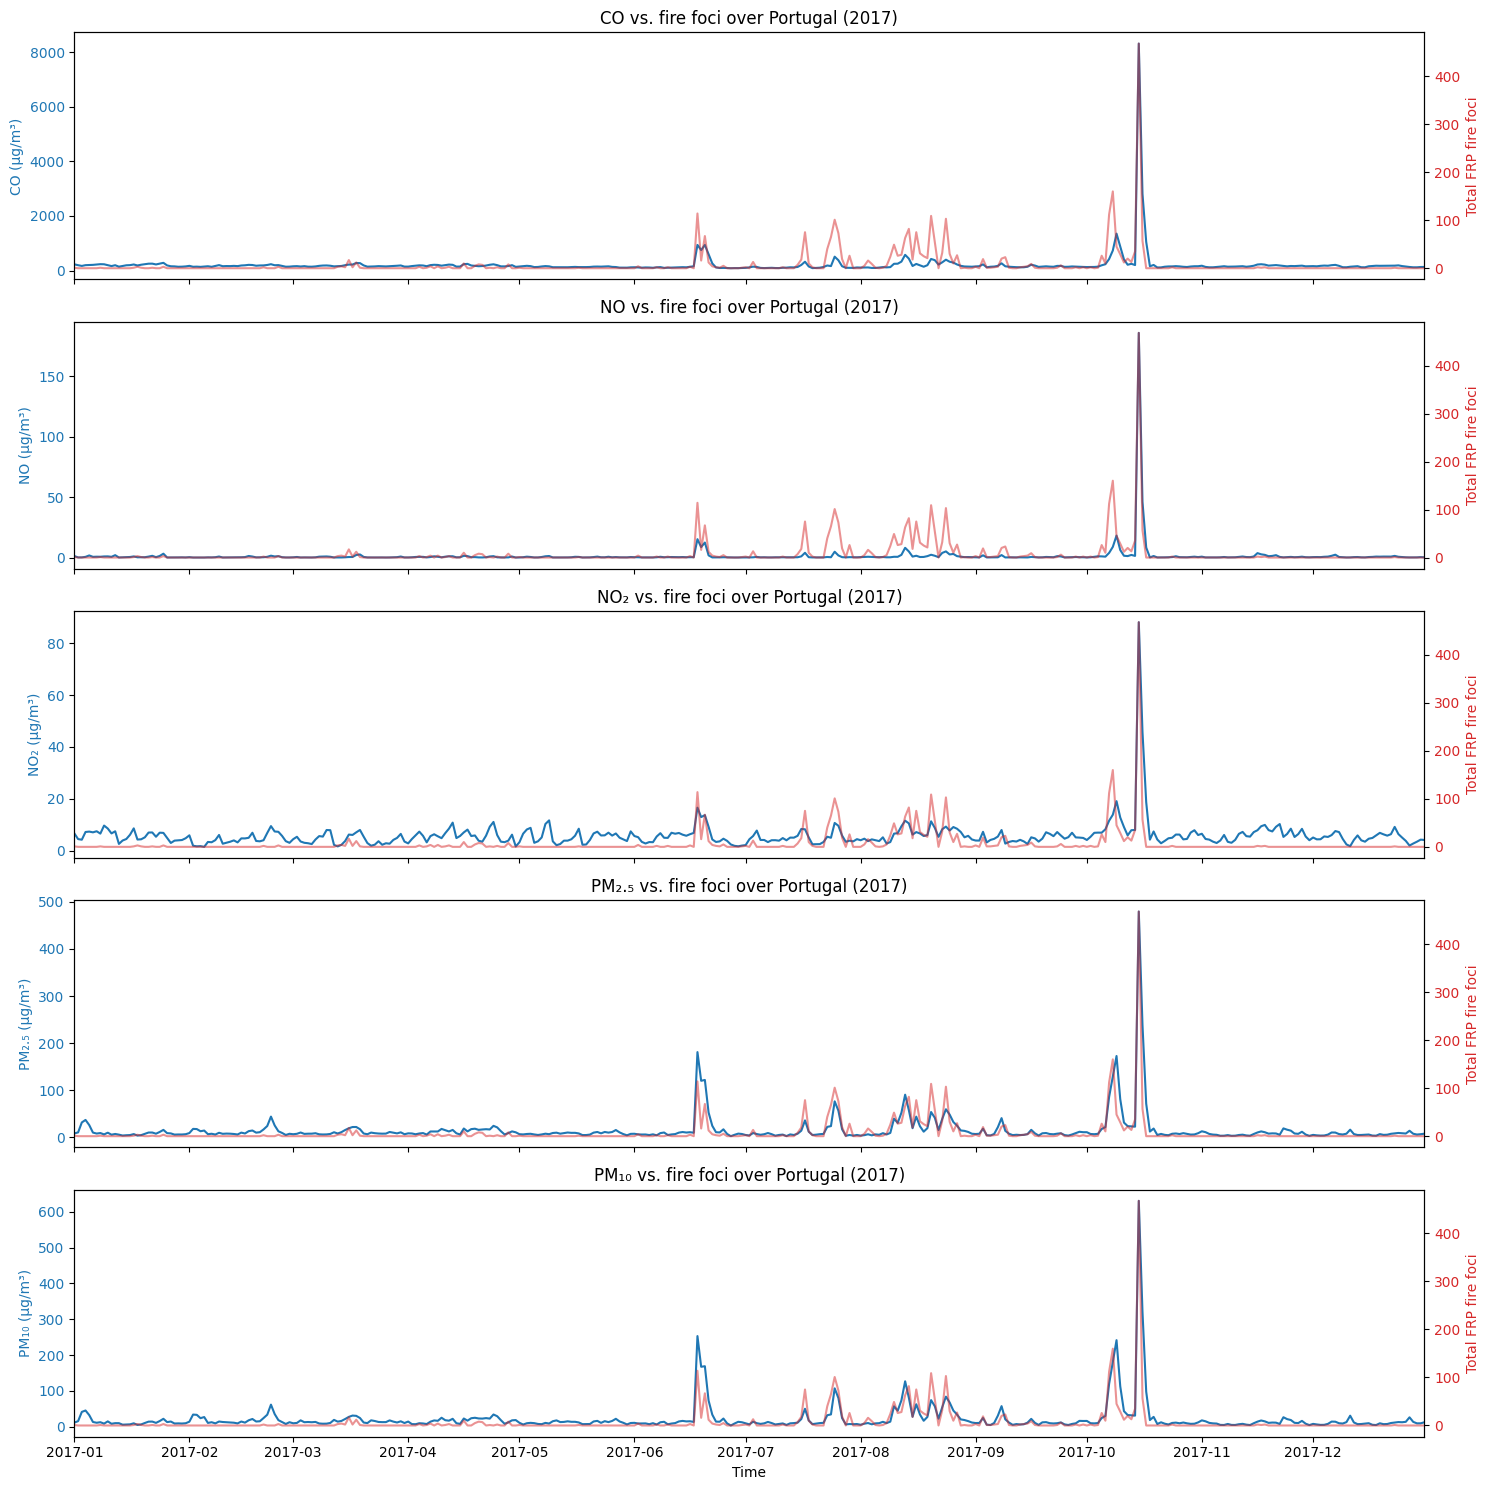

In [11]:
# Certain Year - Portugal

import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd

# Set this to a specific year (e.g., 2017), or to None to plot all years
selected_year = 2017

# File paths for each pollutant
files = {
    'CO':     r"D:\IPMA\CAMS\co_fire_Portugal.nc",
    'NO':     r"D:\IPMA\CAMS\no_fire_Portugal.nc",
    'NO₂':    r"D:\IPMA\CAMS\no2_fire_Portugal.nc",
    'PM₂.₅':  r"D:\IPMA\CAMS\pm2p5_fire_Portugal.nc",
    'PM₁₀':   r"D:\IPMA\CAMS\pm10_fire_Portugal.nc"
}

# Units for each pollutant
pollutant_units = {
    'CO': 'µg/m³',
    'NO': 'µg/m³',
    'NO₂': 'µg/m³',
    'PM₂.₅': 'µg/m³',
    'PM₁₀': 'µg/m³'
}

# Set up figure
fig, axs = plt.subplots(len(files), 1, figsize=(15, 3 * len(files)), sharex=True)

for ax, (pollutant_name, file_path) in zip(axs, files.items()):
    # Load dataset
    ds = xr.open_dataset(file_path)

    # Subset by year if specified
    if selected_year is not None:
        # Ensure time is a datetime64
        ds['time'] = pd.to_datetime(ds['time'].values)
        ds = ds.sel(time=ds['time'].dt.year == selected_year)

    # Extract time and limits
    time = ds.time
    if len(time) == 0:
        ax.set_title(f'{pollutant_name} vs. FRP – No data for year {selected_year}')
        continue

    tmin = time.min().values
    tmax = time.max().values

    # Spatial average of pollutant concentration
    pollutant = ds['Mean'].mean(dim=['latitude', 'longitude'])

    # Convert CO mg/m³ → µg/m³
    if pollutant_name == 'CO':
        pollutant = pollutant * 1000

    # Daily total count FRP over Portugal
    frp = ds['frp_count_Portugal'].sum(dim=['latitude', 'longitude'])

    # Get units
    unit = pollutant_units[pollutant_name]

    # Plot pollutant mean
    ax.plot(time, pollutant, label=f'{pollutant_name} Mean ({unit})', color='tab:blue')
    ax.set_ylabel(f'{pollutant_name} ({unit})', color='tab:blue')
    ax.tick_params(axis='y', labelcolor='tab:blue')
    ax.grid(False)

    # Plot FRP on twin y-axis
    ax2 = ax.twinx()
    ax2.plot(time, frp, label='FRP', color='tab:red', alpha=0.5)
    ax2.set_ylabel('Total FRP fire foci', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    # Set x-axis limits to match time range
    ax.set_xlim([tmin, tmax])

    # Title
    title = f'{pollutant_name} vs. fire foci over Portugal'
    if selected_year is not None:
        title += f' ({selected_year})'
    ax.set_title(title)

# Global X label
axs[-1].set_xlabel('Time')
plt.tight_layout()
plt.show()


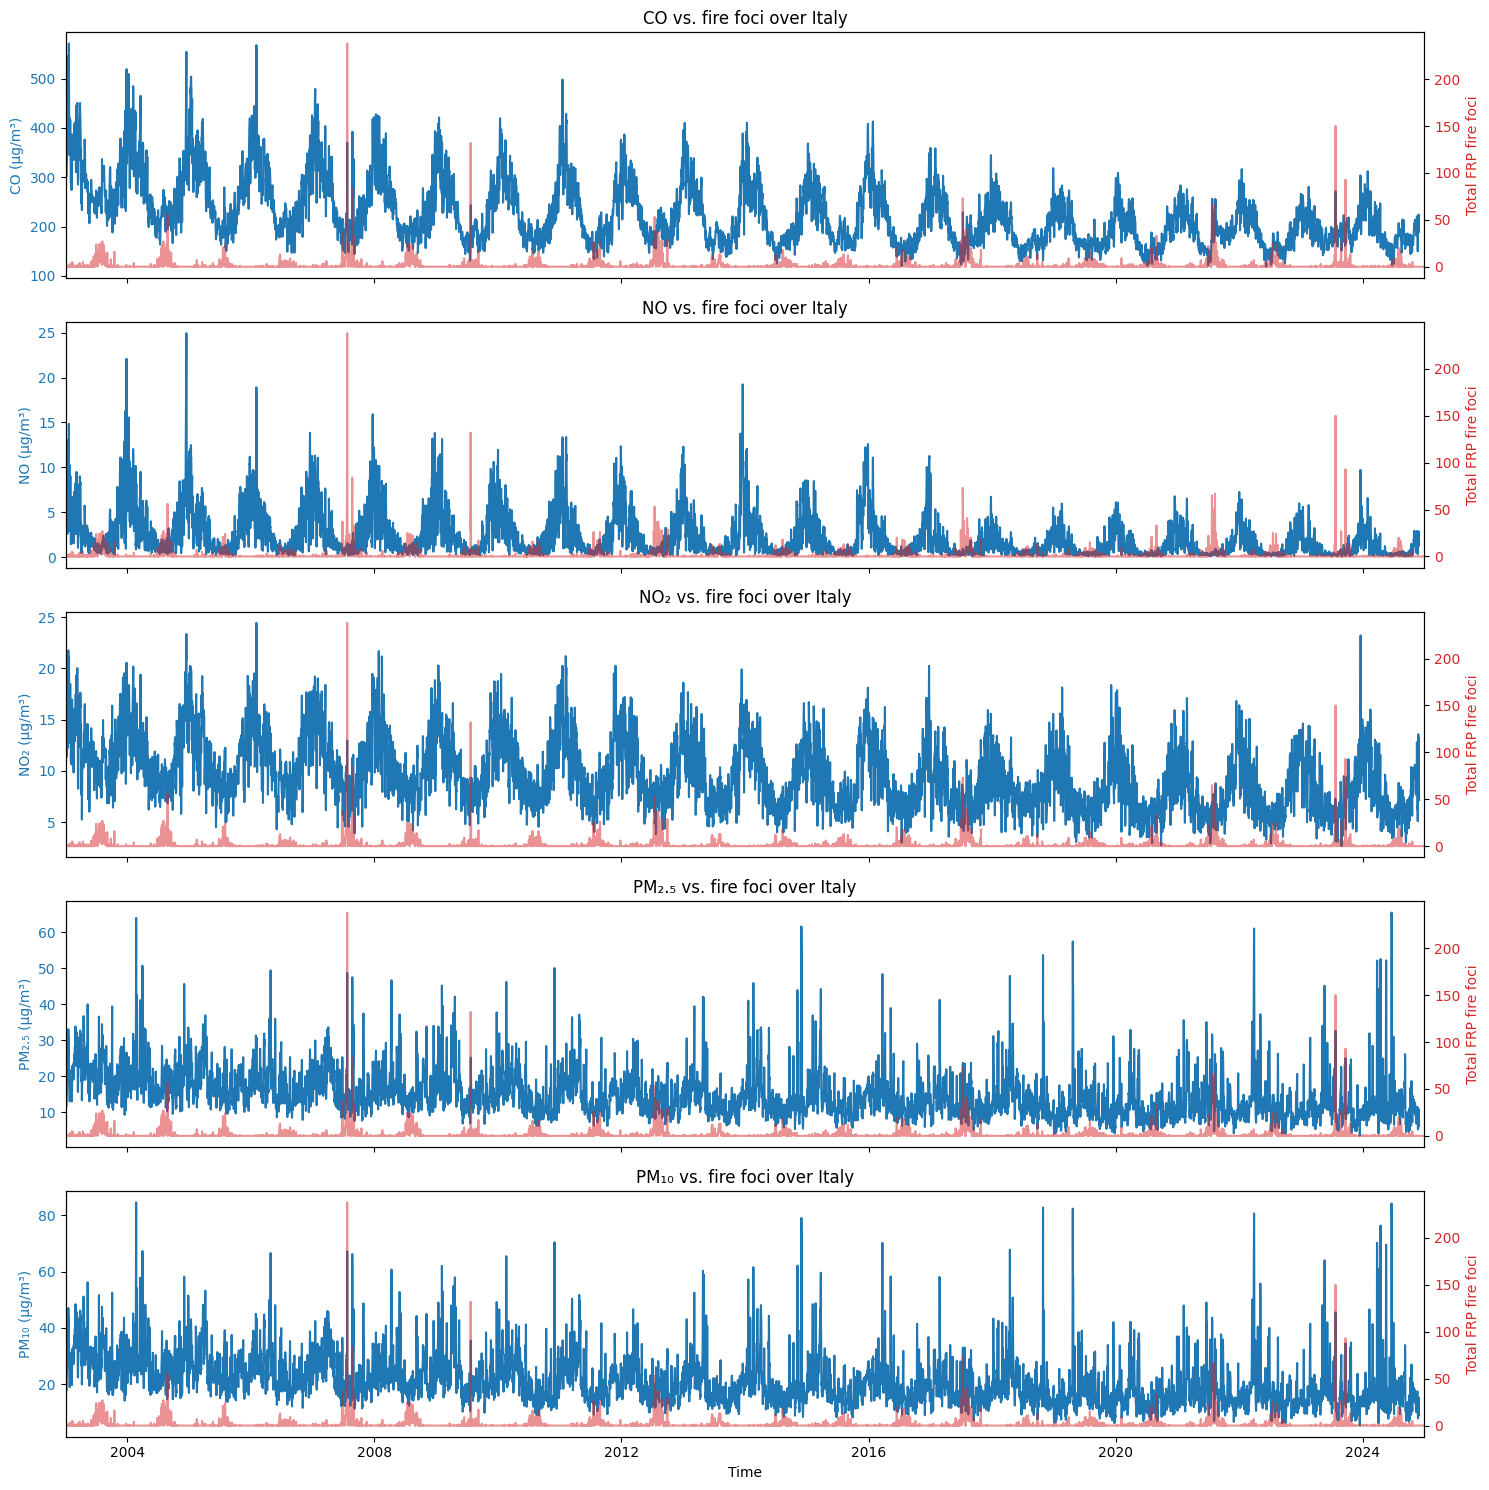

In [12]:
# All Years - Italy

import xarray as xr
import matplotlib.pyplot as plt

# File paths for each pollutant
files = {
    'CO':     r"D:\IPMA\CAMS\co_fire_Italy.nc",
    'NO':     r"D:\IPMA\CAMS\no_fire_Italy.nc",
    'NO₂':    r"D:\IPMA\CAMS\no2_fire_Italy.nc",
    'PM₂.₅':  r"D:\IPMA\CAMS\pm2p5_fire_Italy.nc",
    'PM₁₀':   r"D:\IPMA\CAMS\pm10_fire_Italy.nc"
}

# Correct units for plotting
units = {
    'CO': 'µg/m³',
    'NO': 'µg/m³',
    'NO₂': 'µg/m³',
    'PM₂.₅': 'µg/m³',
    'PM₁₀': 'µg/m³'
}

# Set up figure
fig, axs = plt.subplots(len(files), 1, figsize=(15, 3 * len(files)), sharex=True)

for ax, (pollutant_name, file_path) in zip(axs, files.items()):
    # Load dataset
    ds = xr.open_dataset(file_path)

    # Extract time range
    time = ds.time
    tmin = time.min().values
    tmax = time.max().values

    # Spatial average of pollutant concentration
    pollutant = ds['Mean'].mean(dim=['latitude', 'longitude'])

    # Convert CO mg/m³ → µg/m³
    if pollutant_name == 'CO':
        pollutant = pollutant * 1000

    # Daily total count FRP over Italy
    frp = ds['frp_count_Italy'].sum(dim=['latitude', 'longitude'])

    # Plot pollutant mean
    ax.plot(time, pollutant, label=f'{pollutant_name} Mean ({units[pollutant_name]})', color='tab:blue')
    ax.set_ylabel(f'{pollutant_name} ({units[pollutant_name]})', color='tab:blue')
    ax.tick_params(axis='y', labelcolor='tab:blue')
    ax.grid(False)

    # Plot FRP on twin y-axis
    ax2 = ax.twinx()
    ax2.plot(time, frp, label='FRP', color='tab:red', alpha=0.5)
    ax2.set_ylabel('Total FRP fire foci', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    # Set x-axis limits
    ax.set_xlim([tmin, tmax])

    # Title
    ax.set_title(f'{pollutant_name} vs. fire foci over Italy')

# Global X label
axs[-1].set_xlabel('Time')
plt.tight_layout()
plt.show()


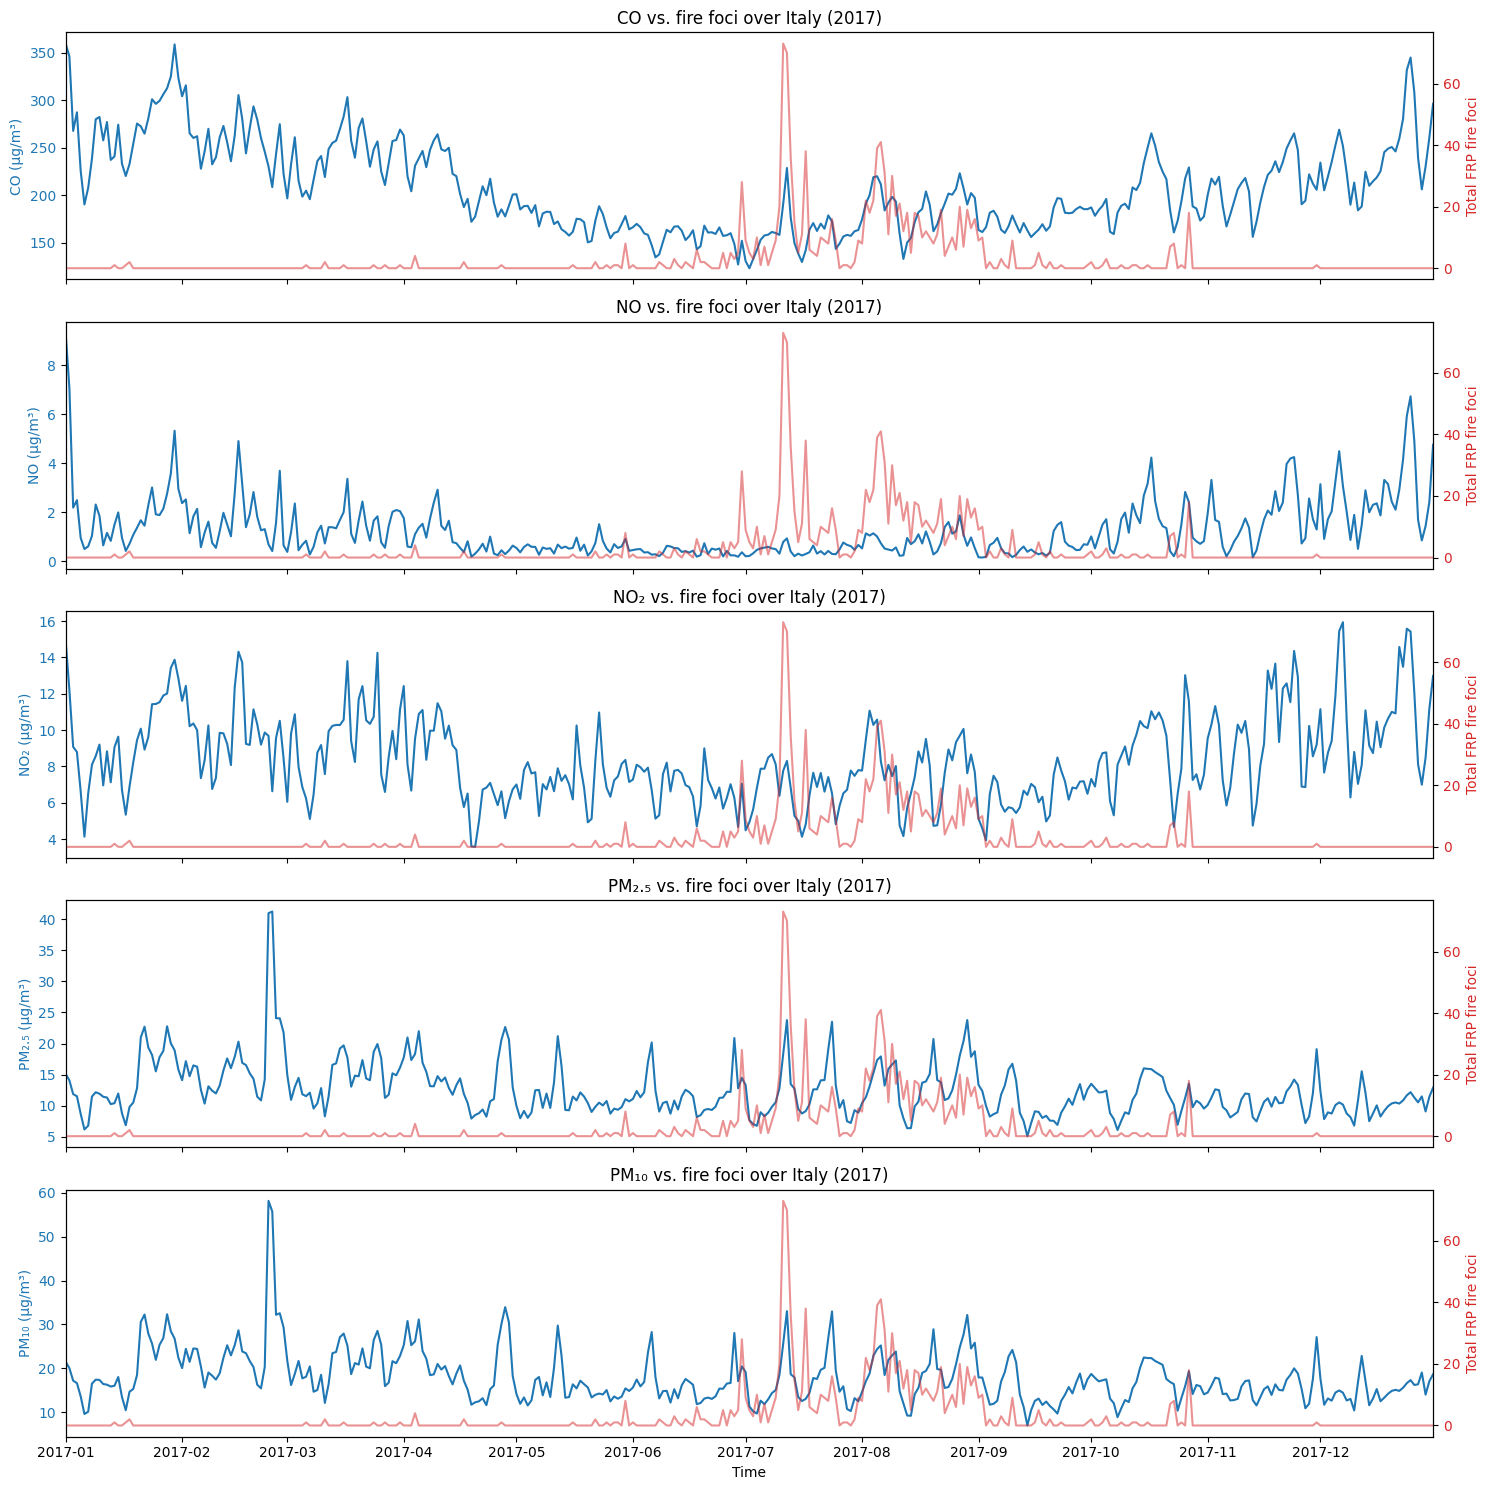

In [13]:
# Certain Year - Italy

import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd

# Set this to a specific year (e.g., 2017), or to None to plot all years
selected_year = 2017

# File paths for each pollutant
files = {
    'CO':     r"D:\IPMA\CAMS\co_fire_Italy.nc",
    'NO':     r"D:\IPMA\CAMS\no_fire_Italy.nc",
    'NO₂':    r"D:\IPMA\CAMS\no2_fire_Italy.nc",
    'PM₂.₅':  r"D:\IPMA\CAMS\pm2p5_fire_Italy.nc",
    'PM₁₀':   r"D:\IPMA\CAMS\pm10_fire_Italy.nc"
}

# Units for each pollutant
pollutant_units = {
    'CO': 'µg/m³',
    'NO': 'µg/m³',
    'NO₂': 'µg/m³',
    'PM₂.₅': 'µg/m³',
    'PM₁₀': 'µg/m³'
}

# Set up figure
fig, axs = plt.subplots(len(files), 1, figsize=(15, 3 * len(files)), sharex=True)

for ax, (pollutant_name, file_path) in zip(axs, files.items()):
    # Load dataset
    ds = xr.open_dataset(file_path)

    # Subset by year if specified
    if selected_year is not None:
        # Ensure time is a datetime64
        ds['time'] = pd.to_datetime(ds['time'].values)
        ds = ds.sel(time=ds['time'].dt.year == selected_year)

    # Extract time and limits
    time = ds.time
    if len(time) == 0:
        ax.set_title(f'{pollutant_name} vs. FRP – No data for year {selected_year}')
        continue

    tmin = time.min().values
    tmax = time.max().values

    # Spatial average of pollutant concentration
    pollutant = ds['Mean'].mean(dim=['latitude', 'longitude'])

    # Convert CO mg/m³ → µg/m³
    if pollutant_name == 'CO':
        pollutant = pollutant * 1000    

    # Daily total count FRP over Italy
    frp = ds['frp_count_Italy'].sum(dim=['latitude', 'longitude'])

    # Get units
    unit = pollutant_units[pollutant_name]

    # Plot pollutant mean
    ax.plot(time, pollutant, label=f'{pollutant_name} Mean ({unit})', color='tab:blue')
    ax.set_ylabel(f'{pollutant_name} ({unit})', color='tab:blue')
    ax.tick_params(axis='y', labelcolor='tab:blue')
    ax.grid(False)

    # Plot FRP on twin y-axis
    ax2 = ax.twinx()
    ax2.plot(time, frp, label='FRP', color='tab:red', alpha=0.5)
    ax2.set_ylabel('Total FRP fire foci', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    # Set x-axis limits to match time range
    ax.set_xlim([tmin, tmax])

    # Title
    title = f'{pollutant_name} vs. fire foci over Italy'
    if selected_year is not None:
        title += f' ({selected_year})'
    ax.set_title(title)

# Global X label
axs[-1].set_xlabel('Time')
plt.tight_layout()
plt.show()


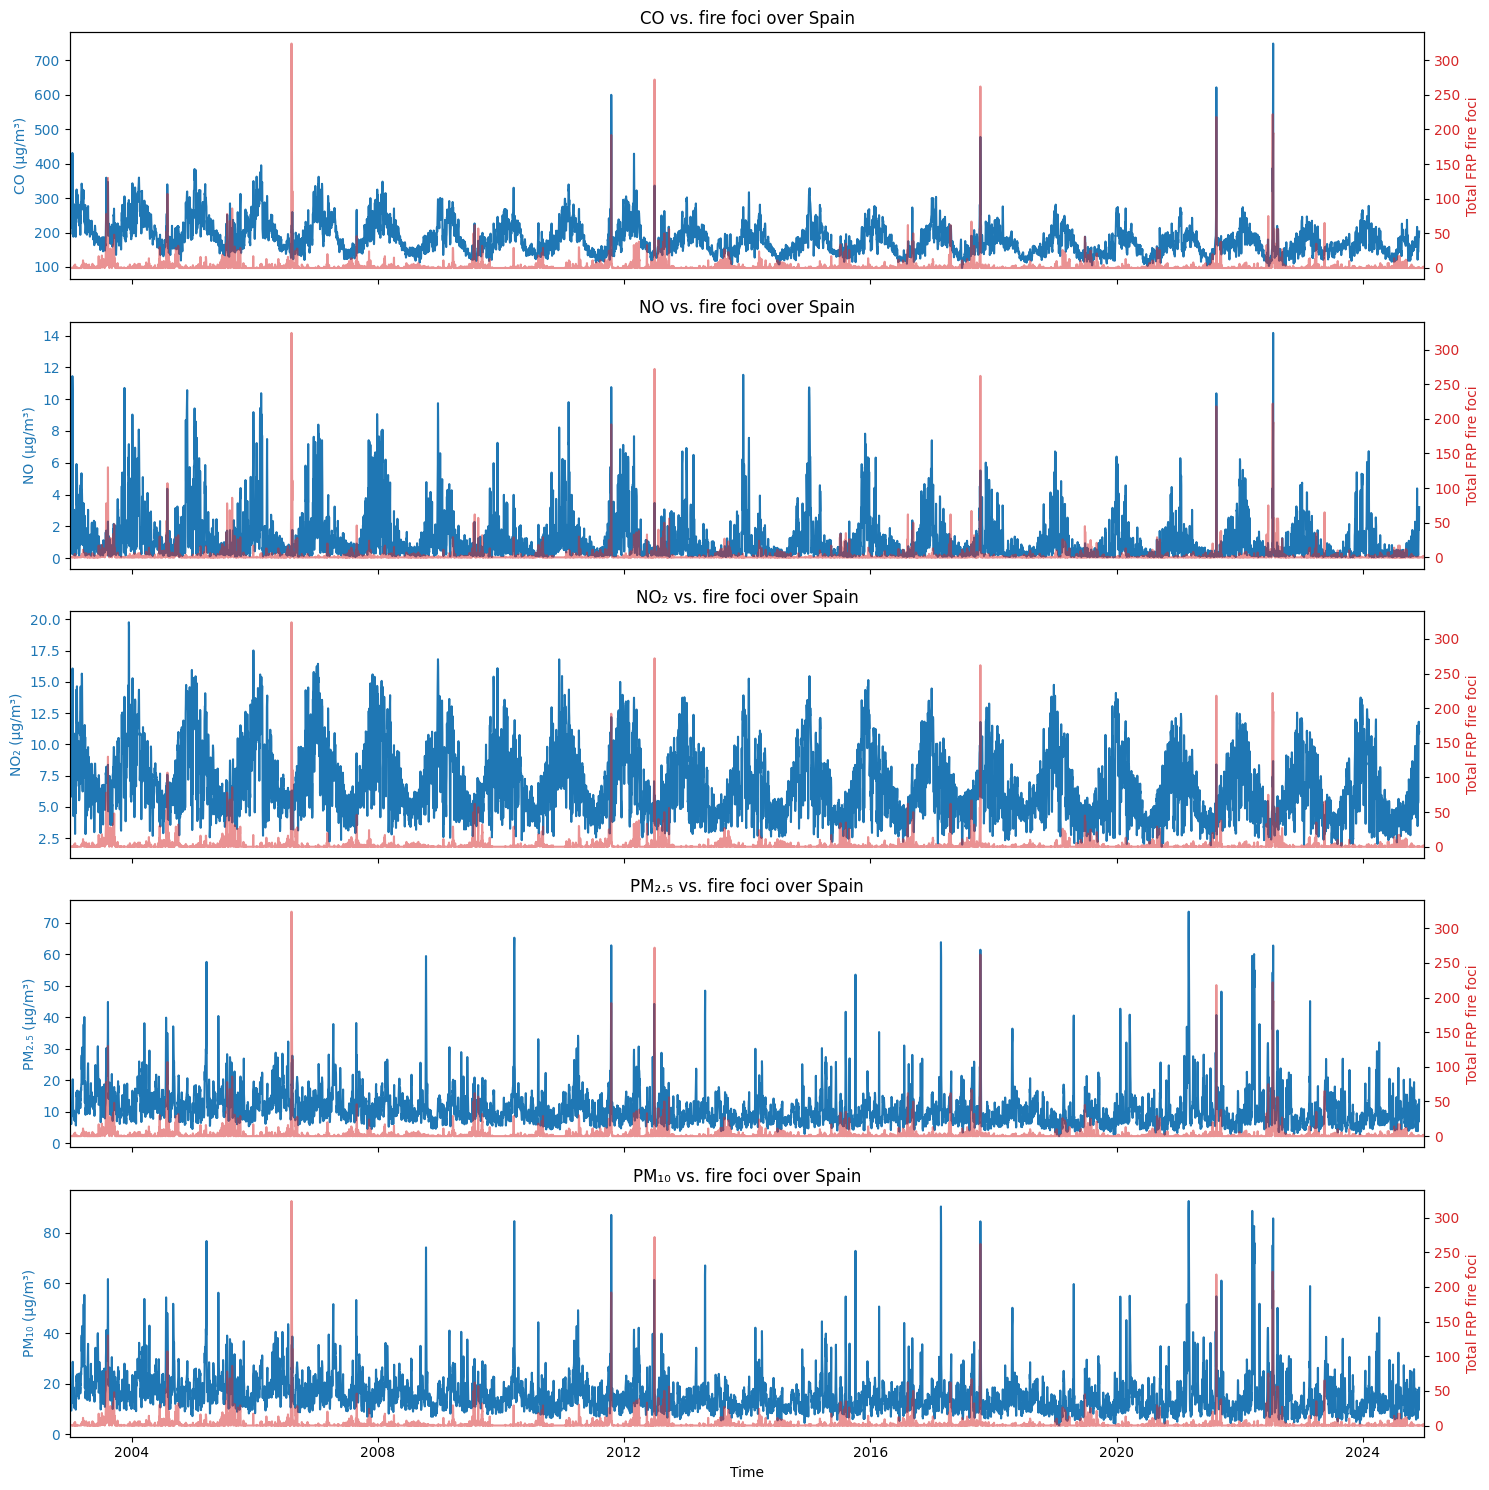

In [14]:
# All Years - Spain

import xarray as xr
import matplotlib.pyplot as plt

# File paths for each pollutant
files = {
    'CO':     r"D:\IPMA\CAMS\co_fire_Spain.nc",
    'NO':     r"D:\IPMA\CAMS\no_fire_Spain.nc",
    'NO₂':    r"D:\IPMA\CAMS\no2_fire_Spain.nc",
    'PM₂.₅':  r"D:\IPMA\CAMS\pm2p5_fire_Spain.nc",
    'PM₁₀':   r"D:\IPMA\CAMS\pm10_fire_Spain.nc"
}

# Correct units for plotting
units = {
    'CO': 'µg/m³',
    'NO': 'µg/m³',
    'NO₂': 'µg/m³',
    'PM₂.₅': 'µg/m³',
    'PM₁₀': 'µg/m³'
}

# Set up figure
fig, axs = plt.subplots(len(files), 1, figsize=(15, 3 * len(files)), sharex=True)

for ax, (pollutant_name, file_path) in zip(axs, files.items()):
    # Load dataset
    ds = xr.open_dataset(file_path)

    # Extract time range
    time = ds.time
    tmin = time.min().values
    tmax = time.max().values

    # Spatial average of pollutant concentration
    pollutant = ds['Mean'].mean(dim=['latitude', 'longitude'])

    # Convert CO mg/m³ → µg/m³
    if pollutant_name == 'CO':
        pollutant = pollutant * 1000

    # Daily total count FRP over Spain
    frp = ds['frp_count_Spain'].sum(dim=['latitude', 'longitude'])

    # Plot pollutant mean
    ax.plot(time, pollutant, label=f'{pollutant_name} Mean ({units[pollutant_name]})', color='tab:blue')
    ax.set_ylabel(f'{pollutant_name} ({units[pollutant_name]})', color='tab:blue')
    ax.tick_params(axis='y', labelcolor='tab:blue')
    ax.grid(False)

    # Plot FRP on twin y-axis
    ax2 = ax.twinx()
    ax2.plot(time, frp, label='FRP', color='tab:red', alpha=0.5)
    ax2.set_ylabel('Total FRP fire foci', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    # Set x-axis limits
    ax.set_xlim([tmin, tmax])

    # Title
    ax.set_title(f'{pollutant_name} vs. fire foci over Spain')

# Global X label
axs[-1].set_xlabel('Time')
plt.tight_layout()
plt.show()


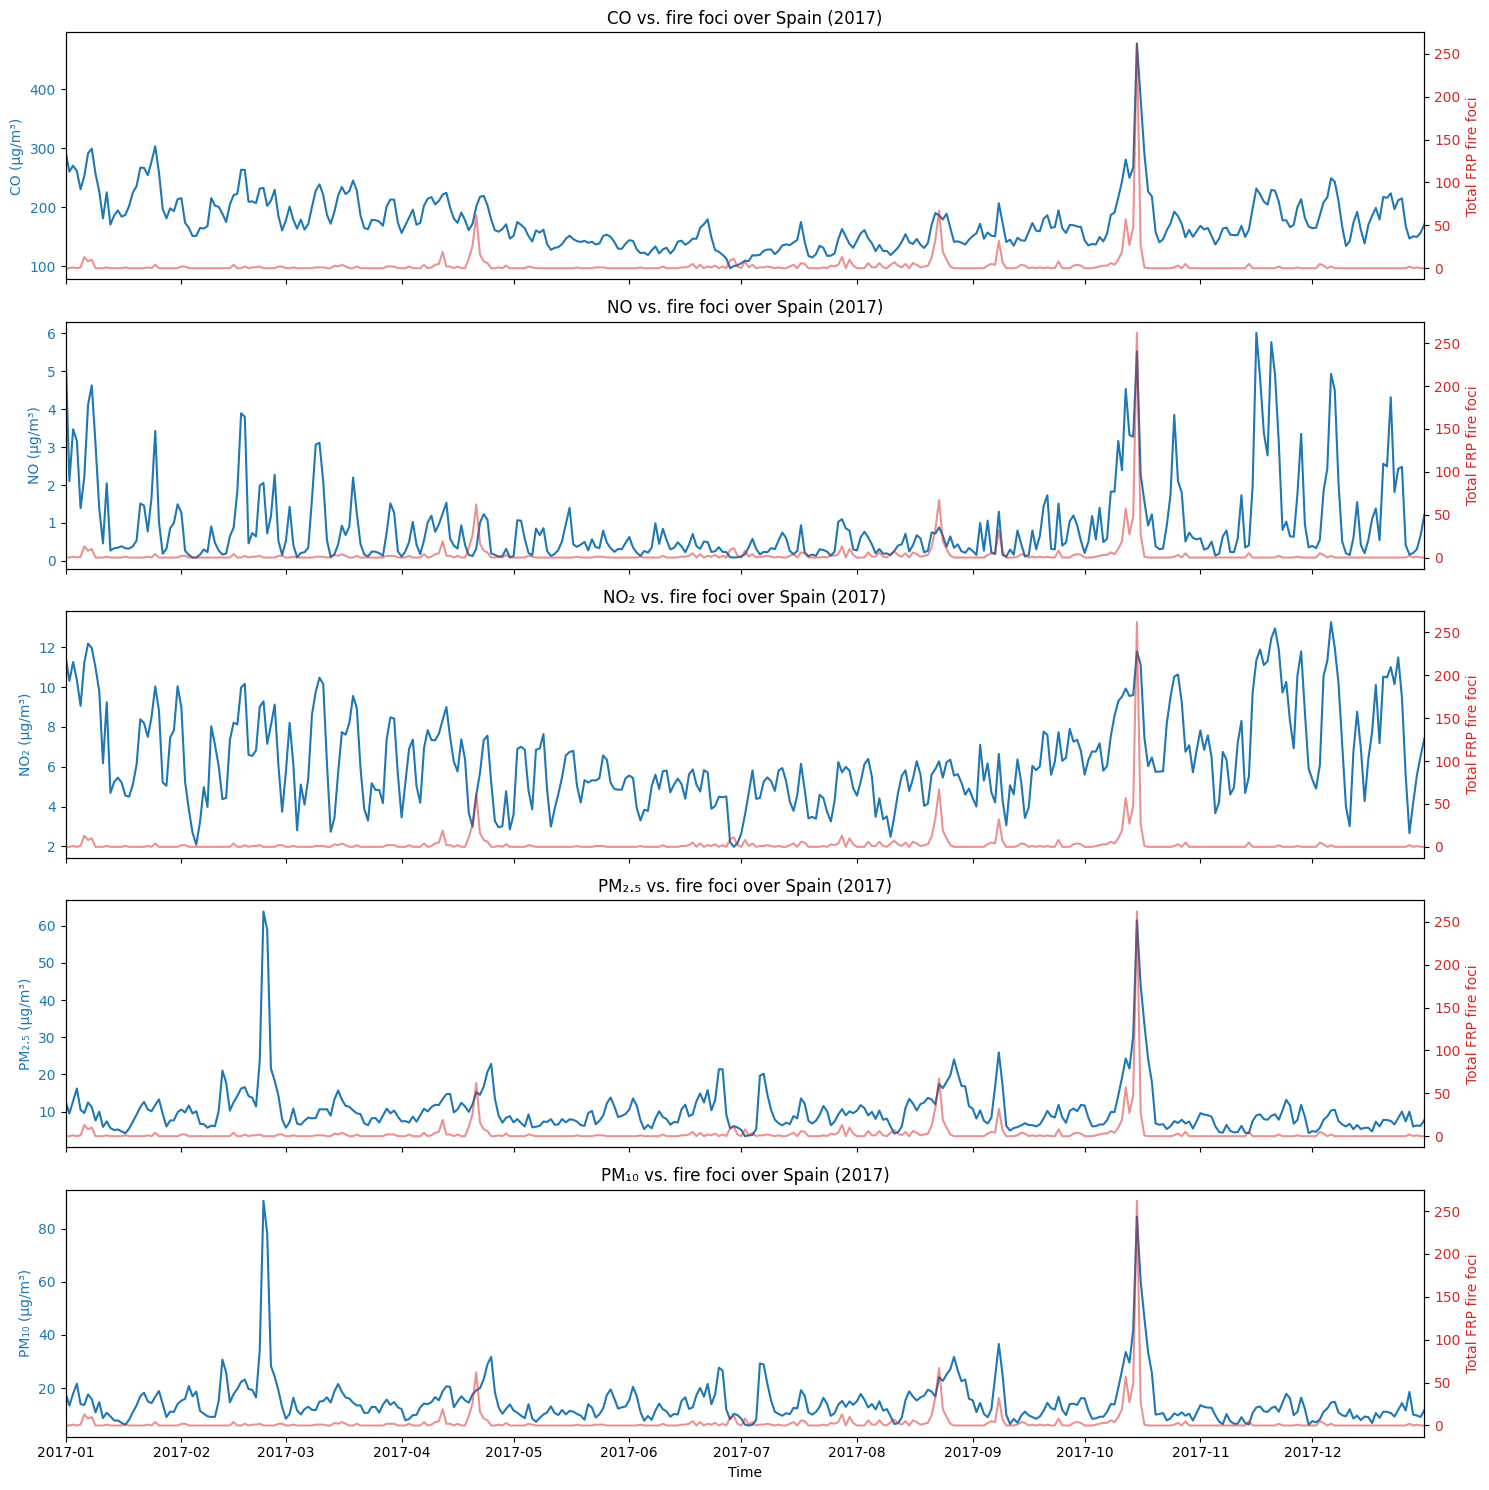

In [15]:
# Certain Year - Spain

import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd

# Set this to a specific year (e.g., 2017), or to None to plot all years
selected_year = 2017

# File paths for each pollutant
files = {
    'CO':     r"D:\IPMA\CAMS\co_fire_Spain.nc",
    'NO':     r"D:\IPMA\CAMS\no_fire_Spain.nc",
    'NO₂':    r"D:\IPMA\CAMS\no2_fire_Spain.nc",
    'PM₂.₅':  r"D:\IPMA\CAMS\pm2p5_fire_Spain.nc",
    'PM₁₀':   r"D:\IPMA\CAMS\pm10_fire_Spain.nc"
}

# Units for each pollutant
pollutant_units = {
    'CO': 'µg/m³',
    'NO': 'µg/m³',
    'NO₂': 'µg/m³',
    'PM₂.₅': 'µg/m³',
    'PM₁₀': 'µg/m³'
}

# Set up figure
fig, axs = plt.subplots(len(files), 1, figsize=(15, 3 * len(files)), sharex=True)

for ax, (pollutant_name, file_path) in zip(axs, files.items()):
    # Load dataset
    ds = xr.open_dataset(file_path)

    # Subset by year if specified
    if selected_year is not None:
        # Ensure time is a datetime64
        ds['time'] = pd.to_datetime(ds['time'].values)
        ds = ds.sel(time=ds['time'].dt.year == selected_year)

    # Extract time and limits
    time = ds.time
    if len(time) == 0:
        ax.set_title(f'{pollutant_name} vs. FRP – No data for year {selected_year}')
        continue

    tmin = time.min().values
    tmax = time.max().values

    # Spatial average of pollutant concentration
    pollutant = ds['Mean'].mean(dim=['latitude', 'longitude'])

    # Convert CO mg/m³ → µg/m³
    if pollutant_name == 'CO':
        pollutant = pollutant * 1000

    # Daily total count FRP over Spain
    frp = ds['frp_count_Spain'].sum(dim=['latitude', 'longitude'])

    # Get units
    unit = pollutant_units[pollutant_name]

    # Plot pollutant mean
    ax.plot(time, pollutant, label=f'{pollutant_name} Mean ({unit})', color='tab:blue')
    ax.set_ylabel(f'{pollutant_name} ({unit})', color='tab:blue')
    ax.tick_params(axis='y', labelcolor='tab:blue')
    ax.grid(False)

    # Plot FRP on twin y-axis
    ax2 = ax.twinx()
    ax2.plot(time, frp, label='FRP', color='tab:red', alpha=0.5)
    ax2.set_ylabel('Total FRP fire foci', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    # Set x-axis limits to match time range
    ax.set_xlim([tmin, tmax])

    # Title
    title = f'{pollutant_name} vs. fire foci over Spain'
    if selected_year is not None:
        title += f' ({selected_year})'
    ax.set_title(title)

# Global X label
axs[-1].set_xlabel('Time')
plt.tight_layout()
plt.show()


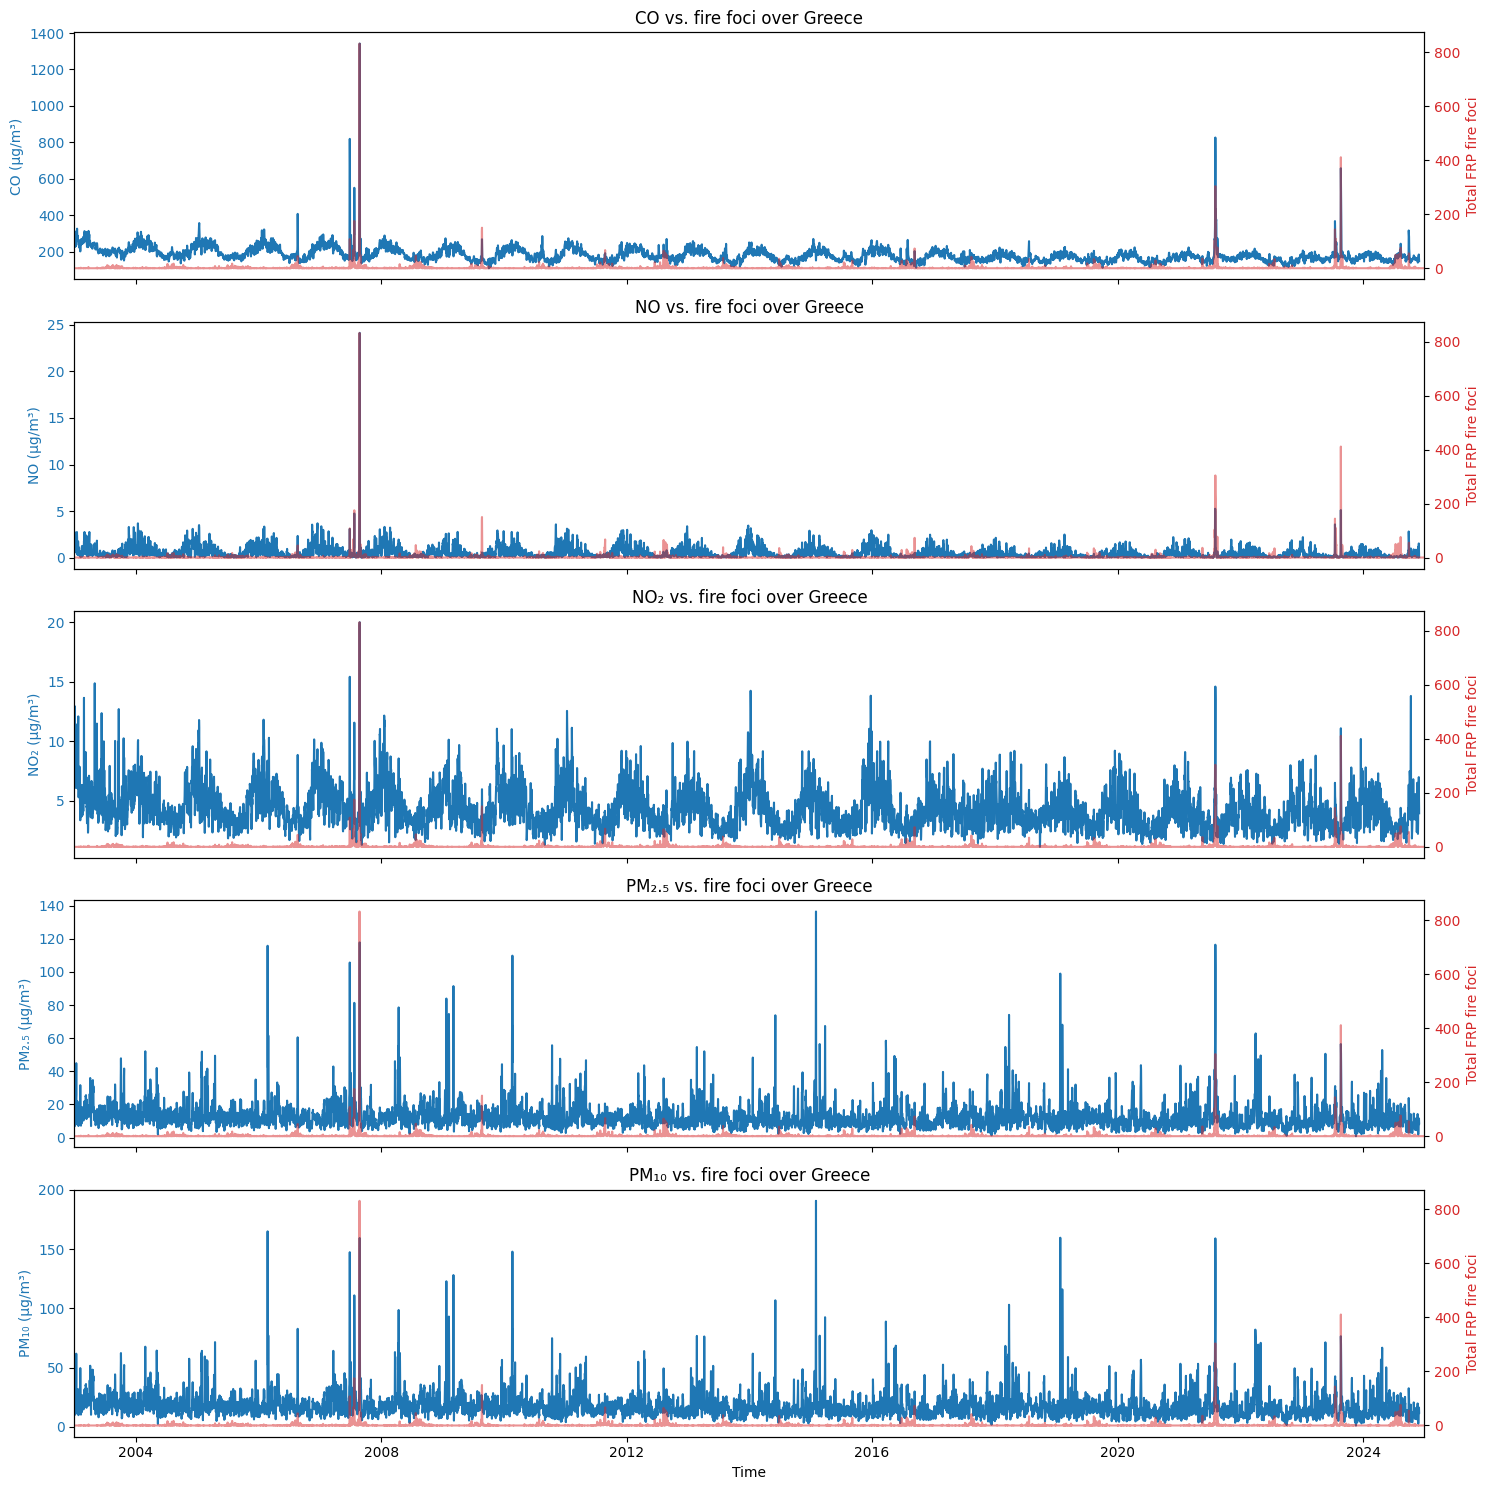

In [16]:
# All Years - Greece

import xarray as xr
import matplotlib.pyplot as plt

# File paths for each pollutant
files = {
    'CO':     r"D:\IPMA\CAMS\co_fire_Greece.nc",
    'NO':     r"D:\IPMA\CAMS\no_fire_Greece.nc",
    'NO₂':    r"D:\IPMA\CAMS\no2_fire_Greece.nc",
    'PM₂.₅':  r"D:\IPMA\CAMS\pm2p5_fire_Greece.nc",
    'PM₁₀':   r"D:\IPMA\CAMS\pm10_fire_Greece.nc"
}

# Correct units for plotting
units = {
    'CO': 'µg/m³',
    'NO': 'µg/m³',
    'NO₂': 'µg/m³',
    'PM₂.₅': 'µg/m³',
    'PM₁₀': 'µg/m³'
}

# Set up figure
fig, axs = plt.subplots(len(files), 1, figsize=(15, 3 * len(files)), sharex=True)

for ax, (pollutant_name, file_path) in zip(axs, files.items()):
    # Load dataset
    ds = xr.open_dataset(file_path)

    # Extract time range
    time = ds.time
    tmin = time.min().values
    tmax = time.max().values

    # Spatial average of pollutant concentration
    pollutant = ds['Mean'].mean(dim=['latitude', 'longitude'])

    # Convert CO mg/m³ → µg/m³
    if pollutant_name == 'CO':
        pollutant = pollutant * 1000

    # Daily total count FRP over Greece
    frp = ds['frp_count_Greece'].sum(dim=['latitude', 'longitude'])

    # Plot pollutant mean
    ax.plot(time, pollutant, label=f'{pollutant_name} Mean ({units[pollutant_name]})', color='tab:blue')
    ax.set_ylabel(f'{pollutant_name} ({units[pollutant_name]})', color='tab:blue')
    ax.tick_params(axis='y', labelcolor='tab:blue')
    ax.grid(False)

    # Plot FRP on twin y-axis
    ax2 = ax.twinx()
    ax2.plot(time, frp, label='FRP', color='tab:red', alpha=0.5)
    ax2.set_ylabel('Total FRP fire foci', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    # Set x-axis limits
    ax.set_xlim([tmin, tmax])

    # Title
    ax.set_title(f'{pollutant_name} vs. fire foci over Greece')

# Global X label
axs[-1].set_xlabel('Time')
plt.tight_layout()
plt.show()


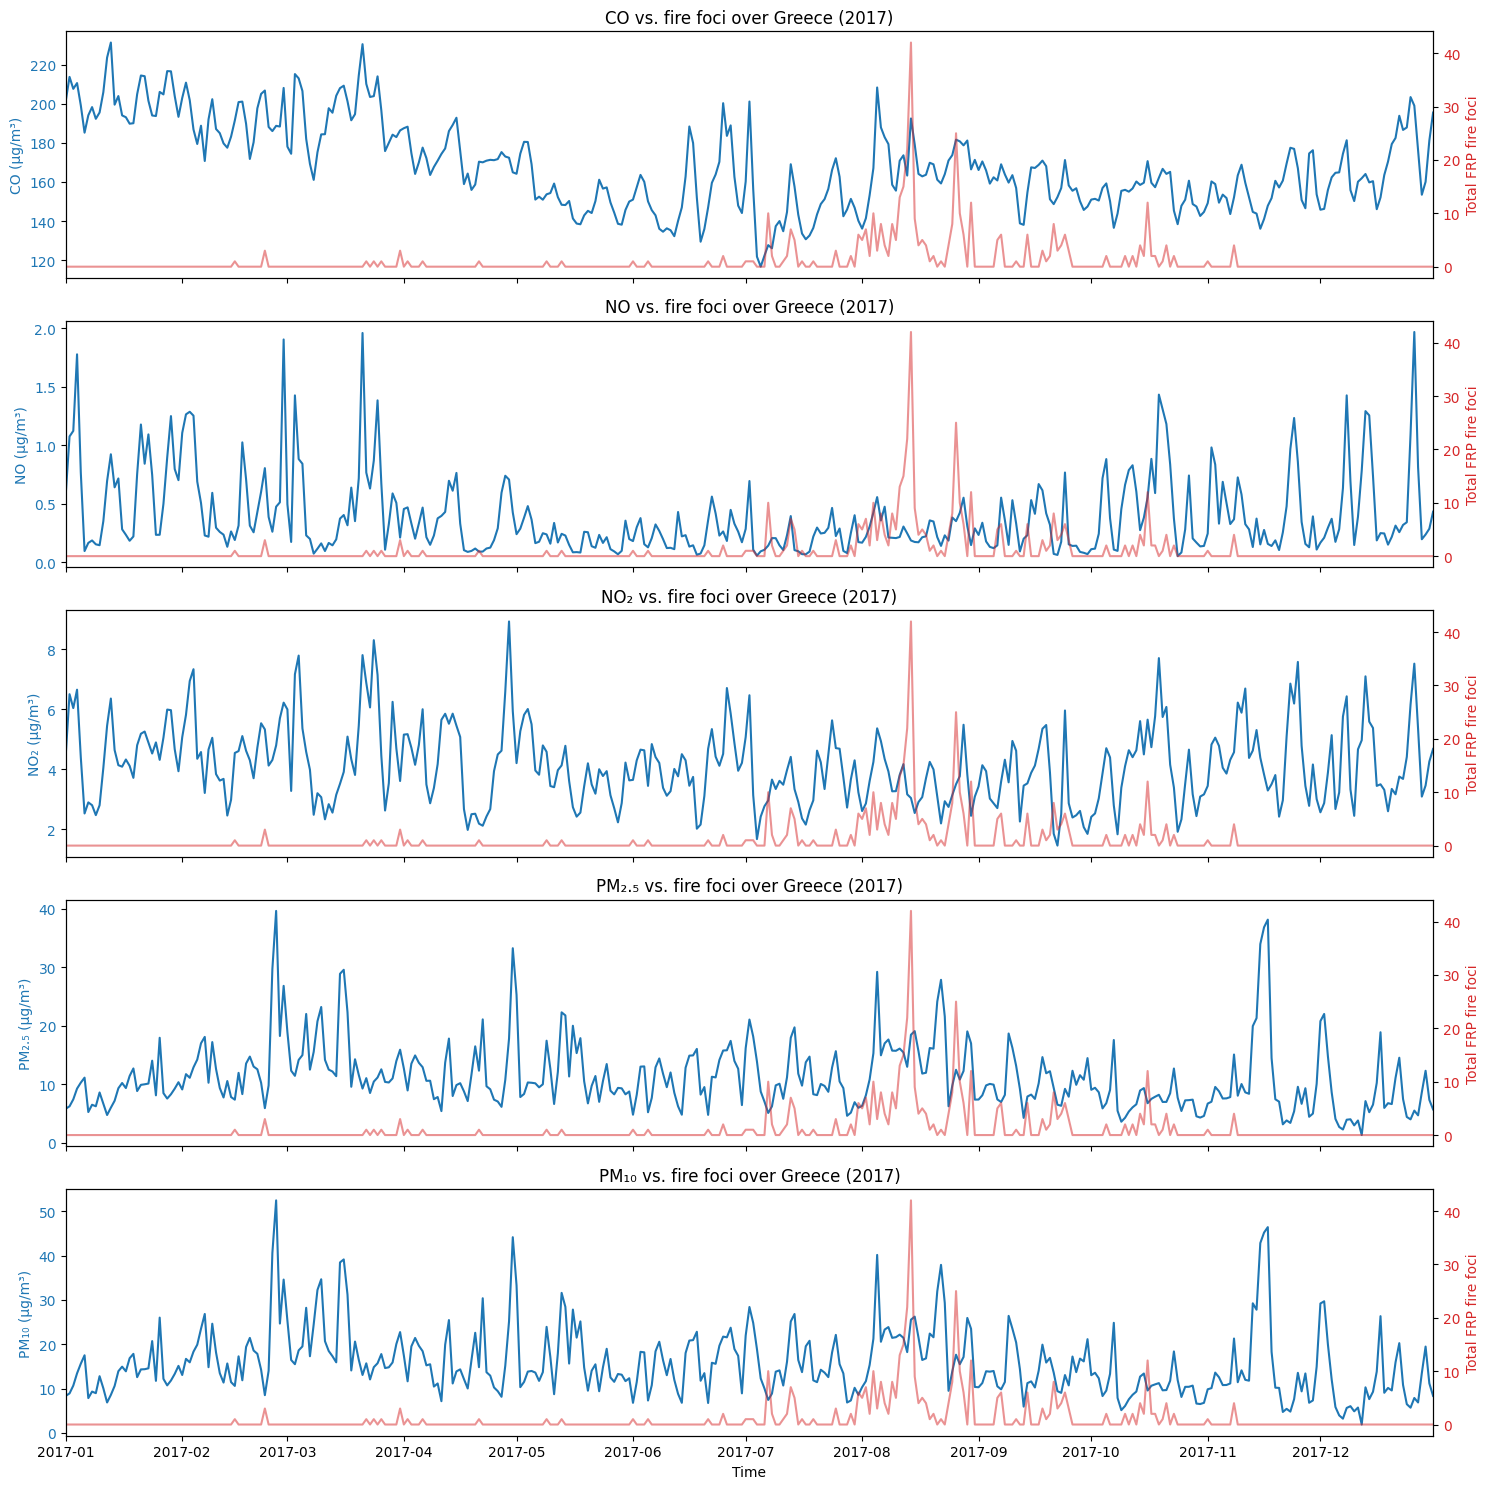

In [17]:
# Certain Year - Greece

import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd

# Set this to a specific year (e.g., 2017), or to None to plot all years
selected_year = 2017

# File paths for each pollutant
files = {
    'CO':     r"D:\IPMA\CAMS\co_fire_Greece.nc",
    'NO':     r"D:\IPMA\CAMS\no_fire_Greece.nc",
    'NO₂':    r"D:\IPMA\CAMS\no2_fire_Greece.nc",
    'PM₂.₅':  r"D:\IPMA\CAMS\pm2p5_fire_Greece.nc",
    'PM₁₀':   r"D:\IPMA\CAMS\pm10_fire_Greece.nc"
}

# Units for each pollutant
pollutant_units = {
    'CO': 'µg/m³',
    'NO': 'µg/m³',
    'NO₂': 'µg/m³',
    'PM₂.₅': 'µg/m³',
    'PM₁₀': 'µg/m³'
}

# Set up figure
fig, axs = plt.subplots(len(files), 1, figsize=(15, 3 * len(files)), sharex=True)

for ax, (pollutant_name, file_path) in zip(axs, files.items()):
    # Load dataset
    ds = xr.open_dataset(file_path)

    # Subset by year if specified
    if selected_year is not None:
        # Ensure time is a datetime64
        ds['time'] = pd.to_datetime(ds['time'].values)
        ds = ds.sel(time=ds['time'].dt.year == selected_year)

    # Extract time and limits
    time = ds.time
    if len(time) == 0:
        ax.set_title(f'{pollutant_name} vs. FRP – No data for year {selected_year}')
        continue

    tmin = time.min().values
    tmax = time.max().values

    # Spatial average of pollutant concentration
    pollutant = ds['Mean'].mean(dim=['latitude', 'longitude'])

    # Convert CO mg/m³ → µg/m³
    if pollutant_name == 'CO':
        pollutant = pollutant * 1000

    # Daily total count FRP over greece
    frp = ds['frp_count_Greece'].sum(dim=['latitude', 'longitude'])

    # Get units
    unit = pollutant_units[pollutant_name]

    # Plot pollutant mean
    ax.plot(time, pollutant, label=f'{pollutant_name} Mean ({unit})', color='tab:blue')
    ax.set_ylabel(f'{pollutant_name} ({unit})', color='tab:blue')
    ax.tick_params(axis='y', labelcolor='tab:blue')
    ax.grid(False)

    # Plot FRP on twin y-axis
    ax2 = ax.twinx()
    ax2.plot(time, frp, label='FRP', color='tab:red', alpha=0.5)
    ax2.set_ylabel('Total FRP fire foci', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    # Set x-axis limits to match time range
    ax.set_xlim([tmin, tmax])

    # Title
    title = f'{pollutant_name} vs. fire foci over Greece'
    if selected_year is not None:
        title += f' ({selected_year})'
    ax.set_title(title)

# Global X label
axs[-1].set_xlabel('Time')
plt.tight_layout()
plt.show()


Air pollutants levels on days with different labels

C:\Users\sofia\AppData\Local\Temp\ipykernel_9944\1819028569.py:37: RuntimeWarning: invalid value encountered in cast
  labels = ds['fire_label_Portugal'].values.flatten().astype(int)
C:\Users\sofia\AppData\Local\Temp\ipykernel_9944\1819028569.py:37: RuntimeWarning: invalid value encountered in cast
  labels = ds['fire_label_Portugal'].values.flatten().astype(int)
C:\Users\sofia\AppData\Local\Temp\ipykernel_9944\1819028569.py:37: RuntimeWarning: invalid value encountered in cast
  labels = ds['fire_label_Portugal'].values.flatten().astype(int)
C:\Users\sofia\AppData\Local\Temp\ipykernel_9944\1819028569.py:37: RuntimeWarning: invalid value encountered in cast
  labels = ds['fire_label_Portugal'].values.flatten().astype(int)
C:\Users\sofia\AppData\Local\Temp\ipykernel_9944\1819028569.py:37: RuntimeWarning: invalid value encountered in cast
  labels = ds['fire_label_Portugal'].values.flatten().astype(int)


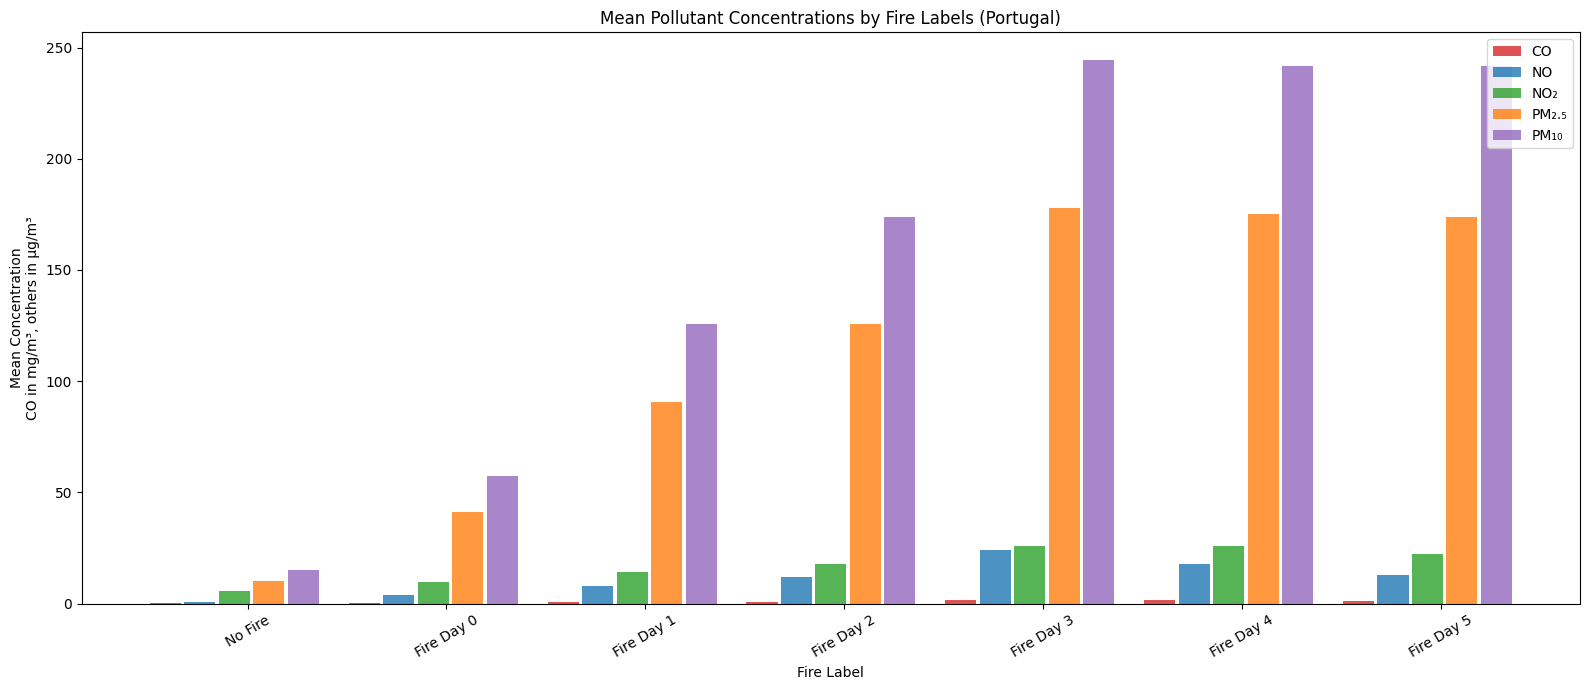

In [18]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

# File paths
files = {
    'CO':     r"D:\IPMA\CAMS\co_fire_Portugal.nc",       
    'NO':     r"D:\IPMA\CAMS\no_fire_Portugal.nc",       
    'NO₂':    r"D:\IPMA\CAMS\no2_fire_Portugal.nc",      
    'PM₂.₅':  r"D:\IPMA\CAMS\pm2p5_fire_Portugal.nc",    
    'PM₁₀':   r"D:\IPMA\CAMS\pm10_fire_Portugal.nc"      
}

# Fire labels
label_map = {
    0: "No Fire",
    1: "Fire Day 0",
    2: "Fire Day 1",
    3: "Fire Day 2",
    4: "Fire Day 3",
    5: "Fire Day 4",
    6: "Fire Day 5"
}
label_values = list(label_map.keys())
ordered_labels = list(label_map.values())

pollutants = list(files.keys())
n_labels = len(label_values)
n_pollutants = len(pollutants)

# Prepare mean data for each pollutant and label
means_by_pollutant_label = {p: [] for p in pollutants}

for pollutant_name, file_path in files.items():
    ds = xr.open_dataset(file_path)
    conc = ds['Mean'].transpose('time', 'latitude', 'longitude').values.flatten()
    labels = ds['fire_label_Portugal'].values.flatten().astype(int)

    valid = ~np.isnan(conc) & ~np.isnan(labels)
    conc = conc[valid]
    labels = labels[valid]

    for lv in label_values:
        data_lv = conc[labels == lv]
        mean_val = np.nan if len(data_lv) == 0 else np.nanmean(data_lv)
        means_by_pollutant_label[pollutant_name].append(mean_val)

# Convert means to array for easier plotting
mean_matrix = np.array([means_by_pollutant_label[p] for p in pollutants])  # shape (pollutants, labels)

# Colorblind-friendly colors for pollutants
pollutant_colors = {
    'CO': 'tab:red',
    'NO': 'tab:blue',
    'NO₂': 'tab:green',
    'PM₂.₅': 'tab:orange',
    'PM₁₀': 'tab:purple'
}

# Plot grouped bar chart
fig, ax = plt.subplots(figsize=(16, 7))
bar_width = 0.13
group_width = n_pollutants * bar_width + 0.1

# x-ticks positions for bar groups
xticks_pos = [i * group_width + (group_width - bar_width)/2 for i in range(n_labels)]

# Plot bars
for j, pollutant_name in enumerate(pollutants):
    pos = [i * group_width + j * bar_width for i in range(n_labels)]
    color = pollutant_colors[pollutant_name]
    ax.bar(pos, mean_matrix[j], width=bar_width*0.9, label=pollutant_name, color=color, alpha=0.8)

# Labels and title
ax.set_xticks(xticks_pos)
ax.set_xticklabels(ordered_labels, rotation=30)
ax.set_ylabel("Mean Concentration\nCO in mg/m³, others in µg/m³")
ax.set_xlabel("Fire Label")
ax.set_title("Mean Pollutant Concentrations by Fire Labels (Portugal)")

# Legend
ax.legend(loc='upper right')
ax.grid(False)
plt.tight_layout()
plt.show()


C:\Users\sofia\AppData\Local\Temp\ipykernel_9944\675954382.py:42: RuntimeWarning: invalid value encountered in cast
  labels = ds['fire_label_Portugal'].values.flatten().astype(int)
C:\Users\sofia\AppData\Local\Temp\ipykernel_9944\675954382.py:42: RuntimeWarning: invalid value encountered in cast
  labels = ds['fire_label_Portugal'].values.flatten().astype(int)
C:\Users\sofia\AppData\Local\Temp\ipykernel_9944\675954382.py:42: RuntimeWarning: invalid value encountered in cast
  labels = ds['fire_label_Portugal'].values.flatten().astype(int)
C:\Users\sofia\AppData\Local\Temp\ipykernel_9944\675954382.py:42: RuntimeWarning: invalid value encountered in cast
  labels = ds['fire_label_Portugal'].values.flatten().astype(int)
C:\Users\sofia\AppData\Local\Temp\ipykernel_9944\675954382.py:42: RuntimeWarning: invalid value encountered in cast
  labels = ds['fire_label_Portugal'].values.flatten().astype(int)


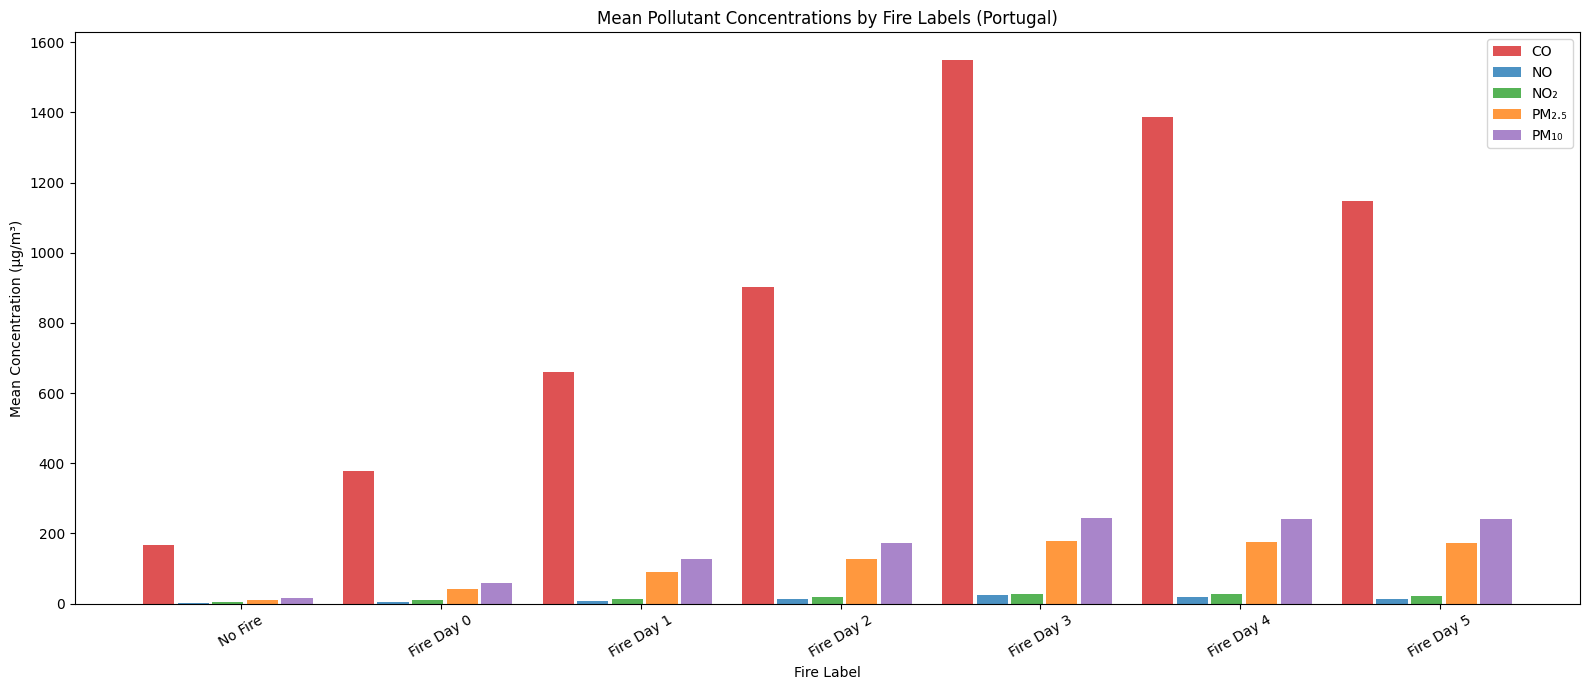

In [19]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

# File paths
files = {
    'CO':     r"D:\IPMA\CAMS\co_fire_Portugal.nc",       
    'NO':     r"D:\IPMA\CAMS\no_fire_Portugal.nc",       
    'NO₂':    r"D:\IPMA\CAMS\no2_fire_Portugal.nc",      
    'PM₂.₅':  r"D:\IPMA\CAMS\pm2p5_fire_Portugal.nc",    
    'PM₁₀':   r"D:\IPMA\CAMS\pm10_fire_Portugal.nc"      
}

# Fire labels
label_map = {
    0: "No Fire",
    1: "Fire Day 0",
    2: "Fire Day 1",
    3: "Fire Day 2",
    4: "Fire Day 3",
    5: "Fire Day 4",
    6: "Fire Day 5"
}
label_values = list(label_map.keys())
ordered_labels = list(label_map.values())

pollutants = list(files.keys())
n_labels = len(label_values)
n_pollutants = len(pollutants)

# Prepare mean data for each pollutant and label
means_by_pollutant_label = {p: [] for p in pollutants}

for pollutant_name, file_path in files.items():
    ds = xr.open_dataset(file_path)
    conc = ds['Mean'].transpose('time', 'latitude', 'longitude').values.flatten()

    # Convert CO from mg/m³ to µg/m³
    if pollutant_name == 'CO':
        conc = conc * 1000
    
    labels = ds['fire_label_Portugal'].values.flatten().astype(int)

    valid = ~np.isnan(conc) & ~np.isnan(labels)
    conc = conc[valid]
    labels = labels[valid]

    for lv in label_values:
        data_lv = conc[labels == lv]
        mean_val = np.nan if len(data_lv) == 0 else np.nanmean(data_lv)
        means_by_pollutant_label[pollutant_name].append(mean_val)

# Convert means to array for easier plotting
mean_matrix = np.array([means_by_pollutant_label[p] for p in pollutants])  # shape (pollutants, labels)

# Colorblind-friendly colors for pollutants
pollutant_colors = {
    'CO': 'tab:red',
    'NO': 'tab:blue',
    'NO₂': 'tab:green',
    'PM₂.₅': 'tab:orange',
    'PM₁₀': 'tab:purple'
}

# Plot grouped bar chart
fig, ax = plt.subplots(figsize=(16, 7))
bar_width = 0.13
group_width = n_pollutants * bar_width + 0.1

# x-ticks positions for bar groups
xticks_pos = [i * group_width + (group_width - bar_width)/2 for i in range(n_labels)]

# Plot bars
for j, pollutant_name in enumerate(pollutants):
    pos = [i * group_width + j * bar_width for i in range(n_labels)]
    color = pollutant_colors[pollutant_name]
    ax.bar(pos, mean_matrix[j], width=bar_width*0.9, label=pollutant_name, color=color, alpha=0.8)

# Labels and title
ax.set_xticks(xticks_pos)
ax.set_xticklabels(ordered_labels, rotation=30)
ax.set_ylabel("Mean Concentration (µg/m³)")
ax.set_xlabel("Fire Label")
ax.set_title("Mean Pollutant Concentrations by Fire Labels (Portugal)")

# Legend
ax.legend(loc='upper right')
ax.grid(False)
plt.tight_layout()
plt.show()


C:\Users\sofia\AppData\Local\Temp\ipykernel_9944\1831396085.py:37: RuntimeWarning: invalid value encountered in cast
  labels = ds['fire_label_Italy'].values.flatten().astype(int)
C:\Users\sofia\AppData\Local\Temp\ipykernel_9944\1831396085.py:37: RuntimeWarning: invalid value encountered in cast
  labels = ds['fire_label_Italy'].values.flatten().astype(int)
C:\Users\sofia\AppData\Local\Temp\ipykernel_9944\1831396085.py:37: RuntimeWarning: invalid value encountered in cast
  labels = ds['fire_label_Italy'].values.flatten().astype(int)
C:\Users\sofia\AppData\Local\Temp\ipykernel_9944\1831396085.py:37: RuntimeWarning: invalid value encountered in cast
  labels = ds['fire_label_Italy'].values.flatten().astype(int)
C:\Users\sofia\AppData\Local\Temp\ipykernel_9944\1831396085.py:37: RuntimeWarning: invalid value encountered in cast
  labels = ds['fire_label_Italy'].values.flatten().astype(int)


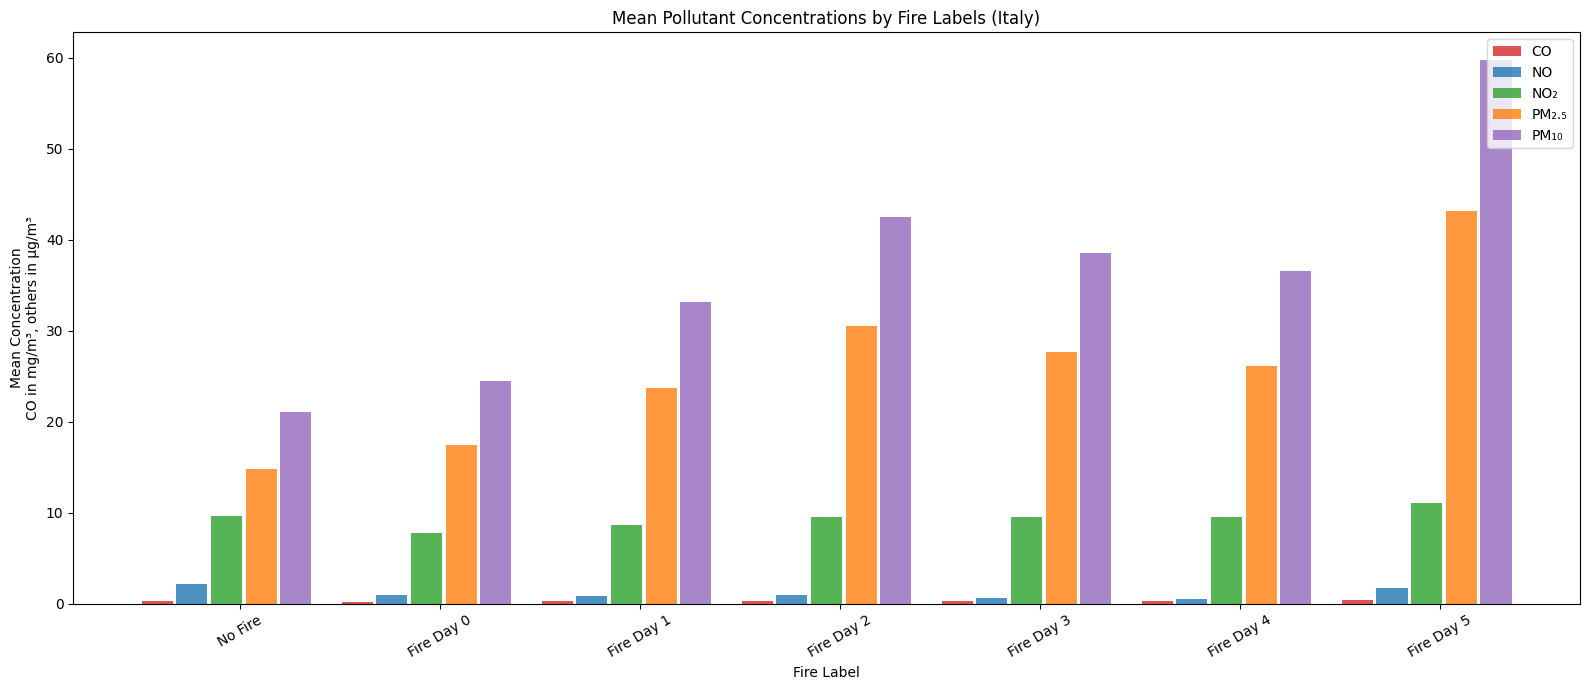

In [20]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

# File paths
files = {
    'CO':     r"D:\IPMA\CAMS\co_fire_Italy.nc",       
    'NO':     r"D:\IPMA\CAMS\no_fire_Italy.nc",       
    'NO₂':    r"D:\IPMA\CAMS\no2_fire_Italy.nc",      
    'PM₂.₅':  r"D:\IPMA\CAMS\pm2p5_fire_Italy.nc",    
    'PM₁₀':   r"D:\IPMA\CAMS\pm10_fire_Italy.nc"      
}

# Fire labels
label_map = {
    0: "No Fire",
    1: "Fire Day 0",
    2: "Fire Day 1",
    3: "Fire Day 2",
    4: "Fire Day 3",
    5: "Fire Day 4",
    6: "Fire Day 5"
}
label_values = list(label_map.keys())
ordered_labels = list(label_map.values())

pollutants = list(files.keys())
n_labels = len(label_values)
n_pollutants = len(pollutants)

# Prepare mean data for each pollutant and label
means_by_pollutant_label = {p: [] for p in pollutants}

for pollutant_name, file_path in files.items():
    ds = xr.open_dataset(file_path)
    conc = ds['Mean'].transpose('time', 'latitude', 'longitude').values.flatten()
    labels = ds['fire_label_Italy'].values.flatten().astype(int)

    valid = ~np.isnan(conc) & ~np.isnan(labels)
    conc = conc[valid]
    labels = labels[valid]

    for lv in label_values:
        data_lv = conc[labels == lv]
        mean_val = np.nan if len(data_lv) == 0 else np.nanmean(data_lv)
        means_by_pollutant_label[pollutant_name].append(mean_val)

# Convert means to array for easier plotting
mean_matrix = np.array([means_by_pollutant_label[p] for p in pollutants])  # shape (pollutants, labels)

# Colorblind-friendly colors for pollutants
pollutant_colors = {
    'CO': 'tab:red',
    'NO': 'tab:blue',
    'NO₂': 'tab:green',
    'PM₂.₅': 'tab:orange',
    'PM₁₀': 'tab:purple'
}

# Plot grouped bar chart
fig, ax = plt.subplots(figsize=(16, 7))
bar_width = 0.13
group_width = n_pollutants * bar_width + 0.1

# x-ticks positions for bar groups
xticks_pos = [i * group_width + (group_width - bar_width)/2 for i in range(n_labels)]

# Plot bars
for j, pollutant_name in enumerate(pollutants):
    pos = [i * group_width + j * bar_width for i in range(n_labels)]
    color = pollutant_colors[pollutant_name]
    ax.bar(pos, mean_matrix[j], width=bar_width*0.9, label=pollutant_name, color=color, alpha=0.8)

# Labels and title
ax.set_xticks(xticks_pos)
ax.set_xticklabels(ordered_labels, rotation=30)
ax.set_ylabel("Mean Concentration\nCO in mg/m³, others in µg/m³")
ax.set_xlabel("Fire Label")
ax.set_title("Mean Pollutant Concentrations by Fire Labels (Italy)")

# Legend
ax.legend(loc='upper right')
ax.grid(False)
plt.tight_layout()
plt.show()


C:\Users\sofia\AppData\Local\Temp\ipykernel_9944\1088933306.py:42: RuntimeWarning: invalid value encountered in cast
  labels = ds['fire_label_Italy'].values.flatten().astype(int)
C:\Users\sofia\AppData\Local\Temp\ipykernel_9944\1088933306.py:42: RuntimeWarning: invalid value encountered in cast
  labels = ds['fire_label_Italy'].values.flatten().astype(int)
C:\Users\sofia\AppData\Local\Temp\ipykernel_9944\1088933306.py:42: RuntimeWarning: invalid value encountered in cast
  labels = ds['fire_label_Italy'].values.flatten().astype(int)
C:\Users\sofia\AppData\Local\Temp\ipykernel_9944\1088933306.py:42: RuntimeWarning: invalid value encountered in cast
  labels = ds['fire_label_Italy'].values.flatten().astype(int)
C:\Users\sofia\AppData\Local\Temp\ipykernel_9944\1088933306.py:42: RuntimeWarning: invalid value encountered in cast
  labels = ds['fire_label_Italy'].values.flatten().astype(int)


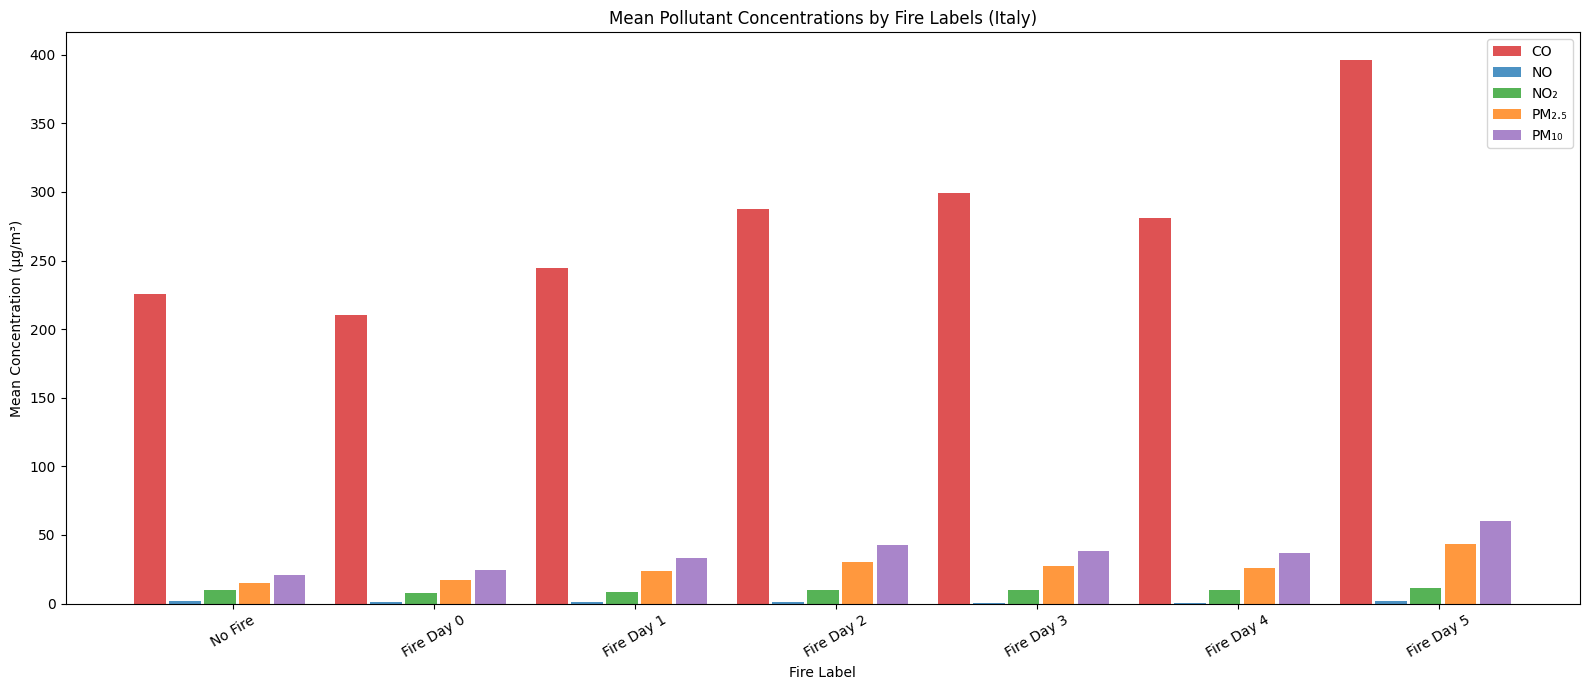

In [21]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

# File paths
files = {
    'CO':     r"D:\IPMA\CAMS\co_fire_Italy.nc",       
    'NO':     r"D:\IPMA\CAMS\no_fire_Italy.nc",       
    'NO₂':    r"D:\IPMA\CAMS\no2_fire_Italy.nc",      
    'PM₂.₅':  r"D:\IPMA\CAMS\pm2p5_fire_Italy.nc",    
    'PM₁₀':   r"D:\IPMA\CAMS\pm10_fire_Italy.nc"      
}

# Fire labels
label_map = {
    0: "No Fire",
    1: "Fire Day 0",
    2: "Fire Day 1",
    3: "Fire Day 2",
    4: "Fire Day 3",
    5: "Fire Day 4",
    6: "Fire Day 5"
}
label_values = list(label_map.keys())
ordered_labels = list(label_map.values())

pollutants = list(files.keys())
n_labels = len(label_values)
n_pollutants = len(pollutants)

# Prepare mean data for each pollutant and label
means_by_pollutant_label = {p: [] for p in pollutants}

for pollutant_name, file_path in files.items():
    ds = xr.open_dataset(file_path)
    conc = ds['Mean'].transpose('time', 'latitude', 'longitude').values.flatten()

    # Convert CO from mg/m³ to µg/m³
    if pollutant_name == 'CO':
        conc = conc * 1000
    
    labels = ds['fire_label_Italy'].values.flatten().astype(int)

    valid = ~np.isnan(conc) & ~np.isnan(labels)
    conc = conc[valid]
    labels = labels[valid]

    for lv in label_values:
        data_lv = conc[labels == lv]
        mean_val = np.nan if len(data_lv) == 0 else np.nanmean(data_lv)
        means_by_pollutant_label[pollutant_name].append(mean_val)

# Convert means to array for easier plotting
mean_matrix = np.array([means_by_pollutant_label[p] for p in pollutants])  # shape (pollutants, labels)

# Colorblind-friendly colors for pollutants
pollutant_colors = {
    'CO': 'tab:red',
    'NO': 'tab:blue',
    'NO₂': 'tab:green',
    'PM₂.₅': 'tab:orange',
    'PM₁₀': 'tab:purple'
}

# Plot grouped bar chart
fig, ax = plt.subplots(figsize=(16, 7))
bar_width = 0.13
group_width = n_pollutants * bar_width + 0.1

# x-ticks positions for bar groups
xticks_pos = [i * group_width + (group_width - bar_width)/2 for i in range(n_labels)]

# Plot bars
for j, pollutant_name in enumerate(pollutants):
    pos = [i * group_width + j * bar_width for i in range(n_labels)]
    color = pollutant_colors[pollutant_name]
    ax.bar(pos, mean_matrix[j], width=bar_width*0.9, label=pollutant_name, color=color, alpha=0.8)

# Labels and title
ax.set_xticks(xticks_pos)
ax.set_xticklabels(ordered_labels, rotation=30)
ax.set_ylabel("Mean Concentration (µg/m³)")
ax.set_xlabel("Fire Label")
ax.set_title("Mean Pollutant Concentrations by Fire Labels (Italy)")

# Legend
ax.legend(loc='upper right')
ax.grid(False)
plt.tight_layout()
plt.show()


C:\Users\sofia\AppData\Local\Temp\ipykernel_9944\3281537688.py:37: RuntimeWarning: invalid value encountered in cast
  labels = ds['fire_label_Spain'].values.flatten().astype(int)
C:\Users\sofia\AppData\Local\Temp\ipykernel_9944\3281537688.py:37: RuntimeWarning: invalid value encountered in cast
  labels = ds['fire_label_Spain'].values.flatten().astype(int)
C:\Users\sofia\AppData\Local\Temp\ipykernel_9944\3281537688.py:37: RuntimeWarning: invalid value encountered in cast
  labels = ds['fire_label_Spain'].values.flatten().astype(int)
C:\Users\sofia\AppData\Local\Temp\ipykernel_9944\3281537688.py:37: RuntimeWarning: invalid value encountered in cast
  labels = ds['fire_label_Spain'].values.flatten().astype(int)
C:\Users\sofia\AppData\Local\Temp\ipykernel_9944\3281537688.py:37: RuntimeWarning: invalid value encountered in cast
  labels = ds['fire_label_Spain'].values.flatten().astype(int)


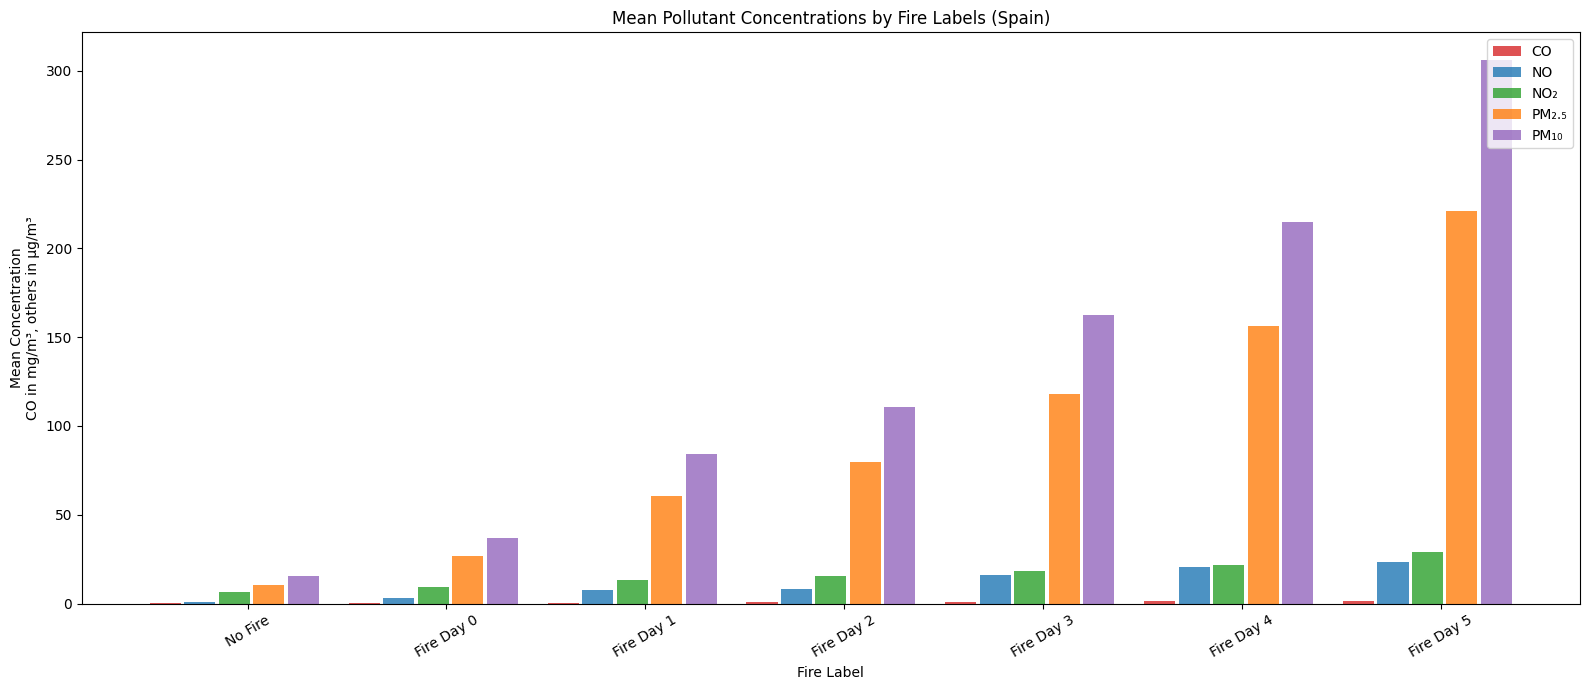

In [22]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

# File paths
files = {
    'CO':     r"D:\IPMA\CAMS\co_fire_Spain.nc",       
    'NO':     r"D:\IPMA\CAMS\no_fire_Spain.nc",       
    'NO₂':    r"D:\IPMA\CAMS\no2_fire_Spain.nc",      
    'PM₂.₅':  r"D:\IPMA\CAMS\pm2p5_fire_Spain.nc",    
    'PM₁₀':   r"D:\IPMA\CAMS\pm10_fire_Spain.nc"      
}

# Fire labels
label_map = {
    0: "No Fire",
    1: "Fire Day 0",
    2: "Fire Day 1",
    3: "Fire Day 2",
    4: "Fire Day 3",
    5: "Fire Day 4",
    6: "Fire Day 5"
}
label_values = list(label_map.keys())
ordered_labels = list(label_map.values())

pollutants = list(files.keys())
n_labels = len(label_values)
n_pollutants = len(pollutants)

# Prepare mean data for each pollutant and label
means_by_pollutant_label = {p: [] for p in pollutants}

for pollutant_name, file_path in files.items():
    ds = xr.open_dataset(file_path)
    conc = ds['Mean'].transpose('time', 'latitude', 'longitude').values.flatten()
    labels = ds['fire_label_Spain'].values.flatten().astype(int)

    valid = ~np.isnan(conc) & ~np.isnan(labels)
    conc = conc[valid]
    labels = labels[valid]

    for lv in label_values:
        data_lv = conc[labels == lv]
        mean_val = np.nan if len(data_lv) == 0 else np.nanmean(data_lv)
        means_by_pollutant_label[pollutant_name].append(mean_val)

# Convert means to array for easier plotting
mean_matrix = np.array([means_by_pollutant_label[p] for p in pollutants])  # shape (pollutants, labels)

# Colorblind-friendly colors for pollutants
pollutant_colors = {
    'CO': 'tab:red',
    'NO': 'tab:blue',
    'NO₂': 'tab:green',
    'PM₂.₅': 'tab:orange',
    'PM₁₀': 'tab:purple'
}

# Plot grouped bar chart
fig, ax = plt.subplots(figsize=(16, 7))
bar_width = 0.13
group_width = n_pollutants * bar_width + 0.1

# x-ticks positions for bar groups
xticks_pos = [i * group_width + (group_width - bar_width)/2 for i in range(n_labels)]

# Plot bars
for j, pollutant_name in enumerate(pollutants):
    pos = [i * group_width + j * bar_width for i in range(n_labels)]
    color = pollutant_colors[pollutant_name]
    ax.bar(pos, mean_matrix[j], width=bar_width*0.9, label=pollutant_name, color=color, alpha=0.8)

# Labels and title
ax.set_xticks(xticks_pos)
ax.set_xticklabels(ordered_labels, rotation=30)
ax.set_ylabel("Mean Concentration\nCO in mg/m³, others in µg/m³")
ax.set_xlabel("Fire Label")
ax.set_title("Mean Pollutant Concentrations by Fire Labels (Spain)")

# Legend
ax.legend(loc='upper right')
ax.grid(False)
plt.tight_layout()
plt.show()


C:\Users\sofia\AppData\Local\Temp\ipykernel_9944\2148445066.py:42: RuntimeWarning: invalid value encountered in cast
  labels = ds['fire_label_Spain'].values.flatten().astype(int)
C:\Users\sofia\AppData\Local\Temp\ipykernel_9944\2148445066.py:42: RuntimeWarning: invalid value encountered in cast
  labels = ds['fire_label_Spain'].values.flatten().astype(int)
C:\Users\sofia\AppData\Local\Temp\ipykernel_9944\2148445066.py:42: RuntimeWarning: invalid value encountered in cast
  labels = ds['fire_label_Spain'].values.flatten().astype(int)
C:\Users\sofia\AppData\Local\Temp\ipykernel_9944\2148445066.py:42: RuntimeWarning: invalid value encountered in cast
  labels = ds['fire_label_Spain'].values.flatten().astype(int)
C:\Users\sofia\AppData\Local\Temp\ipykernel_9944\2148445066.py:42: RuntimeWarning: invalid value encountered in cast
  labels = ds['fire_label_Spain'].values.flatten().astype(int)


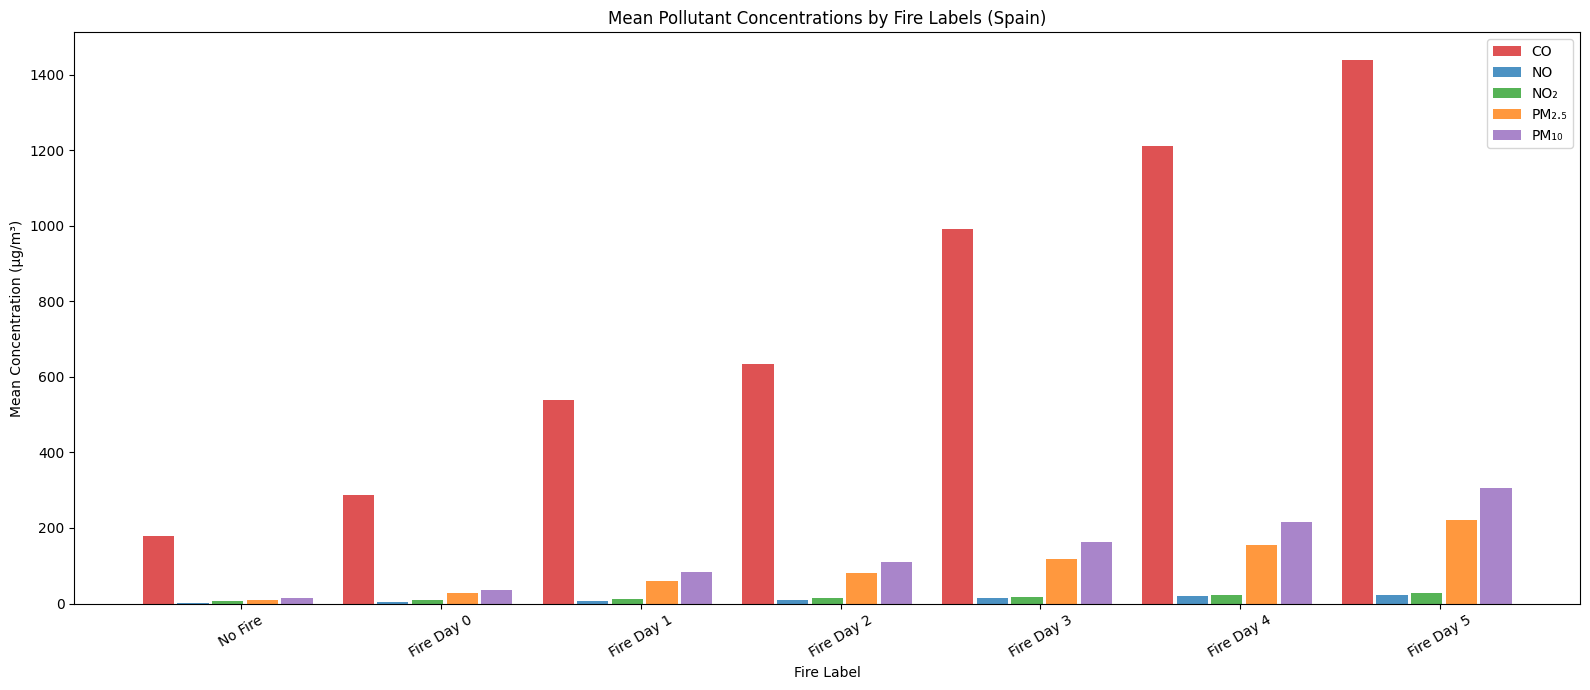

In [23]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

# File paths
files = {
    'CO':     r"D:\IPMA\CAMS\co_fire_Spain.nc",       
    'NO':     r"D:\IPMA\CAMS\no_fire_Spain.nc",       
    'NO₂':    r"D:\IPMA\CAMS\no2_fire_Spain.nc",      
    'PM₂.₅':  r"D:\IPMA\CAMS\pm2p5_fire_Spain.nc",    
    'PM₁₀':   r"D:\IPMA\CAMS\pm10_fire_Spain.nc"      
}

# Fire labels
label_map = {
    0: "No Fire",
    1: "Fire Day 0",
    2: "Fire Day 1",
    3: "Fire Day 2",
    4: "Fire Day 3",
    5: "Fire Day 4",
    6: "Fire Day 5"
}
label_values = list(label_map.keys())
ordered_labels = list(label_map.values())

pollutants = list(files.keys())
n_labels = len(label_values)
n_pollutants = len(pollutants)

# Prepare mean data for each pollutant and label
means_by_pollutant_label = {p: [] for p in pollutants}

for pollutant_name, file_path in files.items():
    ds = xr.open_dataset(file_path)
    conc = ds['Mean'].transpose('time', 'latitude', 'longitude').values.flatten()

    # Convert CO from mg/m³ to µg/m³
    if pollutant_name == 'CO':
        conc = conc * 1000
    
    labels = ds['fire_label_Spain'].values.flatten().astype(int)

    valid = ~np.isnan(conc) & ~np.isnan(labels)
    conc = conc[valid]
    labels = labels[valid]

    for lv in label_values:
        data_lv = conc[labels == lv]
        mean_val = np.nan if len(data_lv) == 0 else np.nanmean(data_lv)
        means_by_pollutant_label[pollutant_name].append(mean_val)

# Convert means to array for easier plotting
mean_matrix = np.array([means_by_pollutant_label[p] for p in pollutants])  # shape (pollutants, labels)

# Colorblind-friendly colors for pollutants
pollutant_colors = {
    'CO': 'tab:red',
    'NO': 'tab:blue',
    'NO₂': 'tab:green',
    'PM₂.₅': 'tab:orange',
    'PM₁₀': 'tab:purple'
}

# Plot grouped bar chart
fig, ax = plt.subplots(figsize=(16, 7))
bar_width = 0.13
group_width = n_pollutants * bar_width + 0.1

# x-ticks positions for bar groups
xticks_pos = [i * group_width + (group_width - bar_width)/2 for i in range(n_labels)]

# Plot bars
for j, pollutant_name in enumerate(pollutants):
    pos = [i * group_width + j * bar_width for i in range(n_labels)]
    color = pollutant_colors[pollutant_name]
    ax.bar(pos, mean_matrix[j], width=bar_width*0.9, label=pollutant_name, color=color, alpha=0.8)

# Labels and title
ax.set_xticks(xticks_pos)
ax.set_xticklabels(ordered_labels, rotation=30)
ax.set_ylabel("Mean Concentration (µg/m³)")
ax.set_xlabel("Fire Label")
ax.set_title("Mean Pollutant Concentrations by Fire Labels (Spain)")

# Legend
ax.legend(loc='upper right')
ax.grid(False)
plt.tight_layout()
plt.show()


C:\Users\sofia\AppData\Local\Temp\ipykernel_9944\2419214897.py:37: RuntimeWarning: invalid value encountered in cast
  labels = ds['fire_label_Greece'].values.flatten().astype(int)
C:\Users\sofia\AppData\Local\Temp\ipykernel_9944\2419214897.py:37: RuntimeWarning: invalid value encountered in cast
  labels = ds['fire_label_Greece'].values.flatten().astype(int)
C:\Users\sofia\AppData\Local\Temp\ipykernel_9944\2419214897.py:37: RuntimeWarning: invalid value encountered in cast
  labels = ds['fire_label_Greece'].values.flatten().astype(int)
C:\Users\sofia\AppData\Local\Temp\ipykernel_9944\2419214897.py:37: RuntimeWarning: invalid value encountered in cast
  labels = ds['fire_label_Greece'].values.flatten().astype(int)
C:\Users\sofia\AppData\Local\Temp\ipykernel_9944\2419214897.py:37: RuntimeWarning: invalid value encountered in cast
  labels = ds['fire_label_Greece'].values.flatten().astype(int)


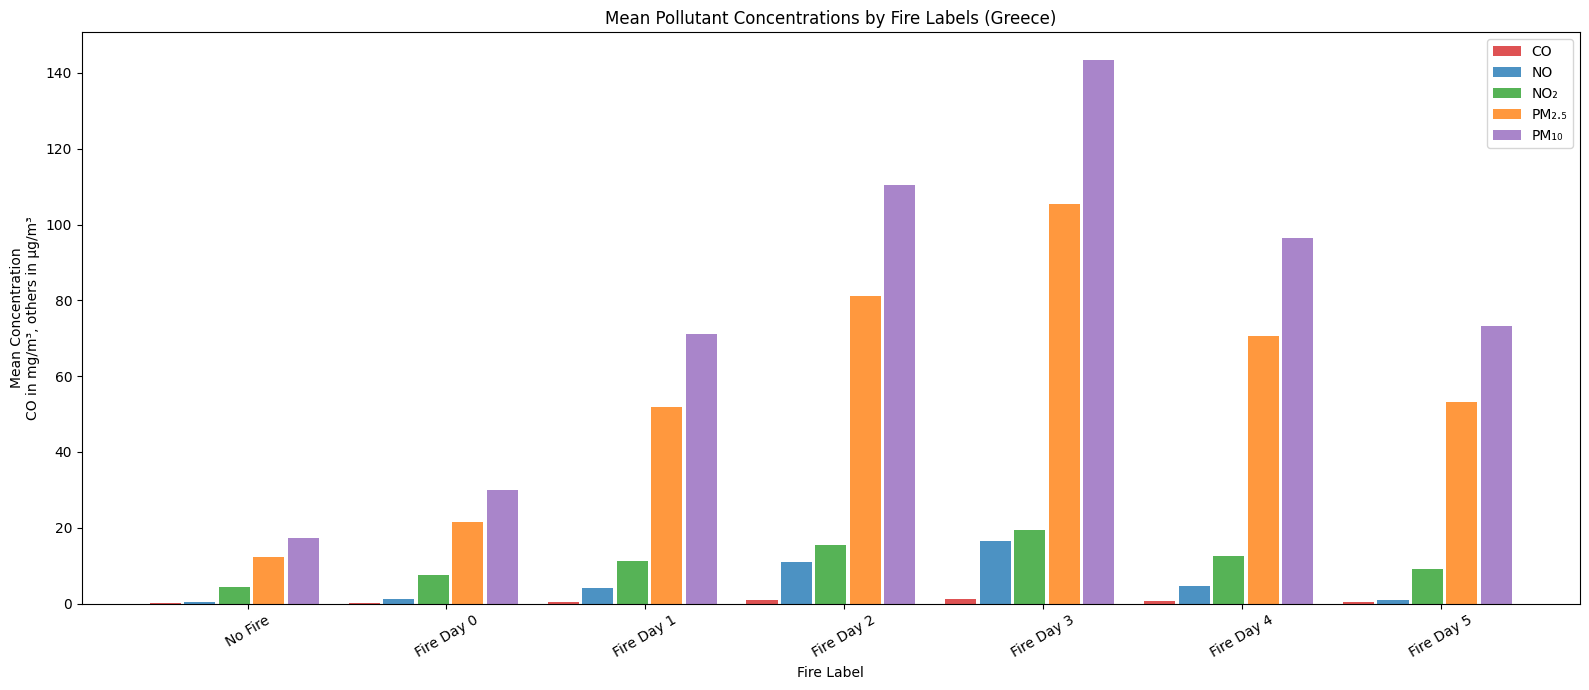

In [24]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

# File paths
files = {
    'CO':     r"D:\IPMA\CAMS\co_fire_Greece.nc",       
    'NO':     r"D:\IPMA\CAMS\no_fire_Greece.nc",       
    'NO₂':    r"D:\IPMA\CAMS\no2_fire_Greece.nc",      
    'PM₂.₅':  r"D:\IPMA\CAMS\pm2p5_fire_Greece.nc",    
    'PM₁₀':   r"D:\IPMA\CAMS\pm10_fire_Greece.nc"      
}

# Fire labels
label_map = {
    0: "No Fire",
    1: "Fire Day 0",
    2: "Fire Day 1",
    3: "Fire Day 2",
    4: "Fire Day 3",
    5: "Fire Day 4",
    6: "Fire Day 5"
}
label_values = list(label_map.keys())
ordered_labels = list(label_map.values())

pollutants = list(files.keys())
n_labels = len(label_values)
n_pollutants = len(pollutants)

# Prepare mean data for each pollutant and label
means_by_pollutant_label = {p: [] for p in pollutants}

for pollutant_name, file_path in files.items():
    ds = xr.open_dataset(file_path)
    conc = ds['Mean'].transpose('time', 'latitude', 'longitude').values.flatten()
    labels = ds['fire_label_Greece'].values.flatten().astype(int)

    valid = ~np.isnan(conc) & ~np.isnan(labels)
    conc = conc[valid]
    labels = labels[valid]

    for lv in label_values:
        data_lv = conc[labels == lv]
        mean_val = np.nan if len(data_lv) == 0 else np.nanmean(data_lv)
        means_by_pollutant_label[pollutant_name].append(mean_val)

# Convert means to array for easier plotting
mean_matrix = np.array([means_by_pollutant_label[p] for p in pollutants])  # shape (pollutants, labels)

# Colorblind-friendly colors for pollutants
pollutant_colors = {
    'CO': 'tab:red',
    'NO': 'tab:blue',
    'NO₂': 'tab:green',
    'PM₂.₅': 'tab:orange',
    'PM₁₀': 'tab:purple'
}

# Plot grouped bar chart
fig, ax = plt.subplots(figsize=(16, 7))
bar_width = 0.13
group_width = n_pollutants * bar_width + 0.1

# x-ticks positions for bar groups
xticks_pos = [i * group_width + (group_width - bar_width)/2 for i in range(n_labels)]

# Plot bars
for j, pollutant_name in enumerate(pollutants):
    pos = [i * group_width + j * bar_width for i in range(n_labels)]
    color = pollutant_colors[pollutant_name]
    ax.bar(pos, mean_matrix[j], width=bar_width*0.9, label=pollutant_name, color=color, alpha=0.8)

# Labels and title
ax.set_xticks(xticks_pos)
ax.set_xticklabels(ordered_labels, rotation=30)
ax.set_ylabel("Mean Concentration\nCO in mg/m³, others in µg/m³")
ax.set_xlabel("Fire Label")
ax.set_title("Mean Pollutant Concentrations by Fire Labels (Greece)")

# Legend
ax.legend(loc='upper right')
ax.grid(False)
plt.tight_layout()
plt.show()


C:\Users\sofia\AppData\Local\Temp\ipykernel_9944\499039183.py:42: RuntimeWarning: invalid value encountered in cast
  labels = ds['fire_label_Greece'].values.flatten().astype(int)
C:\Users\sofia\AppData\Local\Temp\ipykernel_9944\499039183.py:42: RuntimeWarning: invalid value encountered in cast
  labels = ds['fire_label_Greece'].values.flatten().astype(int)
C:\Users\sofia\AppData\Local\Temp\ipykernel_9944\499039183.py:42: RuntimeWarning: invalid value encountered in cast
  labels = ds['fire_label_Greece'].values.flatten().astype(int)
C:\Users\sofia\AppData\Local\Temp\ipykernel_9944\499039183.py:42: RuntimeWarning: invalid value encountered in cast
  labels = ds['fire_label_Greece'].values.flatten().astype(int)
C:\Users\sofia\AppData\Local\Temp\ipykernel_9944\499039183.py:42: RuntimeWarning: invalid value encountered in cast
  labels = ds['fire_label_Greece'].values.flatten().astype(int)


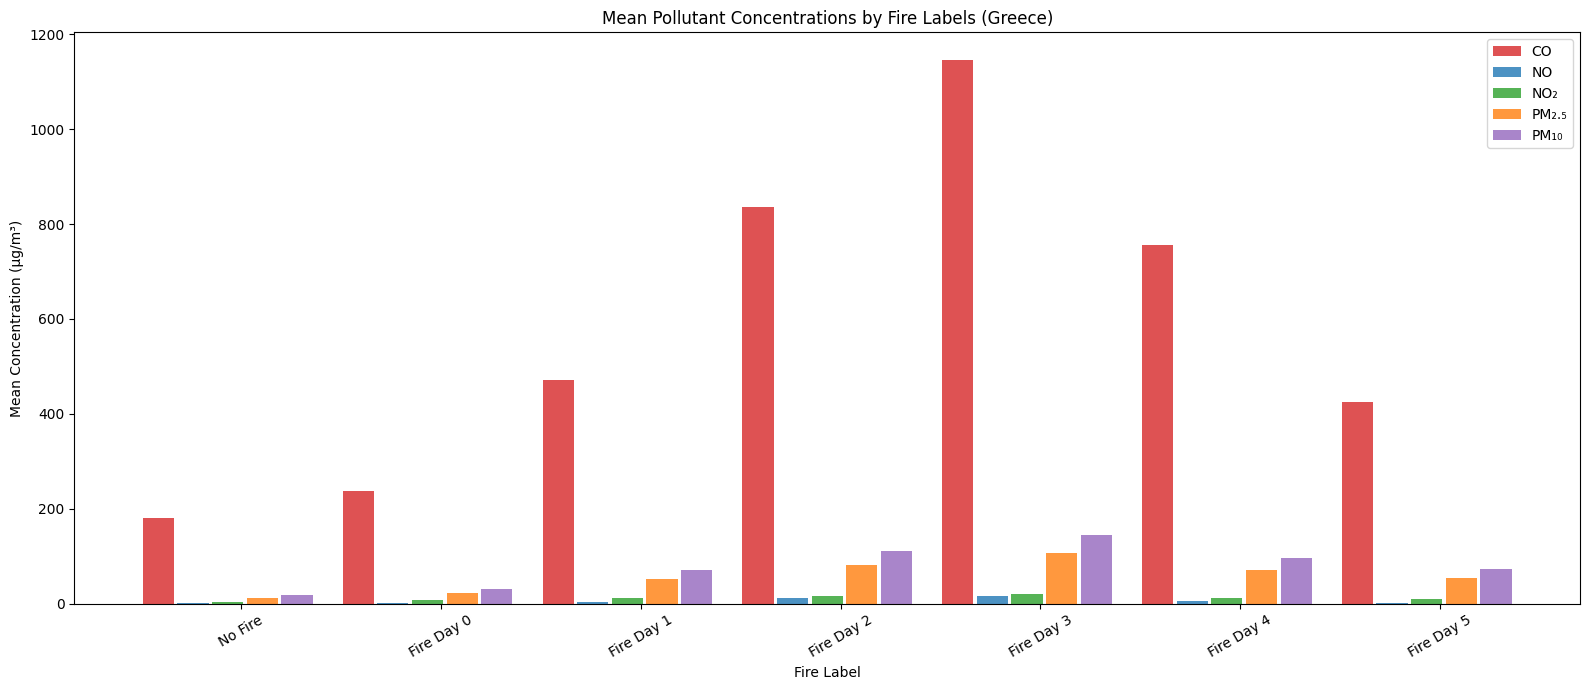

In [25]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

# File paths
files = {
    'CO':     r"D:\IPMA\CAMS\co_fire_Greece.nc",       
    'NO':     r"D:\IPMA\CAMS\no_fire_Greece.nc",       
    'NO₂':    r"D:\IPMA\CAMS\no2_fire_Greece.nc",      
    'PM₂.₅':  r"D:\IPMA\CAMS\pm2p5_fire_Greece.nc",    
    'PM₁₀':   r"D:\IPMA\CAMS\pm10_fire_Greece.nc"      
}

# Fire labels
label_map = {
    0: "No Fire",
    1: "Fire Day 0",
    2: "Fire Day 1",
    3: "Fire Day 2",
    4: "Fire Day 3",
    5: "Fire Day 4",
    6: "Fire Day 5"
}
label_values = list(label_map.keys())
ordered_labels = list(label_map.values())

pollutants = list(files.keys())
n_labels = len(label_values)
n_pollutants = len(pollutants)

# Prepare mean data for each pollutant and label
means_by_pollutant_label = {p: [] for p in pollutants}

for pollutant_name, file_path in files.items():
    ds = xr.open_dataset(file_path)
    conc = ds['Mean'].transpose('time', 'latitude', 'longitude').values.flatten()

    # Convert CO from mg/m³ to µg/m³
    if pollutant_name == 'CO':
        conc = conc * 1000
    
    labels = ds['fire_label_Greece'].values.flatten().astype(int)

    valid = ~np.isnan(conc) & ~np.isnan(labels)
    conc = conc[valid]
    labels = labels[valid]

    for lv in label_values:
        data_lv = conc[labels == lv]
        mean_val = np.nan if len(data_lv) == 0 else np.nanmean(data_lv)
        means_by_pollutant_label[pollutant_name].append(mean_val)

# Convert means to array for easier plotting
mean_matrix = np.array([means_by_pollutant_label[p] for p in pollutants])  # shape (pollutants, labels)

# Colorblind-friendly colors for pollutants
pollutant_colors = {
    'CO': 'tab:red',
    'NO': 'tab:blue',
    'NO₂': 'tab:green',
    'PM₂.₅': 'tab:orange',
    'PM₁₀': 'tab:purple'
}

# Plot grouped bar chart
fig, ax = plt.subplots(figsize=(16, 7))
bar_width = 0.13
group_width = n_pollutants * bar_width + 0.1

# x-ticks positions for bar groups
xticks_pos = [i * group_width + (group_width - bar_width)/2 for i in range(n_labels)]

# Plot bars
for j, pollutant_name in enumerate(pollutants):
    pos = [i * group_width + j * bar_width for i in range(n_labels)]
    color = pollutant_colors[pollutant_name]
    ax.bar(pos, mean_matrix[j], width=bar_width*0.9, label=pollutant_name, color=color, alpha=0.8)

# Labels and title
ax.set_xticks(xticks_pos)
ax.set_xticklabels(ordered_labels, rotation=30)
ax.set_ylabel("Mean Concentration (µg/m³)")
ax.set_xlabel("Fire Label")
ax.set_title("Mean Pollutant Concentrations by Fire Labels (Greece)")

# Legend
ax.legend(loc='upper right')
ax.grid(False)
plt.tight_layout()
plt.show()
